0. Introducción

El presente proyecto de Ciencia de Datos, dispone estructuradamente todos los pasos para la generación de un Modelo Predictivo, orientado al Mundo de las Finanzas.

Se presentan Objetivos, Contexto y Problemas Comerciales, Análisis Exploratorio de Datos, junto con la Manipulación de estos generando Insights claves del Negocio.

Se realizan preguntas e hipótesis, las cuales posteriormente son respondidas a través diferentes métodos estadísticos y analítica descriptiva.

Datos son transformados y mejorados, quedando disponibles para posterior selección y desarrollo de Algoritmos de Machine Learning y/o Deep Learning.

1. Objetivo

Diseño de un Modelo de Análisis Financiero Predictivo de Clasificación, el cual reciba como Input diferentes Ratios Financieros y Características de una Empresa en particular, para un periodo Contable específico, el cual permita asesorar a los Futuros Inversionistas sobre la opción de Invertir o Retirar el Dinero Invertido en dicha Entidad. 

2. Contexto Comercial

El Equipo de Inteligencia de Negocios de un Broker Financiero, se encuentra trabajando en un Algoritmo de Recomendación de Inversión para sus clientes.

El Algoritmo trabaja con calificaciones crediticias corporativas, las cuales proporcionan una evaluación sobre la solvencia crediticia de una empresa y actúan como un indicador financiero fundamental para los potenciales inversionistas. 

Estas ayudan a entregar una noción concreta sobre el riesgo asociado a la inversión en una empresa en particular, a través de los rendimientos de las inversiones crediticias que posee la empresa. 

Toda empresa aspira a obtener una buena calificación crediticia con el objetivo de buscar más inversionistas y tasas de interés de deuda más bajos.

3. Problema Comercial - Hipótesis
3.1  ¿Cuantas Clasificaciones nos permiten obtener un Resultado de Inversión Asertivo para los Clientes?
3.2  ¿De qué manera influye la estacionalidad en los Ratios Financieros Analizados?
3.3  ¿Es posible que las Variables Predictoras tengan cierto grado de Correlación, sesgando el Modelo Predictivo?
3.4  ¿Cual es la incidencia del Know How Financiero para el Tratamiento de Valores Atípicos? 
3.5  ¿Que tanto influye el Rubro o Industria a la cual pertence la empresa en la decisión de Inversión?

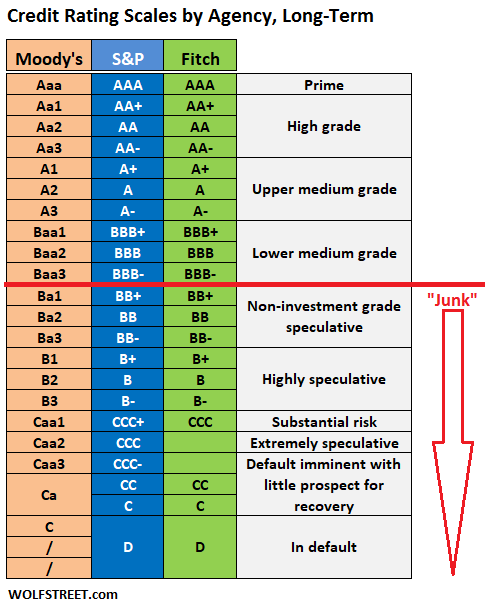

4. Data Acquisition

4.1 Importar Librerías

In [183]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn as sk
import bokeh as bk
import plotly as ply
import scipy as sci
import scipy.stats as stats
import statsmodels.api as sm
import ptitprince as pt
import sklearn.cluster as skc
import yellowbrick.cluster  as ybc
import plotly.graph_objects as go
import plotly.offline as py
import prince as prc

4.2 Obtención Datos

Datos Proporcionados por el Departamento de Finanzas de la Bolsa de EEUU.
7.805 Registros Organizados y Etiquetados en 25 Columnas.
Periodo 2010 - 2016
Descripción Detallada de Variables en el Punto 4.3.

In [2]:
# Fuente: https://www.kaggle.com/datasets/kirtandelwadia/corporate-credit-rating-with-financial-ratios/data
url = 'https://raw.githubusercontent.com/jfdonosom/Data_Bases/main/Corporate_Credit_Rating_With_Financial_Ratios.csv'
df = pd.read_csv(url)
df.head(5)

Rating Agency                     Corporation Rating  \
0  Standard & Poor's Ratings Services       American States Water Co.     A-   
1  Standard & Poor's Ratings Services  Automatic Data Processing Inc.    AAA   
2  Standard & Poor's Ratings Services                      Avnet Inc.   BBB-   
3  Standard & Poor's Ratings Services    California Water Service Co.    AA-   
4  Standard & Poor's Ratings Services            Cardinal Health Inc.      A   

  Rating Date      CIK  Binary Rating  SIC Code Sector Ticker  Current Ratio  \
0  2010-07-30  1056903              1    4941.0  Utils    AWR         1.1507   
1  2010-09-16     8670              1    7374.0  BusEq    ADP         1.1129   
2  2010-11-23     8858              1    5065.0  Shops    AVT         1.9276   
3  2010-06-29  1035201              1    4941.0  Utils    CWT         0.8358   
4  2010-07-14   721371              1    5122.0  Shops    CAH         1.2931   

   ...  EBITDA Margin  Pre-Tax Profit Margin  Net Profit Margin  \
0  ...        28.9834                13.6093             8.3224   
1  ...        23.9379                20.8699            13.5690   
2  ...         3.6338                 3.0536             2.1418   
3  ...        27.9377                15.1135             9.0246   
4  ...         1.5847                 1.2304             0.6518   

   Asset Turnover  ROE - Return On Equity  Return On Tangible Equity  \
0          0.3173                  8.1724                     8.1978   
1          0.3324                 22.0354                    47.2858   
2          2.4620                 13.6376                    16.7991   
3          0.2946                  9.6412                     9.7015   
4          4.9276                 11.1256                    19.4184   

   ROA - Return On Assets  ROI - Return On Investment  \
0                  2.6385                      4.4530   
1                  4.4944                     21.8765   
2                  5.2731                      9.6494   
3                  2.6583                      5.1018   
4                  2.9364                      8.1844   

   Operating Cash Flow Per Share  Free Cash Flow Per Share  
0                         1.9957                   -0.1333  
1                         0.2501                    0.3132  
2                        -7.6079                   -7.3231  
3                         1.7438                   -0.8999  
4                         1.9725                    2.4174  

[5 rows x 25 columns]

In [3]:
df.tail(5)

Rating Agency                Corporation Rating  \
7800           Moody's Investors Service                 eBay, Inc.   BBB+   
7801           Moody's Investors Service                 eBay, Inc.   BBB+   
7802  Standard & Poor's Ratings Services  iHeartCommunications Inc.     CC   
7803  Standard & Poor's Ratings Services  iHeartCommunications Inc.    CCC   
7804  Standard & Poor's Ratings Services  iHeartCommunications Inc.     CC   

     Rating Date      CIK  Binary Rating  SIC Code Sector Ticker  \
7800  2016-02-22  1065088              1    7370.0  BusEq   EBAY   
7801  2016-03-02  1065088              1    7370.0  BusEq   EBAY   
7802  2016-03-08   739708              0    4832.0  Telcm    CCU   
7803  2016-03-24   739708              0    4832.0  Telcm    CCU   
7804  2016-06-14   739708              0    4832.0  Telcm    CCU   

      Current Ratio  ...  EBITDA Margin  Pre-Tax Profit Margin  \
7800         3.4927  ...        33.5661                28.0028   
7801         3.4927  ...        33.5661                28.0028   
7802         1.7606  ...        14.2454                12.7232   
7803         1.7606  ...        14.2454                12.7232   
7804         1.7606  ...        14.2454                12.7232   

      Net Profit Margin  Asset Turnover  ROE - Return On Equity  \
7800            20.0768          0.4839                 29.6077   
7801            20.0768          0.4839                 29.6077   
7802             8.0626          0.8218                 11.8335   
7803             8.0626          0.8218                 11.8335   
7804             8.0626          0.8218                 11.8335   

      Return On Tangible Equity  ROA - Return On Assets  \
7800                    95.6757                 10.9659   
7801                    95.6757                 10.9659   
7802                    13.5108                  7.7070   
7803                    13.5108                  7.7070   
7804                    13.5108                  7.7070   

      ROI - Return On Investment  Operating Cash Flow Per Share  \
7800                     14.6116                        -1.2323   
7801                     14.6116                        -1.2323   
7802                     10.6101                         0.0907   
7803                     10.6101                         0.0907   
7804                     10.6101                         0.0907   

      Free Cash Flow Per Share  
7800                   -1.2826  
7801                   -1.2826  
7802                    1.2552  
7803                    1.2552  
7804                    1.2552  

[5 rows x 25 columns]

In [4]:
df.shape

(7805, 25)

In [5]:
df.columns

Index(['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'CIK',
       'Binary Rating', 'SIC Code', 'Sector', 'Ticker', 'Current Ratio',
       'Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin',
       'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share'],
      dtype='object')

4.3 Descripción Variables

In [6]:
# Fuentes: https://finviz.com/help/screener.ashx , https://www.sec.gov/search-filings/standard-industrial-classification-sic-code-list ,  

# Corporation: Nombre de la Empresa.
# Rating: Calificación Otorgada por la Agencia Especialista - Calificación S&P Decreciente {AAA, AA+, AA, AA−, A+, A, A−, BBB+, BBB, BBB−, BB+, BB, BB−, B+, B, B−, CCC+, CCC, CCC−, CC, C, D}
# Rating Date: Fecha de Calificación.
# CIK: Identificador único de la Compañía provisto por el SEC (Security and Exchange Comission).
# Binary Rating: Calificación Binaria (1: Empresas con Grado de Inversión, 0: Empresas Basura) 
# SIC Code: Estándar Industrial de Clasificación (USA) - Indica el tipo de Negocio asociado a la Empresa.
# Sector: Grupos en función de las actividades de la Compañia en las cuales se agrupan diferentes Empresas. Relación Directa con el Código SIC.
# Ticker: Abreviación Empresa para Cotizar en Bolsa (Identificador Único)
# Current Ratio: Radio de Liquidez, que mide la capacidad de una empresa para pagar sus obligaciones en el corto plazo. Ratio Actual = Activos Actuales / Pasivos Actuales.
# Long-term Debt / Capital: Ratio que mide el Apalancamiento Financiero de una Compañía. Indica que proporción de las acciones y deuda la compañía está utilizando para financiar sus activos en el Largo Plazo. (Pasivos LP / Capital Accionistas)
# Debt/Equity Ratio (D/E): Ratio que mide el Apalancamiento Financiero de una Compañía. Indica que proporción de las acciones y deuda la compañía está utilizando para financiar sus activos en el Corto Plazo. (Pasivos Actuales / Capital Accionistas)                                              
# Gross Margin: Porcentaje del total de Ingresos por Ventas que la Compañía retiene después de incurrir en los costos directos de producción de un Bien o Servicio. Margen Bruto = (Ingresos Ventas - Costos Fijos Producción) / Ingresos Ventas 
# Operating Margin: Indica qué proporción de la ganancia de la compañía queda, luego de pagar los costos variables de producción, tales como salarios, insumos, etc. Margen Operacional = Ingresos Operacionales / Ingresos Totales Ventas. 
# EBIT Margin: Earnings Before Interest and Taxes. Ratio que nos indica la rentabilidad de una empresa. Se calcula como las ganancias de esta menos los gatos, exluyendo los impuestos e intereses.
# EBITDA Margin: Earnings Before Interest, Taxes, Depreciation and Amortization. Ratio o medida de rentabilidad, alternativo al Ingreso Neto, el cual busca representar el beneficio en efectivo generado por las operaciones de la compañía.
# Pre-Tax Profit Margin: Mide las ganancias remantentes de la empresa, después de que los gastos operacionales y no operacionales, sin considerar los impuestos, hayan sido descontados. Ganancia Previa a los Impuestos = EBT (Ganancias antes de Impuestos) / Ingresos.
# Net Profit Margin: Ratio de Rentabilidad que mide cuanto de cada Dólar por Ventas, la compañía mantiene como ganancia. Beneficio Neto = Ganancia Neta / Ingresos por Venta.
# Asset Turnover: Mide la eficiencia de los activos de una compañía para generar Ingresos o Ventas. Rotación de Activos = Ingresos por Ventas / Promedio Total de Activos.
# ROE - Return On Equity: Ratio de Rentabilidad que indica cuanta ganancia genera la compañía con el dinero que lo accionistas han invertido en ella. ROE = Ingreso Neto Anual / Capital Accionistas
# Return On Tangible Equity (ROTE): Mide la Eficiencia con la cual una compañía opera y utiliza sus Activos Tangibles para generar Ingresos en el Largo Plazo. ROTE = Ingreso Neto Anual / (Promedio Capital Accionistas - Activos Intangibles)
# ROA - Return On Assets: Indicador que nos da una idea sobre que tan eficiente es la gerencia de una compañía utilizando sus activos para generar ingresos. ROA = ingresos Netos Anuales / Total Activos.
# ROI - Return On Investment: Medida de Desempeño, utilizada para evaluar la eficiencia de una inversión. ROI = (Ingresos de Inversión - Costos de Inversión) / Costos de Inversión
# Operating Cash Flow Per Share: Cantidad de efectivo que genera una empresa a partir de los Ingresos que genera, excluyendo los costos asociados con la Inversión de Capital a Largo Plazo. Medido en lo últimos 12 Meses (TTM)
# Free Cash Flow Per Share: Medida de la Flexibilidad Financiera de una empresa que se determina dividiendo el Flujo de Caja Libre por el número total de Acciones en Circulación. Indicador de los cambios en las ganancias por acción.

In [7]:
# Clasificación de Ratios por Tipo:

# Ratios de Liquidez: Current Ratio.
# Ratios de Rentabilidad: Gross Margin, Operating Margin, EBIT Margin, EBITDA Margin, Pre-Tax Profit Margin, Net Profit Margin, ROE - Return On Equity, Return On Tangible Equity (ROTE), ROA - Return On Assets, ROI - Return On Investment.
# Ratios de Deuda (Pasivos): Long-Term Debt / Capital, Debt/Equity Ratio (D/E).
# Ratios de Desempeño Operacional: Asset Turnover.
# Ratios de Flujo de Caja: Operating Cash Flow Per Share, Free Cash Flow Per Share.

5. Análisis Exploratorio de Datos (EDA) & Data Wrangling

In [8]:
df['Rating Agency'].unique()

array(["Standard & Poor's Ratings Services", 'DBRS',
       "Moody's Investors Service", 'Fitch Ratings',
       'Japan Credit Rating Agency,Ltd.',
       'HR Ratings de Mexico S.A. de C.V.', 'Egan-Jones Ratings Company'],
      dtype=object)

In [9]:
df.duplicated().sum()

0

In [10]:
# Eliminamos Columna Rating Agency (axis=0 filas, axis=1 columnas)
# Asumimos que la Agencia de Clasificación es una entidad Neutral y que no existen juicios subjetivos de la evaluación de una empresa entre una y otra agencia.
df = df.drop('Rating Agency', axis=1)

In [11]:
# Eliminamos las columnas CIK y SIC Code, ya que estas solo son identificadores únicos de la empresa y de la Industria a la cual pertenecen. En términos de comprensión, se hace más fácil trabajar con la Columnas Corportation y Sector, las cuales entregan mucha más información.
df = df.drop(columns=['CIK', 'SIC Code'])
df.head(5)

Corporation Rating Rating Date  Binary Rating Sector  \
0       American States Water Co.     A-  2010-07-30              1  Utils   
1  Automatic Data Processing Inc.    AAA  2010-09-16              1  BusEq   
2                      Avnet Inc.   BBB-  2010-11-23              1  Shops   
3    California Water Service Co.    AA-  2010-06-29              1  Utils   
4            Cardinal Health Inc.      A  2010-07-14              1  Shops   

  Ticker  Current Ratio  Long-term Debt / Capital  Debt/Equity Ratio  \
0    AWR         1.1507                    0.4551             0.8847   
1    ADP         1.1129                    0.0072             0.0073   
2    AVT         1.9276                    0.2924             0.4255   
3    CWT         0.8358                    0.4708             0.9491   
4    CAH         1.2931                    0.2644             0.4036   

   Gross Margin  ...  EBITDA Margin  Pre-Tax Profit Margin  Net Profit Margin  \
0       77.6230  ...        28.9834                13.6093             8.3224   
1       43.6619  ...        23.9379                20.8699            13.5690   
2       11.9008  ...         3.6338                 3.0536             2.1418   
3       64.5096  ...        27.9377                15.1135             9.0246   
4        3.8385  ...         1.5847                 1.2304             0.6518   

   Asset Turnover  ROE - Return On Equity  Return On Tangible Equity  \
0          0.3173                  8.1724                     8.1978   
1          0.3324                 22.0354                    47.2858   
2          2.4620                 13.6376                    16.7991   
3          0.2946                  9.6412                     9.7015   
4          4.9276                 11.1256                    19.4184   

   ROA - Return On Assets  ROI - Return On Investment  \
0                  2.6385                      4.4530   
1                  4.4944                     21.8765   
2                  5.2731                      9.6494   
3                  2.6583                      5.1018   
4                  2.9364                      8.1844   

   Operating Cash Flow Per Share  Free Cash Flow Per Share  
0                         1.9957                   -0.1333  
1                         0.2501                    0.3132  
2                        -7.6079                   -7.3231  
3                         1.7438                   -0.8999  
4                         1.9725                    2.4174  

[5 rows x 22 columns]

In [12]:
df.shape

(7805, 22)

In [13]:
# Verificamos que No exista más de una agencia que califique en una misma fecha con los mismos valores a una misma empresa.
df.duplicated().sum()

0

5.1 Equilibrio de la Muestra

In [14]:
# Equilibrio Muestra 'Binary Rating', Invertir o No Invertir.
((df.value_counts('Binary Rating')/len(df))*100).round(1)

Binary Rating
1    65.3
0    34.7
Name: count, dtype: float64

In [15]:
# Equilibrio Muestra 'Rating', Calificación S&P.
(df.value_counts('Rating')/len(df)*100).round(1).sort_index(ascending=True)

Rating
A       10.7
A+       6.1
A-       9.3
AA       2.4
AA+      0.9
AA-      3.3
AAA      1.2
B        4.0
B+       5.4
B-       3.7
BB       5.8
BB+      7.0
BB-      5.5
BBB     11.7
BBB+    10.8
BBB-     9.0
C        0.1
CC       0.2
CC+      0.0
CCC      0.8
CCC+     1.9
CCC-     0.1
D        0.1
Name: count, dtype: float64

Muestra efectivamente desbalanceada. Debemos crear nuevas agrupaciones para que nuestros datos de entrenamiento sean balanceados y no se produzca Overfitting (Sobreajuste) en el Modelo Predictivo.

In [16]:
((df.groupby(['Binary Rating','Rating']).size())/len(df)*100).round(1)

Binary Rating  Rating
0              B          4.0
               B+         5.4
               B-         3.7
               BB         5.8
               BB+        7.0
               BB-        5.5
               C          0.1
               CC         0.2
               CC+        0.0
               CCC        0.8
               CCC+       1.9
               CCC-       0.1
               D          0.1
1              A         10.7
               A+         6.1
               A-         9.3
               AA         2.4
               AA+        0.9
               AA-        3.3
               AAA        1.2
               BBB       11.7
               BBB+      10.8
               BBB-       9.0
dtype: float64

In [17]:
# De acuerdo a la información otorgada por Wolfstreet.com (https://wolfstreet.com/credit-rating-scales-by-moodys-sp-and-fitch/), generamos nuevas agrupaciones para equilibrar la muestra.

df['Rating'] = df['Rating'].replace({'AAA': 'Alta', 'AA+': 'Alta', 'AA': 'Alta', 'AA-': 'Alta', 
                                     'A+': 'Media Superior', 'A': 'Media Superior', 
                                     'A-': 'Media', 'BBB+': 'Media', 
                                     'BBB': 'Media Inferior', 'BBB-': 'Media Inferior', 
                                     'BB+': 'Especulativa', 'BB': 'Especulativa', 
                                     'BB-': 'Altamente Especulativa', 'B+': 'Altamente Especulativa', 'B': 'Altamente Especulativa', 
                                     'B-': 'Riesgo Sustancial', 'CCC+': 'Riesgo Sustancial', 'CCC': 'Riesgo Sustancial', 'CCC-': 'Riesgo Sustancial', 
                                     'CC+': 'Riesgo Sustancial', 'CC': 'Riesgo Sustancial', 'C': 'Riesgo Sustancial', 'D': 'Riesgo Sustancial'})

In [18]:
# Variables Categóricas Ordinales.
# Ordinal Encoder
# Como el sistema NO necesariamente asocia el orden lógico ordinal de la clasificación, es necesario crear un diccionario y asociarlos uno a uno.
evaluacion = ['Alta', 'Media Superior', 'Media', 'Media Inferior', 'Especulativa', 'Altamente Especulativa', 'Riesgo Sustancial']
codificador = range(7,0,-1)
mapping = {rating: code for rating, code in zip(evaluacion, codificador)}
df['Rating_OE'] = df['Rating'].map(mapping)
#from sklearn.preprocessing import OrdinalEncoder
#ord = OrdinalEncoder()

# Transformar los datos
#df['Rating_OE'] = ord.fit_transform(df[['Rating']]).astype('int64')

In [19]:
df['Rating_OE'] = df['Rating_OE'].astype('int64')

In [20]:
nuevo_rating = df[['Rating','Rating_OE']].sort_values(by='Rating_OE',ascending=False)
nuevo_rating

Rating  Rating_OE
3651               Alta          7
6019               Alta          7
2042               Alta          7
2033               Alta          7
2032               Alta          7
...                 ...        ...
4767  Riesgo Sustancial          1
4813  Riesgo Sustancial          1
4816  Riesgo Sustancial          1
4818  Riesgo Sustancial          1
7804  Riesgo Sustancial          1

[7805 rows x 2 columns]

In [21]:
print((df.groupby(['Binary Rating', 'Rating', 'Rating_OE']).size()/len(df)*100).round(1))

Binary Rating  Rating                  Rating_OE
0              Altamente Especulativa  2            14.8
               Especulativa            3            12.8
               Riesgo Sustancial       1             7.0
1              Alta                    7             7.7
               Media                   5            20.1
               Media Inferior          4            20.7
               Media Superior          6            16.8
dtype: float64


In [22]:
# Pie Chart 1
import plotly.express as px

fig = px.pie(values=df.value_counts(), 
             names=df['Rating'], title='Distribución Clasificación Empresas')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [23]:
# Equilibrio Muestra 'Sector', Industria a la cual pertenece.
(df.value_counts('Sector')/len(df)*100).round(1).sort_values(ascending=False)

Sector
Other    16.0
Manuf    12.6
BusEq    12.3
Utils    10.8
Shops    10.1
Enrgy     8.5
Hlth      8.0
NoDur     7.3
Telcm     4.9
Chems     4.0
Durbl     2.8
Money     2.7
Name: count, dtype: float64

In [24]:
# Reclasificamos los sectores de acuerdo a la nomenclatura vigente de S&P.
# S&P Sectors: https://corporatefinanceinstitute.com/resources/valuation/the-sp-sectors/

#BusEq - Information Technology: The information technology – IT – sector consists of companies that develop or distribute technological items or services, and includes internet companies. Technology products include computers, microprocessors, and operating systems. 
#Chems - Materials: Companies within the materials sector provide the raw materials needed for other sectors to function. This includes the mining companies that provide gold, zinc, and copper, and forestry companies that provide wood.    
#Durbl - Consumer Discretionary: Discretionary consumer products are luxury items or services that are not necessary for survival. The demand for these items depends on economic conditions and the wealth of individuals.
#Enrgy - Energy: The energy sector consists of all companies that play a part in the oil, gas, and consumable fuels business. This includes companies that find, drill, and extract the commodity.
#Hlth -  Health Care: Health care consists of medical supply companies, pharmaceutical companies, and scientific-based operations or services that aim to improve the human body or mind.      
#Manuf - Industrials: ndustrials include a wide range of companies, from airlines and railroad companies to military weapons manufacturers. Two of the largest industries are Aerospace & Defense and Construction & Engineering.      
#Money - Financials: The financial sector includes all companies involved in finance, investing, and the movement or storage of money. It includes banks, credit card issuers, credit unions, insurance companies, and mortgage real estate investment trusts (REITs).     
#NoDur - Consumer Staples: Consumer staples companies provide all the necessities of life. This includes food and beverage companies, household product providers, and personal product providers. Consumer staple companies are well known, since people see their products in stores regularly.   
#Other - Other: Industries that cannot be classified on a single sector.   
#Shops - Consumer Staples: Consumer staples companies provide all the necessities of life. This includes food and beverage companies, household product providers, and personal product providers. Consumer staple companies are well known, since people see their products in stores regularly.
#Telcm - Communication Services: The communication services sector consists of companies that keep people connected. This includes internet providers and phone plan providers. The more exciting part of the sector includes media, entertainment, and interactive media & services companies.    
#Utils - Utilities: Utility companies provide or generate electricity, water, and gas to buildings and households.

In [25]:
df['Sector'] = df['Sector'].replace({'BusEq': 'Information Technology', 'Chems': 'Materials', 'Durbl': 'Consumer Discretionary', 
                                     'Enrgy': 'Energy', 'Hlth': 'Health Care', 'Manuf': 'Industrials', 'Money': 'Financials', 
                                     'NoDur': 'Consumer Staples', 'Shops': 'Consumer Staples', 'Telcm': 'Communication Services', 'Utils': 'Utilities'})

In [26]:
# Equilibrio Muestra 'Sector', Industria a la cual pertenece.
(df.value_counts('Sector')/len(df)*100).round(1).sort_values(ascending=False)

Sector
Consumer Staples          17.3
Other                     16.0
Industrials               12.6
Information Technology    12.3
Utilities                 10.8
Energy                     8.5
Health Care                8.0
Communication Services     4.9
Materials                  4.0
Consumer Discretionary     2.8
Financials                 2.7
Name: count, dtype: float64

In [27]:
# Pie Chart 2
import plotly.express as px

fig = px.pie(values=df.value_counts(), 
             names=df['Sector'], title='Clasificación Empresas por Sector')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [28]:
# Variables Categóricas Nominales (No importa el Orden).
# Label Encoder - Utilizamos One Hot Encoder, ya que las Variables Nominales no poseen un Orden Jerárquico en sus Categorías. 
df.Sector.value_counts()

Sector
Consumer Staples          1353
Other                     1251
Industrials                981
Information Technology     958
Utilities                  843
Energy                     665
Health Care                625
Communication Services     386
Materials                  315
Consumer Discretionary     221
Financials                 207
Name: count, dtype: int64

In [29]:
# Variables Dummies o Binarias
pd.get_dummies(df.Sector).head(5)

Communication Services  Consumer Discretionary  Consumer Staples  Energy  \
0                   False                   False             False   False   
1                   False                   False             False   False   
2                   False                   False              True   False   
3                   False                   False             False   False   
4                   False                   False              True   False   

   Financials  Health Care  Industrials  Information Technology  Materials  \
0       False        False        False                   False      False   
1       False        False        False                    True      False   
2       False        False        False                   False      False   
3       False        False        False                   False      False   
4       False        False        False                   False      False   

   Other  Utilities  
0  False       True  
1  False      False  
2  False      False  
3  False       True  
4  False      False

In [30]:
pd.get_dummies(df.Sector, prefix= 'Sector')

Sector_Communication Services  Sector_Consumer Discretionary  \
0                             False                          False   
1                             False                          False   
2                             False                          False   
3                             False                          False   
4                             False                          False   
...                             ...                            ...   
7800                          False                          False   
7801                          False                          False   
7802                           True                          False   
7803                           True                          False   
7804                           True                          False   

      Sector_Consumer Staples  Sector_Energy  Sector_Financials  \
0                       False          False              False   
1                       False          False              False   
2                        True          False              False   
3                       False          False              False   
4                        True          False              False   
...                       ...            ...                ...   
7800                    False          False              False   
7801                    False          False              False   
7802                    False          False              False   
7803                    False          False              False   
7804                    False          False              False   

      Sector_Health Care  Sector_Industrials  Sector_Information Technology  \
0                  False               False                          False   
1                  False               False                           True   
2                  False               False                          False   
3                  False               False                          False   
4                  False               False                          False   
...                  ...                 ...                            ...   
7800               False               False                           True   
7801               False               False                           True   
7802               False               False                          False   
7803               False               False                          False   
7804               False               False                          False   

      Sector_Materials  Sector_Other  Sector_Utilities  
0                False         False              True  
1                False         False             False  
2                False         False             False  
3                False         False              True  
4                False         False             False  
...                ...           ...               ...  
7800             False         False             False  
7801             False         False             False  
7802             False         False             False  
7803             False         False             False  
7804             False         False             False  

[7805 rows x 11 columns]

In [31]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
# Instanciar el método
LE = LabelEncoder()
# Transformar los datos
df['Sector_LE'] = LE.fit_transform(df['Sector'].astype(str))

In [32]:
df[['Sector', 'Sector_LE']].value_counts().sort_index()

Sector                  Sector_LE
Communication Services  0             386
Consumer Discretionary  1             221
Consumer Staples        2            1353
Energy                  3             665
Financials              4             207
Health Care             5             625
Industrials             6             981
Information Technology  7             958
Materials               8             315
Other                   9            1251
Utilities               10            843
Name: count, dtype: int64

5.2 Valores Nulos

<Axes: >

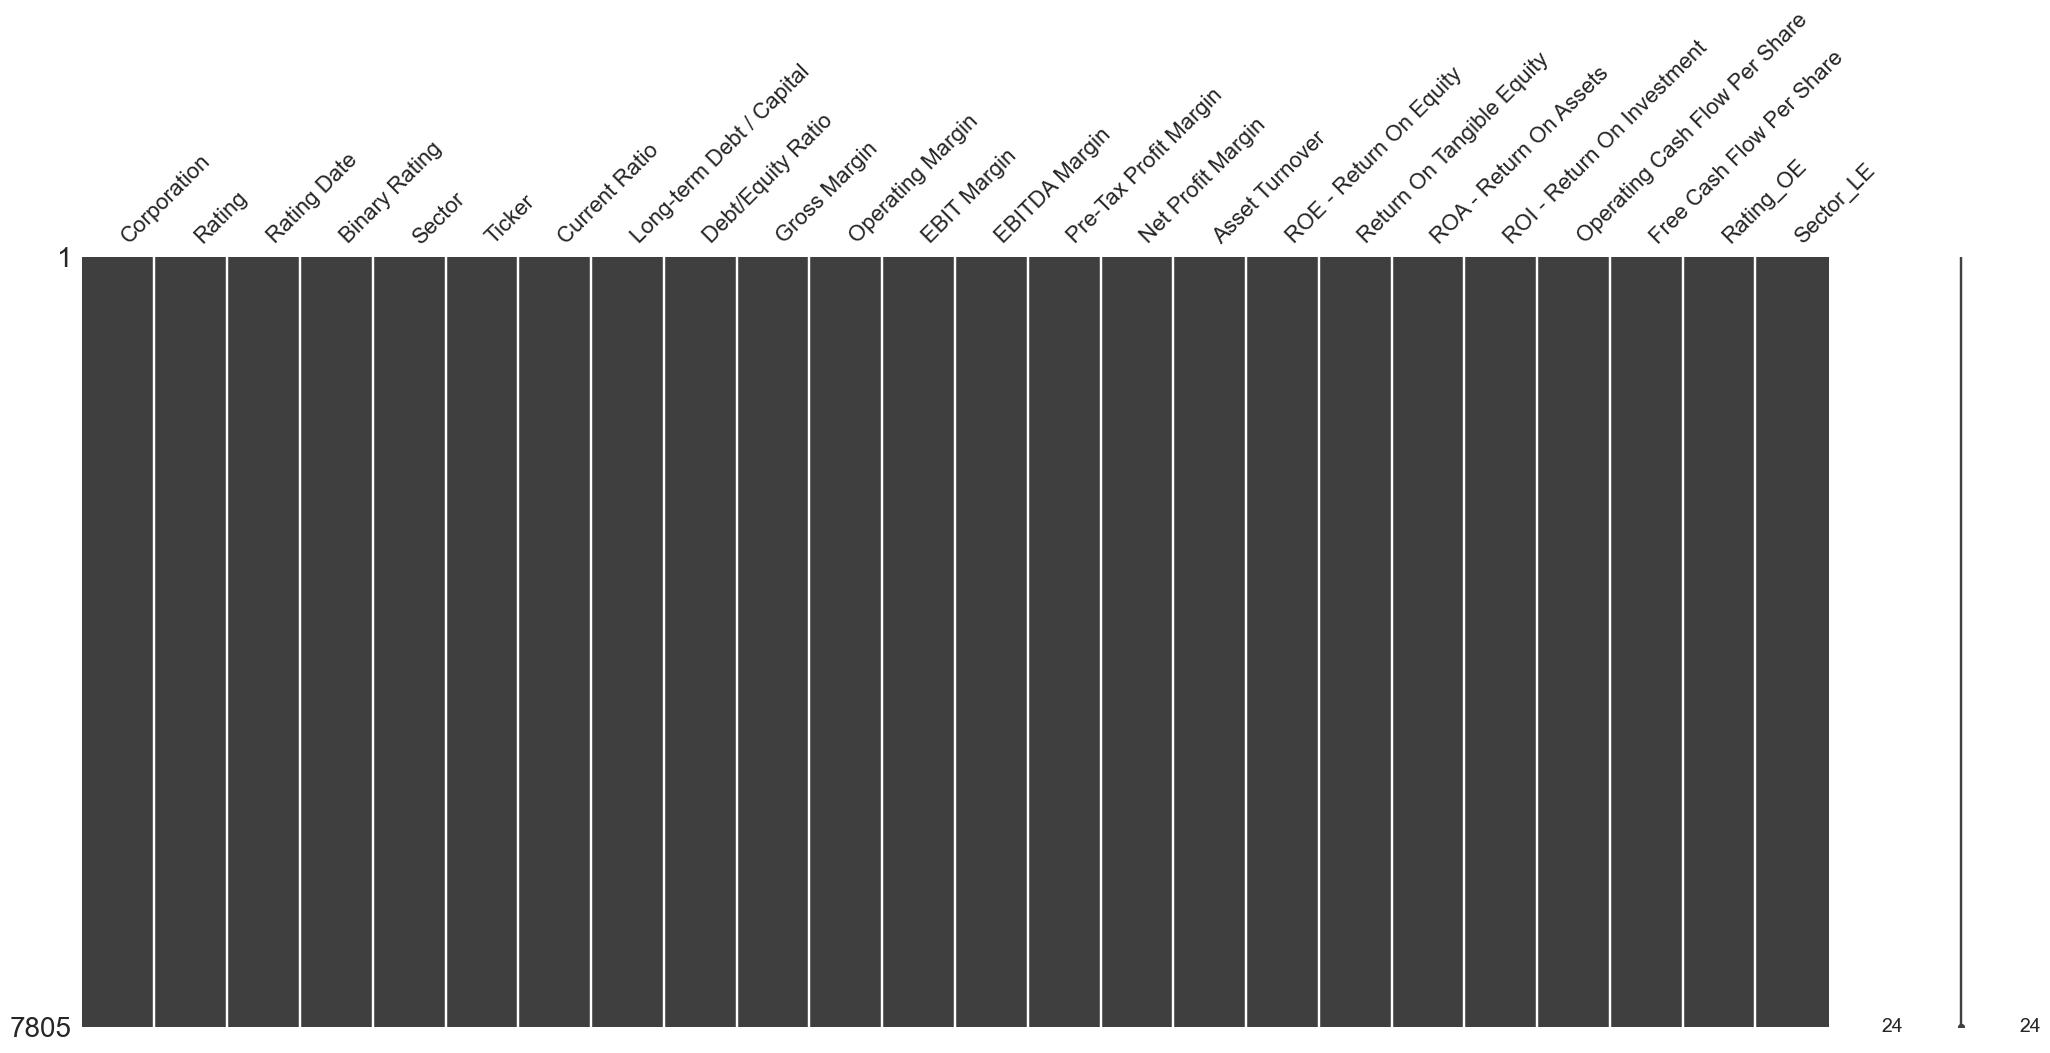

In [33]:
# Valores Faltantes.
msno.matrix(df)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Corporation                    7805 non-null   object 
 1   Rating                         7805 non-null   object 
 2   Rating Date                    7805 non-null   object 
 3   Binary Rating                  7805 non-null   int64  
 4   Sector                         7805 non-null   object 
 5   Ticker                         7805 non-null   object 
 6   Current Ratio                  7805 non-null   float64
 7   Long-term Debt / Capital       7805 non-null   float64
 8   Debt/Equity Ratio              7805 non-null   float64
 9   Gross Margin                   7805 non-null   float64
 10  Operating Margin               7805 non-null   float64
 11  EBIT Margin                    7805 non-null   float64
 12  EBITDA Margin                  7805 non-null   f

5.3 Cambio Tipo Variables

In [35]:
# Si bien las variables 'Binary Rating', 'Rating_OE', 'Sector_LE' son Categorías, en lugar de convertirlas en Variables Categoricas, le cambiaremos 
# El Formato a Números Enteros, para que estas puedan ser reconocidas por los modelos predictivos, ahorrar memoria y tener un procesamiento de datos más eficiente.
Columnas = ['Binary Rating', 'Rating_OE', 'Sector_LE']
def Cambio_Formato(df, Columnas):
    for i in Columnas:
        df[i] = df[i].astype('int64')
    return df

df = Cambio_Formato(df, Columnas)

In [36]:
# Cambiamos Formato Columnas Descriptivas a String.
Columnas = ['Corporation', 'Rating', 'Sector', 'Ticker']
def Cambio_Formato(df, Columnas):
    for i in Columnas:
        df[i] = df[i].astype('string')
    return df

df = Cambio_Formato(df, Columnas)

In [37]:
# Cambiamos el Formato de Fecha y Segmentamos por Intervalos.
# Año, Mes, Semana, Día de la Semana
df['Rating Date'] = pd.to_datetime(df['Rating Date'])
df['Year'] = df['Rating Date'].dt.year.astype('int64')
df['Month'] = df['Rating Date'].dt.month.astype('int64')
df['Week'] = df['Rating Date'].dt.isocalendar().week.astype('int64')
df['Day'] = df['Rating Date'].dt.day_of_week.astype('int64')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Corporation                    7805 non-null   string        
 1   Rating                         7805 non-null   string        
 2   Rating Date                    7805 non-null   datetime64[ns]
 3   Binary Rating                  7805 non-null   int64         
 4   Sector                         7805 non-null   string        
 5   Ticker                         7805 non-null   string        
 6   Current Ratio                  7805 non-null   float64       
 7   Long-term Debt / Capital       7805 non-null   float64       
 8   Debt/Equity Ratio              7805 non-null   float64       
 9   Gross Margin                   7805 non-null   float64       
 10  Operating Margin               7805 non-null   float64       
 11  EBIT Margin      

5.4 Reclasificación Variables

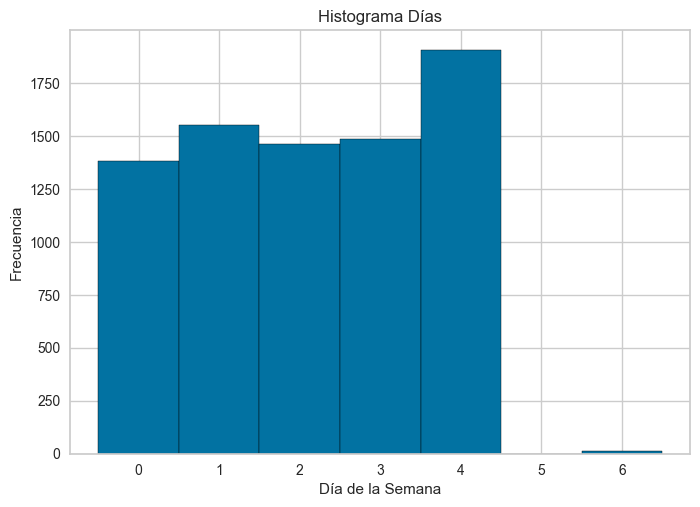

In [39]:
# Histograma Días.
plt.hist(df['Day'], bins=range(0,8), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Días')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [40]:
#Días Lunes
df[df['Day']==0]['Rating Date']

6      2010-12-20
49     2011-10-31
50     2011-07-25
52     2011-10-31
54     2011-09-12
          ...    
7778   2016-01-11
7787   2016-02-01
7790   2016-08-15
7798   2016-09-26
7800   2016-02-22
Name: Rating Date, Length: 1383, dtype: datetime64[ns]

In [41]:
#Días Sábado
df[df['Day']==5]['Rating Date']

5948   2015-09-19
Name: Rating Date, dtype: datetime64[ns]

In [42]:
# Días Domingo
df[df['Day']==6]['Rating Date']

351    2011-11-13
1517   2013-03-17
2811   2013-12-08
2880   2014-07-27
3058   2014-10-05
3333   2014-11-23
4345   2014-12-14
4561   2014-10-26
4649   2014-07-27
5358   2015-01-25
5834   2015-12-20
6432   2015-06-28
6945   2016-03-20
7058   2016-01-31
7687   2016-05-08
Name: Rating Date, dtype: datetime64[ns]

Es poco probable que se haya realizado la calificación de una Agencia un día Domingo, cuando la bolsa de EEUU está cerrada.

In [43]:
# Reemplazamos Sábado por Viernes y Domingo por Lunes.
df['Day'].replace({5: 4, 6: 1}, inplace=True)

C:\Users\220890\AppData\Local\Temp\ipykernel_10772\2811778136.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





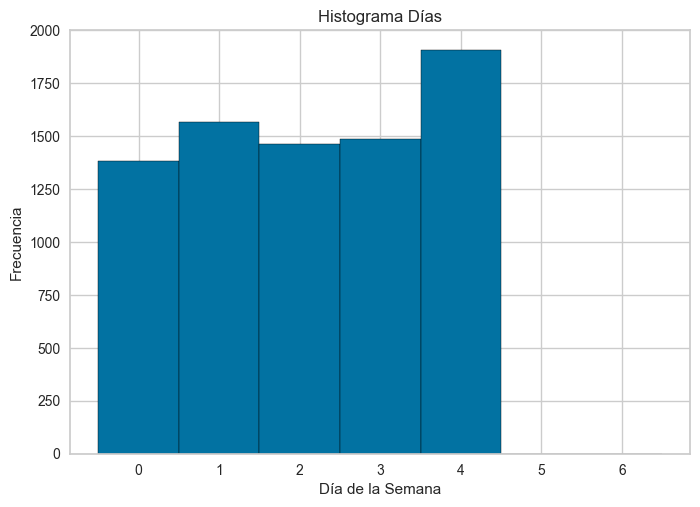

In [44]:
# Histograma Días.
plt.hist(df['Day'], bins=range(0,8), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Días')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

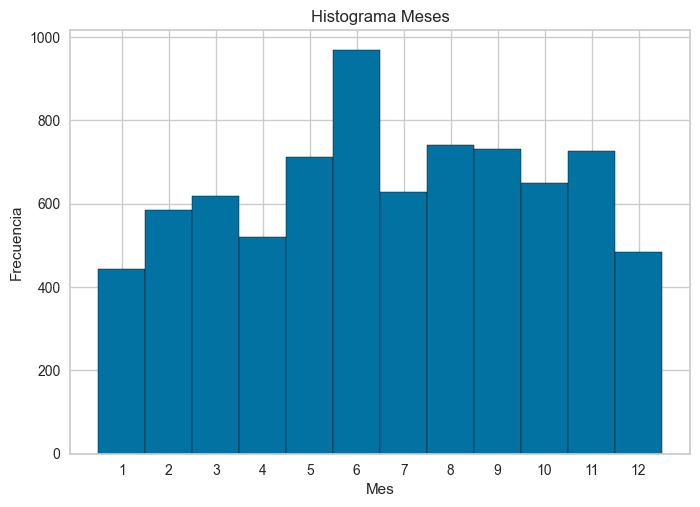

In [45]:
# Histograma Meses.
plt.hist(df['Month'], bins=range(1,14), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Meses')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(range(1, 13))

# Mostrar el gráfico
plt.show()

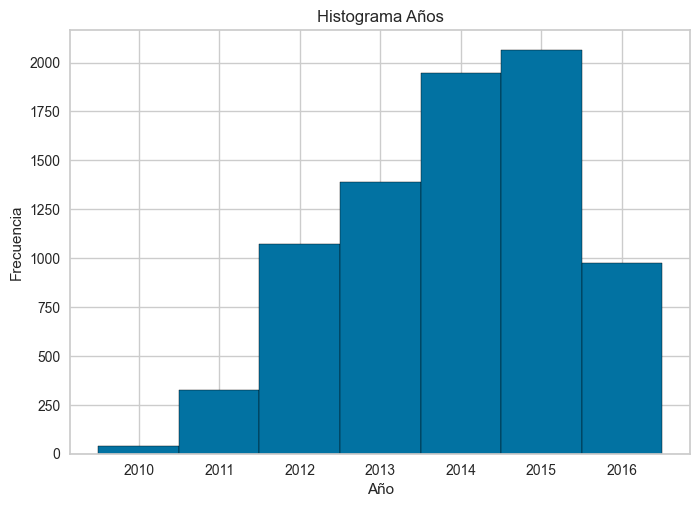

In [46]:
# Histograma Años.
plt.hist(df['Year'], bins=range(2010,2018), edgecolor='black', align='left')

# Etiquetas y título
plt.title('Histograma Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

In [47]:
# Agrupamos la clasificación de una compañía para un mes y año en particular, para identificar si es que existe más de una clasificación en un mismo periodo contable.
df_grouped = df.groupby(['Year', 'Month', 'Corporation'])['Rating'].nunique()

In [48]:
df_grouped.describe().round(2)

count    7285.00
mean        1.02
std         0.13
min         1.00
25%         1.00
50%         1.00
75%         1.00
max         3.00
Name: Rating, dtype: float64

In [49]:
# Existen casos en los cuales tenemos 2 o 3 clasificaciones diferentes de una empresa para un mismo año, mes.
df_grouped.value_counts()

Rating
1    7156
2     127
3       2
Name: count, dtype: int64

In [50]:
# Agrupamos nuevamente, pero ahora considerando la fecha más antigua para un mismo mes y año, intentando tomar la fecha más cercana al fin del periodo contable. 
df = df.loc[df.groupby(['Year','Month','Corporation'])['Rating Date'].idxmax()]

In [51]:
# Se reduce el df de (7805, 28) a (7285, 28)
df.shape

(7285, 28)

In [52]:
# Valores Duplicados.
df.duplicated().sum()

0

In [53]:
# Estadistica Descriptiva Enteros.
int64_columns = df.select_dtypes(include='int64')
int64_columns.describe().round(0)

Binary Rating  Rating_OE  Sector_LE    Year   Month    Week     Day
count         7285.0     7285.0     7285.0  7285.0  7285.0  7285.0  7285.0
mean             1.0        4.0        6.0  2014.0     7.0    28.0     2.0
std              0.0        2.0        3.0     1.0     3.0    14.0     1.0
min              0.0        1.0        0.0  2010.0     1.0     1.0     0.0
25%              0.0        3.0        2.0  2013.0     4.0    17.0     1.0
50%              1.0        4.0        6.0  2014.0     7.0    27.0     2.0
75%              1.0        5.0        9.0  2015.0     9.0    39.0     3.0
max              1.0        7.0       10.0  2016.0    12.0    53.0     4.0

In [54]:
# Estadistica Descriptiva Flotantes.
float64_columns = df.select_dtypes(include='float64')
float64_columns.describe().round(0)

Current Ratio  Long-term Debt / Capital  Debt/Equity Ratio  \
count         7285.0                    7285.0             7285.0   
mean             2.0                       0.0                0.0   
std              2.0                       3.0               34.0   
min              0.0                     -86.0            -1473.0   
25%              1.0                       0.0                0.0   
50%              2.0                       0.0                1.0   
75%              2.0                       1.0                1.0   
max             34.0                     172.0              194.0   

       Gross Margin  Operating Margin  EBIT Margin  EBITDA Margin  \
count        7285.0            7285.0       7285.0         7285.0   
mean           42.0              11.0         12.0           20.0   
std            24.0              25.0         25.0           24.0   
min           -88.0            -462.0       -462.0         -361.0   
25%            23.0               6.0          6.0           11.0   
50%            40.0              12.0         12.0           18.0   
75%            60.0              19.0         19.0           30.0   
max           100.0              94.0         94.0          286.0   

       Pre-Tax Profit Margin  Net Profit Margin  Asset Turnover  \
count                 7285.0             7285.0          7285.0   
mean                     9.0                6.0             1.0   
std                     28.0               24.0             1.0   
min                   -476.0             -415.0             0.0   
25%                      4.0                3.0             0.0   
50%                     10.0                7.0             1.0   
75%                     17.0               12.0             1.0   
max                    221.0              219.0             9.0   

       ROE - Return On Equity  Return On Tangible Equity  \
count                  7285.0                     7285.0   
mean                     15.0                       20.0   
std                     233.0                      455.0   
min                  -11258.0                   -14023.0   
25%                       6.0                      -12.0   
50%                      12.0                       11.0   
75%                      20.0                       27.0   
max                    7038.0                     9883.0   

       ROA - Return On Assets  ROI - Return On Investment  \
count                  7285.0                      7285.0   
mean                      5.0                         7.0   
std                       9.0                        25.0   
min                    -226.0                      -745.0   
25%                       2.0                         4.0   
50%                       5.0                         7.0   
75%                       8.0                        13.0   
max                     115.0                       467.0   

       Operating Cash Flow Per Share  Free Cash Flow Per Share  
count                         7285.0                    7285.0  
mean                             0.0                       0.0  
std                              6.0                       7.0  
min                            -91.0                    -131.0  
25%                             -0.0                      -1.0  
50%                              0.0                       0.0  
75%                              1.0                       1.0  
max                            282.0                     108.0

In [55]:
# Estadistica Descriptiva Cadenas de Texto.
df.describe(include='string')

Corporation          Rating            Sector Ticker
count                  7285            7285              7285   7285
unique                 1377               7                11    678
top     Chevron Corporation  Media Inferior  Consumer Staples    DTE
freq                     20            1495              1268     40

5.5 Selección de Variables

5.5.1 Correlación Entre Variables

https://saber.ucv.ve/bitstream/10872/18490/1/Otros%20Coeficientes%20Correlaci%C3%B3n_FHE_UCV.pdf

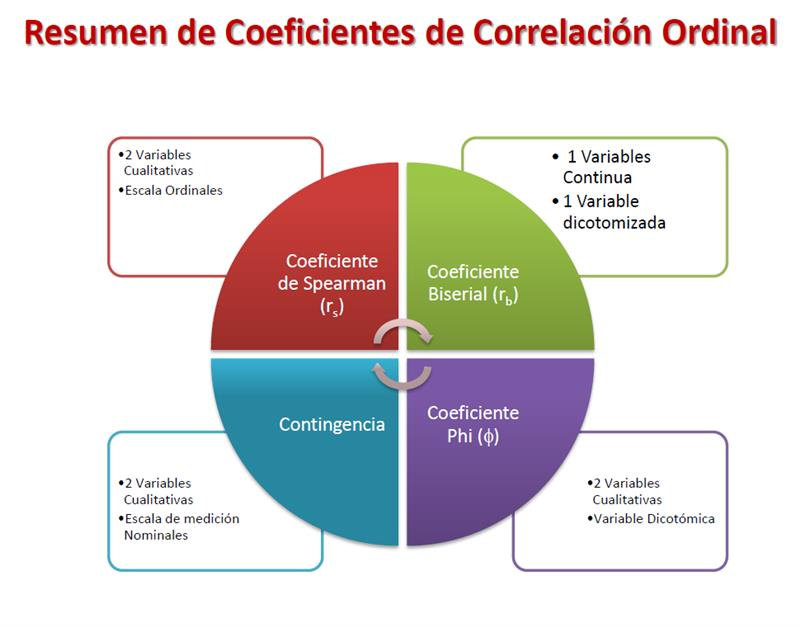

Ho: Hipótesis Nula.
Ha: Hipótesis Alternativa.
0,05: Nivel de Significancia Definido.

P-Value
p < 0,05 significa que la hipótesis nula es falsa
p > 0,05 que la hipótesis nula es verdadera

Un valor p pequeño (generalmente menor que 0.05) indica que la probabilidad de obtener una correlación tan fuerte o más fuerte que la observada bajo la hipótesis nula es baja. Por lo tanto, se considera que hay evidencia suficiente para rechazar la hipótesis nula y concluir que existe una correlación significativa entre las variables.

Por otro lado, un valor p grande (generalmente mayor que 0.05) indica que la probabilidad de obtener una correlación tan fuerte o más fuerte que la observada bajo la hipótesis nula es alta. En este caso, no hay suficiente evidencia para rechazar la hipótesis nula y se concluye que no hay una correlación significativa entre las variables.

Coeficiente Biserial
Ho: No existe correlación entre una variable dicotómica y una variable métrica.
Ha: Existe correlación entre una variable dicotómica y una variable métrica.

Coeficiente de Spearman
Ho: No hay correlación entre las variables
Ha: Si hay correlación entre las variables

Coeficiente de Pearson
Ho: No hay correlación lineal entre las variables
Ha: Si hay correlación lineal entre las variables

In [56]:
# Coeficiente Biserial
# Correlación Clasificación Binaria con Clasificación Ordinal.

variable_dicotomica = df['Binary Rating']
variable_numerica_continua = df['Rating_OE']

# Calcular el coeficiente de correlación de punto biserial
coeficiente, p_value = stats.pointbiserialr(variable_dicotomica, variable_numerica_continua)

print("Coeficiente de correlación de punto biserial:", coeficiente)
print("P-valor:", p_value)

Coeficiente de correlación de punto biserial: 0.8406313971695824
P-valor: 0.0


Conclusión: Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables.

In [57]:
print((df.groupby(['Binary Rating', 'Rating_OE'], observed=True)).size())

Binary Rating  Rating_OE
0              1             494
               2            1095
               3             947
1              4            1495
               5            1450
               6            1236
               7             568
dtype: int64


Esto queda evidenciado al analizar la relación directa entre la clasificación Dicotómica 0: No Inventir con los 3 primeros Valores de la Clasificación Ordinal 1,2,3 ('Especulativa', 'Altamente Especulativa', 'Riesgo Sustancial') y la clasificación Dicotómica 1: Invertir con los Valores más altos de la Clasificaicón Ordinal 4,5,6,7 ('Alta', 'Media Superior', 'Media', 'Media Inferior').

RATIOS DE LIQUIDEZ.

In [58]:
# Coeficiente de Spearman 
# Correlación Ratio de Liquidez con Variable Objetivo.

coeficiente, p_value = stats.spearmanr(df['Current Ratio'], df['Rating_OE'])
print("Coeficiente de Spearman:", coeficiente)
print("P-valor:", p_value)

Coeficiente de Spearman: -0.127931266341371
P-valor: 5.793364343672758e-28


Conclusión: Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Current Ratio' para posteriores Análisis.

RATIOS DE RENTABILIDAD.

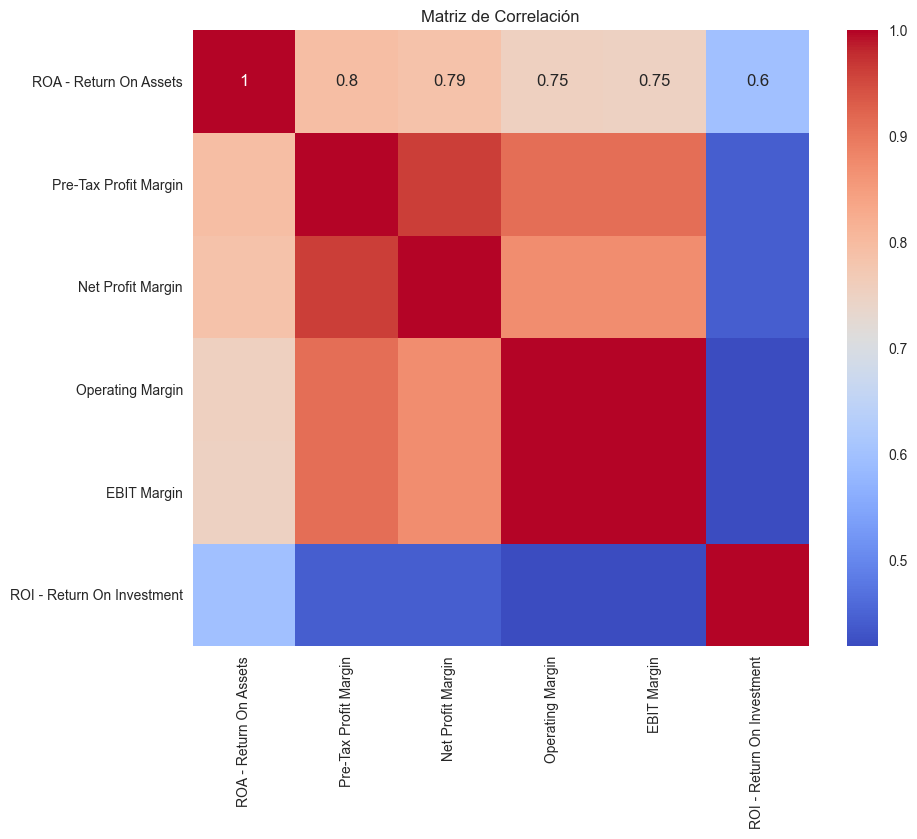

In [59]:
# Coeficiente de Pearson.
# Correlación entre Ratios de Rentabilidad.

df_rentabilidad = df[['ROA - Return On Assets', 'Pre-Tax Profit Margin', 'Net Profit Margin', 'Operating Margin', 'EBIT Margin', 'ROI - Return On Investment']]
matriz_corr = df_rentabilidad.corr()

# Gráfico de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

In [60]:
df_rentabilidad.corr().round(3)

ROA - Return On Assets  Pre-Tax Profit Margin  \
ROA - Return On Assets                       1.000                  0.795   
Pre-Tax Profit Margin                        0.795                  1.000   
Net Profit Margin                            0.785                  0.964   
Operating Margin                             0.753                  0.911   
EBIT Margin                                  0.752                  0.911   
ROI - Return On Investment                   0.598                  0.442   

                            Net Profit Margin  Operating Margin  EBIT Margin  \
ROA - Return On Assets                  0.785             0.753        0.752   
Pre-Tax Profit Margin                   0.964             0.911        0.911   
Net Profit Margin                       1.000             0.873        0.873   
Operating Margin                        0.873             1.000        1.000   
EBIT Margin                             0.873             1.000        1.000   
ROI - Return On Investment              0.442             0.419        0.419   

                            ROI - Return On Investment  
ROA - Return On Assets                           0.598  
Pre-Tax Profit Margin                            0.442  
Net Profit Margin                                0.442  
Operating Margin                                 0.419  
EBIT Margin                                      0.419  
ROI - Return On Investment                       1.000

Conclusión 1: Existe un alto grado de Correlación Lineal entre las variables 'ROA - Return On Assets', 'Pre-Tax Profit Margin', 'Net Profit Margin', 'Operating Margin', 'EBIT Margin', por lo cual se podría discernir de alguna de ellas si es que estas explicasen el mismo fenómeno y si es que tuvieran baja correlación con la Variable Objetivo.

Conclusión 2: La Variable 'ROI - Return On Investment' no posee un grado de correlación alto con ninguna de los otros Ratios de Rentabilidad, por lo cual la información de esta se debe conservar para su posterior análisis, siempre y cuando tenga un grado de correlación alto con la Variable Objetivo. 

In [61]:
# Coeficiente de Spearman 
# Correlación Ratios de Rentabilidad con Variable Objetivo.
for column in df_rentabilidad:
    coeficiente, p_value = stats.spearmanr(df[column], df['Rating_OE'])
    print(f'{column}: Coeficiente de Spearman: {coeficiente}, P-Value: {p_value}')

ROA - Return On Assets: Coeficiente de Spearman: 0.4189843501456261, P-Value: 1.1607220829029526e-307
Pre-Tax Profit Margin: Coeficiente de Spearman: 0.45771717976608445, P-Value: 0.0
Net Profit Margin: Coeficiente de Spearman: 0.43362358122591177, P-Value: 0.0
Operating Margin: Coeficiente de Spearman: 0.3608064979193858, P-Value: 6.963107384684966e-223
EBIT Margin: Coeficiente de Spearman: 0.36232855641360434, P-Value: 6.894919178192096e-225
ROI - Return On Investment: Coeficiente de Spearman: 0.44578334699634364, P-Value: 0.0


Conclusión: 
1. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'ROA - Return On Assets' para posteriores Análisis.
2. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Pre-Tax Profit Margin' para posteriores Análisis.
3. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Net Profit Margin' para posteriores Análisis.
4. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Net Profit Margin' para posteriores Análisis.
5. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Net Profit Margin' para posteriores Análisis.
6. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Net Profit Margin' para posteriores Análisis.

RATIOS DE DEUDA.

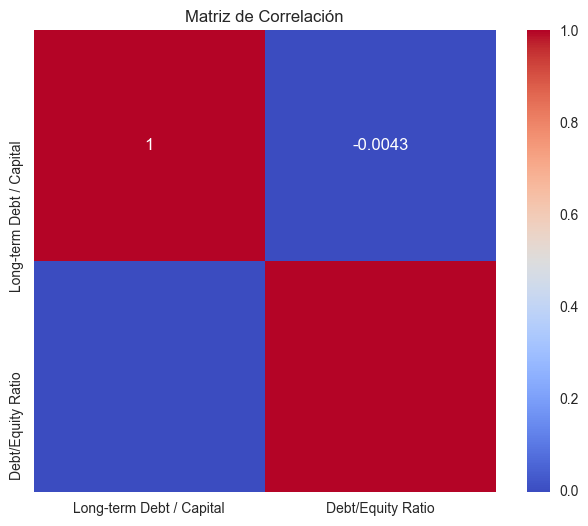

In [62]:
# Coeficiente de Pearson.
# Correlación entre Ratios de Deuda.
df_deuda = df[['Long-term Debt / Capital','Debt/Equity Ratio']]
matriz_corr = df_deuda.corr()

# Gráfico de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

In [63]:
df_deuda.corr().round(3)

Long-term Debt / Capital  Debt/Equity Ratio
Long-term Debt / Capital                     1.000             -0.004
Debt/Equity Ratio                           -0.004              1.000

Conclusión: Los Ratios de Deuda no poseen un grado de Correlación Lineal alto entre ellos, por lo cual la información de estas variables se debe conservar para su posterior análisis, siempre y cuando estas tengan un grado de correlación alto con la Variable Objetivo. 

In [64]:
# Coeficiente de Spearman 
# Correlación Ratios de Deuda con Variable Objetivo.
for column in df_deuda:
    coeficiente, p_value = stats.spearmanr(df[column], df['Rating_OE'])
    print(f'{column}: Coeficiente de Spearman: {coeficiente}, P-Value: {p_value}')

Long-term Debt / Capital: Coeficiente de Spearman: -0.36614004720771703, P-Value: 5.905327671656042e-230
Debt/Equity Ratio: Coeficiente de Spearman: -0.23312338750791736, P-Value: 1.6995451517624205e-90


Conclusión: 
1. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Long-term Debt / Capital' para posteriores Análisis.
2. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Debt/Equity Ratio' para posteriores Análisis.

RATIOS DE DESEMPEÑO OPERACIONAL.

In [65]:
# Coeficiente de Spearman 
# Correlación Ratio de Desempeño Operacional con Variable Objetivo.

coeficiente, p_value = stats.spearmanr(df['Asset Turnover'], df['Rating_OE'])
print("Coeficiente de Spearman:", coeficiente)
print("P-valor:", p_value)

Coeficiente de Spearman: -0.012927456822223406
P-valor: 0.26992131196425595


RATIOS DE FLUJO DE CAJA.

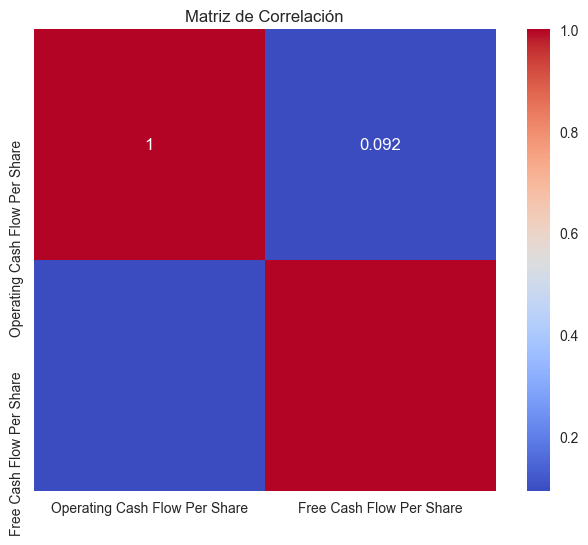

In [66]:
# Coeficiente de Pearson.
# Correlación entre Ratios de Flujo de Caja.
df_flujo_caja = df[['Operating Cash Flow Per Share','Free Cash Flow Per Share']]
matriz_corr = df_flujo_caja.corr()

# Gráfico de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

In [67]:
df_flujo_caja.corr().round(3)

Operating Cash Flow Per Share  \
Operating Cash Flow Per Share                          1.000   
Free Cash Flow Per Share                               0.092   

                               Free Cash Flow Per Share  
Operating Cash Flow Per Share                     0.092  
Free Cash Flow Per Share                          1.000

Conclusión: Los Ratios de Flujo de Caja no poseen un grado de Correlación Lineal alto entre ellos, por lo cual la información de estas variables se debe conservar para su posterior análisis, siempre y cuando estas tengan un grado de correlación alto con la Variable Objetivo. 

In [68]:
# Coeficiente de Spearman 
# Correlación Ratios de Flujo de Caja con Variable Objetivo.
for column in df_flujo_caja:
    coeficiente, p_value = stats.spearmanr(df[column], df['Rating_OE'])
    print(f'{column}: Coeficiente de Spearman: {coeficiente}, P-Value: {p_value}')

Operating Cash Flow Per Share: Coeficiente de Spearman: 0.05648877672960009, P-Value: 1.4037816291405448e-06
Free Cash Flow Per Share: Coeficiente de Spearman: 0.05711473501621771, P-Value: 1.0715910945856728e-06


Conclusión: 
1. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Operating Cash Flow Per Share' para posteriores Análisis.
2. Se Rechaza la Hipótesis Nula -> Existe una Alta Correlación entre las Variables. Se debe conservar la Variable 'Operating Cash Flow Per Share' para posteriores Análisis.

VIF - Factor de Inflación de la Varianza.
https://profesordata.com/2020/08/22/metodos-de-seleccion-de-variables-el-factor-de-inflacion-de-la-varianza/

VIF igual a 1: Un VIF de 1 indica que no hay colinealidad entre la variable predictora y las demás variables. Esto significa que la variable no está correlacionada con ninguna otra variable en el modelo.

VIF entre 1 y 5: Un VIF en este rango generalmente se considera aceptable y sugiere una colinealidad leve o moderada entre la variable predictora y otras variables. No es motivo de preocupación grave, pero se debe tener en cuenta al interpretar los coeficientes de regresión.

VIF mayor a 5: Un VIF mayor a 5 indica una colinealidad sustancial entre la variable predictora y al menos una de las otras variables. Esto puede sugerir que la variable está  muy correlacionada con otras variables y puede dificultar la interpretación de los coeficientes de regresión.

VIF muy alto: En casos donde el VIF es extremadamente alto (por ejemplo, superior a 10 o 20), se considera que la colinealidad es muy fuerte. Esto indica que la variable está altamente correlacionada con otras variables y puede afectar significativamente las estimaciones de los coeficientes de regresión.

In [69]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

df_ratios = df[['Current Ratio', 'ROA - Return On Assets', 'Pre-Tax Profit Margin', 
                'Net Profit Margin', 'Operating Margin', 'EBIT Margin', 'ROI - Return On Investment', 
                'Long-term Debt / Capital','Debt/Equity Ratio', 'Asset Turnover', 'Operating Cash Flow Per Share','Free Cash Flow Per Share']]

def variance_inflation_factors(df_ratios):
    exog_df = add_constant(df_ratios)
    vifs = pd.Series(
        [1 / (1. - OLS(df_ratios[col].values,
                       df_ratios.loc[:, df_ratios.columns != col].values).fit().rsquared)
         for col in df_ratios],
        index=df_ratios.columns,
        name='VIF'
    )
    return vifs

variance_inflation_factors(df_ratios)

Current Ratio                       1.473664
ROA - Return On Assets              5.577553
Pre-Tax Profit Margin              22.198173
Net Profit Margin                  14.994087
Operating Margin                 2274.930939
EBIT Margin                      2273.493894
ROI - Return On Investment          3.413175
Long-term Debt / Capital            2.058374
Debt/Equity Ratio                   1.000484
Asset Turnover                      1.637340
Operating Cash Flow Per Share       1.076627
Free Cash Flow Per Share            1.025059
Name: VIF, dtype: float64

5.5.2 Selección de Variables

SELECCIÓN DE VARIABLES RATIOS DE LIQUIDEZ.
1. Se conserva la variable 'Current Ratio' debido a su alto grado de correlación con la Variable Objetivo y a su bajo grado de Colinealidad entre Variables Predictoras.

SELECIÓN DE VARIABLES RATIOS DE RENTABILIDAD.
1. Se descarta la variable 'ROA - Return On Assets' debido a su menor grado de correlación con la Variable Objetivo y a su alto grado de Colinealidad entre Variables Predictoras.
2. Se descarta la variable 'Pre-Tax Profit Margin' aunque tenga un alto grado de correlación con la Variable Objetivo debido a su alto grado de Colinealidad entre Variables Predictoras.
3. Se descarta la variable 'Net Profit Margin' aunque tenga un alto grado de correlación con la Variable Objetivo debido a su alto grado de Colinealidad entre Variables Predictoras.
4. Se descarta la variable 'Operating Margin' debido a su menor grado de correlación con la Variable Objetivo y a su alto grado de Colinealidad entre Variables Predictoras.
5. Se descarta la variable 'EBIT Margin' debido a su menor grado de correlación con la Variable Objetivo y a su alto grado de Colinealidad entre Variables Predictoras.
6. Se conserva la variable 'ROI - Return On Investment' debido a su alto grado de correlación con la Variable Objetivo y a su nivel medio de Colinealidad entre Variables Predictoras.

SELECCIÓN DE VARIABLES RATIOS DE DEUDA.
1. Se conserva la variable 'Long-term Debt / Capital' debido a su mayor grado de correlación con la Variable Objetivo y a su nivel medio de Colinealidad entre Variables Predictoras.
2. Se descarta la variable 'Debt/Equity Ratio' debido a su menor grado de correlación con la Variable Objetivo aunque posea un bajo grado de Colinealidad entre Variables Predictoras.

SELECCIÓN DE VARIABLES DESEMPEÑO OPERACIONAL.
1. Se descarta la variable 'Asset Turnover' debido a su bajo grado de correlación con la Variable Objetivo aunque posea un bajo grado de Colinealidad entre Variables Predictoras.

SELECCIÓN DE VARIABLES RATIOS DE FLUJO DE CAJA.
1. Se conserva la variable 'Free Cash Flow Per Share' debido a su mayor grado de correlación con la Variable Objetivo y a su bajo grado de Colinealidad entre Variables Predictoras.
2. Se descarta la variable 'Operating Cash Flow Per Share' debido a su menor grado de correlación con la Variable Objetivo aunque posea un bajo grado de Colinealidad entre Variables Predictoras.

In [70]:
df.drop(columns=['ROA - Return On Assets', 'Pre-Tax Profit Margin', 'Net Profit Margin', 'Operating Margin', 
                 'EBIT Margin', 'Debt/Equity Ratio', 'Asset Turnover', 'Operating Cash Flow Per Share', 'Gross Margin',
                 'EBITDA Margin', 'ROE - Return On Equity', 'Return On Tangible Equity', 'Rating Date'], inplace=True)
df.head(5)

Corporation                  Rating  Binary Rating  \
33         Southern Copper Corp.          Media Inferior              1   
8              Compass Group PLC                   Media              1   
3   California Water Service Co.                    Alta              1   
16  Fresh Del Monte Produce Inc.  Altamente Especulativa              0   
29     Northwest Natural Gas Co.                   Media              1   

                    Sector Ticker  Current Ratio  Long-term Debt / Capital  \
33                   Other   SCCO         2.9659                    0.2460   
8   Information Technology   COMP         1.0668                    0.3398   
3                Utilities    CWT         0.8358                    0.4708   
16        Consumer Staples    FDP         2.5430                    0.1589   
29               Utilities    NWN         0.8361                    0.4769   

    ROI - Return On Investment  Free Cash Flow Per Share  Rating_OE  \
33                     18.0982                    0.6584          4   
8                      11.8033                    0.9432          5   
3                       5.1018                   -0.8999          7   
16                      7.1744                    2.9936          2   
29                      5.9535                    3.9589          5   

    Sector_LE  Year  Month  Week  Day  
33          9  2010      4    14    1  
8           7  2010      5    21    4  
3          10  2010      6    26    1  
16          2  2010      6    22    1  
29         10  2010      6    24    2

In [71]:
df.shape

(7285, 15)

5.5.3 Estadística Descriptiva

5.5.3.1. Medidas de Tendencia Central

In [72]:
df_var_selecc= df[['Current Ratio', 'ROI - Return On Investment', 'Long-term Debt / Capital', 'Free Cash Flow Per Share']]

In [73]:
df_var_selecc.describe().round(1)

Current Ratio  ROI - Return On Investment  Long-term Debt / Capital  \
count         7285.0                      7285.0                    7285.0   
mean             1.9                         7.0                       0.5   
std              1.9                        25.0                       2.7   
min              0.2                      -745.5                     -86.4   
25%              1.1                         3.7                       0.3   
50%              1.5                         7.4                       0.4   
75%              2.2                        12.5                       0.5   
max             34.1                       466.7                     171.5   

       Free Cash Flow Per Share  
count                    7285.0  
mean                        0.1  
std                         7.4  
min                      -130.7  
25%                        -0.7  
50%                         0.1  
75%                         1.0  
max                       107.7

5.5.3.2 Medidas de Dispersión

In [74]:
# Varianza
variance = np.var(df_var_selecc)
print(variance)

Current Ratio                   3.607371
ROI - Return On Investment    624.820891
Long-term Debt / Capital        7.395054
Free Cash Flow Per Share       54.440447
dtype: float64


c:\Users\220890\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning:

The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [75]:
# Desviación Estándar
std_dev = np.std(df_var_selecc)
print(std_dev)

Current Ratio                  1.899308
ROI - Return On Investment    24.996418
Long-term Debt / Capital       2.719385
Free Cash Flow Per Share       7.378377
dtype: float64


c:\Users\220890\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning:

The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [76]:
# Coeficiente de Variación
for column in df_var_selecc.columns:
   coef_var = stats.variation(df_var_selecc[column])*100
   print(f'Coeficiente de Variación de {column}: {coef_var}')

Coeficiente de Variación de Current Ratio: 98.87328749424908
Coeficiente de Variación de ROI - Return On Investment: 355.5598062824857
Coeficiente de Variación de Long-term Debt / Capital: 602.8450714969538
Coeficiente de Variación de Free Cash Flow Per Share: 6440.922598150037


In [77]:
# IQR
for column in df_var_selecc.columns:
   IQR = stats.iqr(df_var_selecc[column]) 
   print(f'IQR de {column}: {IQR}')

IQR de Current Ratio: 1.0901000000000003
IQR de ROI - Return On Investment: 8.8587
IQR de Long-term Debt / Capital: 0.25140000000000007
IQR de Free Cash Flow Per Share: 1.7054


In [78]:
# Error Estándar
for column in df_var_selecc.columns:
   SE = stats.sem(df_var_selecc[column])
   print(f'Error Estandar de {column}: {SE}')

Error Estandar de Current Ratio: 0.022254119029723494
Error Estandar de ROI - Return On Investment: 0.292882081512362
Error Estandar de Long-term Debt / Capital: 0.03186292907057499
Error Estandar de Free Cash Flow Per Share: 0.08645216492122465


5.5.3.3 Medidas de Asimetría y Curtosis

In [79]:
# Coeficiente de Asimetía
for column in df_var_selecc.columns:
    SK = stats.skew(df_var_selecc[column])
    print(f'Coef de Asimetría de {column}: {SK}') 

Coef de Asimetría de Current Ratio: 7.301547657476572
Coef de Asimetría de ROI - Return On Investment: -14.703097946605935
Coef de Asimetría de Long-term Debt / Capital: 20.902377386398094
Coef de Asimetría de Free Cash Flow Per Share: -2.856754622967281


In [80]:
# Curtosis
for column in df_var_selecc.columns:
   KUR = stats.kurtosis(df_var_selecc[column])
   print(f'Kurstosis de {column}: {KUR}') 

Kurstosis de Current Ratio: 79.17258729914595
Kurstosis de ROI - Return On Investment: 437.157159592925
Kurstosis de Long-term Debt / Capital: 2574.2678067416673
Kurstosis de Free Cash Flow Per Share: 182.0120231178187


GRAFICOS PARA VISUALIZAR ASIMETRÍA Y CURTOSIS.

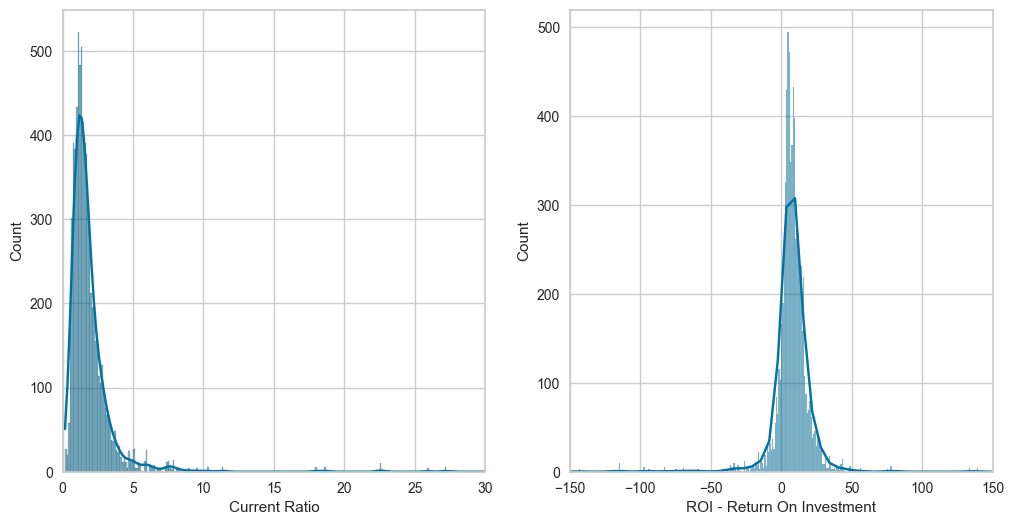

In [81]:
# Gráfico 1 Asimetría y Curtosis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Current Ratio
sns.histplot(df, x='Current Ratio', kde=True, ax=ax1)
ax1.set_xlim([0, 30])

# Gráfico 2: ROI - Return On Investment
sns.histplot(df, x='ROI - Return On Investment', kde=True, ax=ax2)
ax2.set_xlim([-150, 150])

plt.show()

Conclusión 1:
1. Current Ratio: Distribución Simétrica con Custosis Positiva y Asimetría Positiva (Hacia la Derecha).
2. ROI - Return On Investment: Distribución Simétrica con Curtosis Positiva y sin Asimetrías evidentes. 

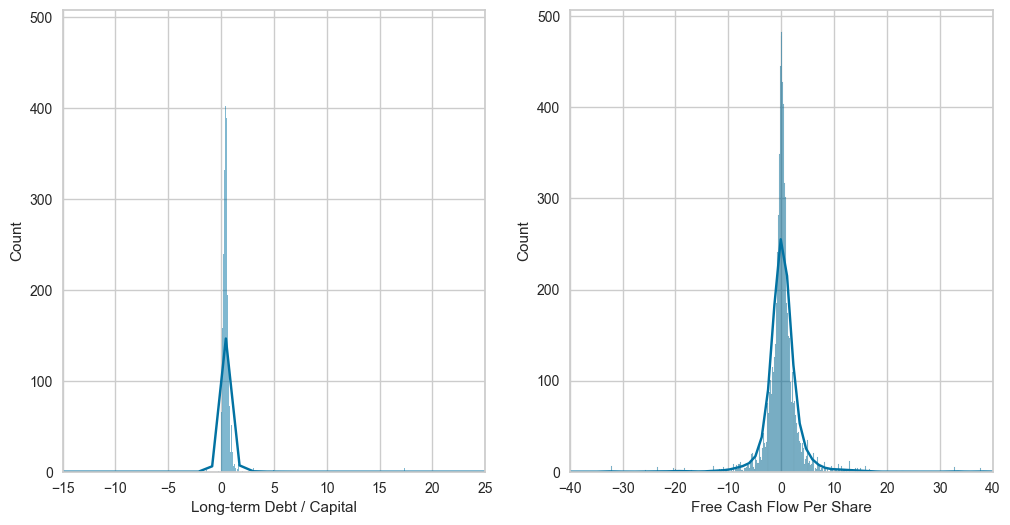

In [82]:
# Gráfico 2 Asimetría y Curtosis
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 3: Long-term Debt / Capital
sns.histplot(df, x='Long-term Debt / Capital', kde=True, ax=ax3)
ax3.set_xlim([-15,25])

# Gráfico 4: Free Cash Flow Per Share
sns.histplot(df, x='Free Cash Flow Per Share', kde=True, ax=ax4)
ax4.set_xlim([-40,40])

plt.show()

Conclusión 2:
1. Long-term Debt / Capital: Distribución Asimétrica con Custosis Positiva muy alta y Asimetría Positiva (Hacia la Derecha).
2. Free Cash Flow Per Share: Distribución Simétrica con Curtosis Positiva y sin Asimetrías evidentes. 

5.5.3.4 Tests de Normalidad.

In [83]:
# Test de Shapiro
nivel_significancia = 0.05

for column in df_var_selecc.columns:
    p_value = stats.shapiro(df_var_selecc[column])[0]  # Obtiene el primer valor de la tupla
    print(f'P Value de {column}:', p_value)
    if p_value < nivel_significancia:
        print(f'Los datos de {column} NO siguen una distribución normal.')
    else:
        print(f'Los datos de {column} siguen una distribución normal.')

P Value de Current Ratio: 0.49128232549654094
Los datos de Current Ratio siguen una distribución normal.
P Value de ROI - Return On Investment: 0.3095762296101294
Los datos de ROI - Return On Investment siguen una distribución normal.
P Value de Long-term Debt / Capital: 0.037198424915057315
Los datos de Long-term Debt / Capital NO siguen una distribución normal.
P Value de Free Cash Flow Per Share: 0.2988703215934564
Los datos de Free Cash Flow Per Share siguen una distribución normal.


c:\Users\220890\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7285.



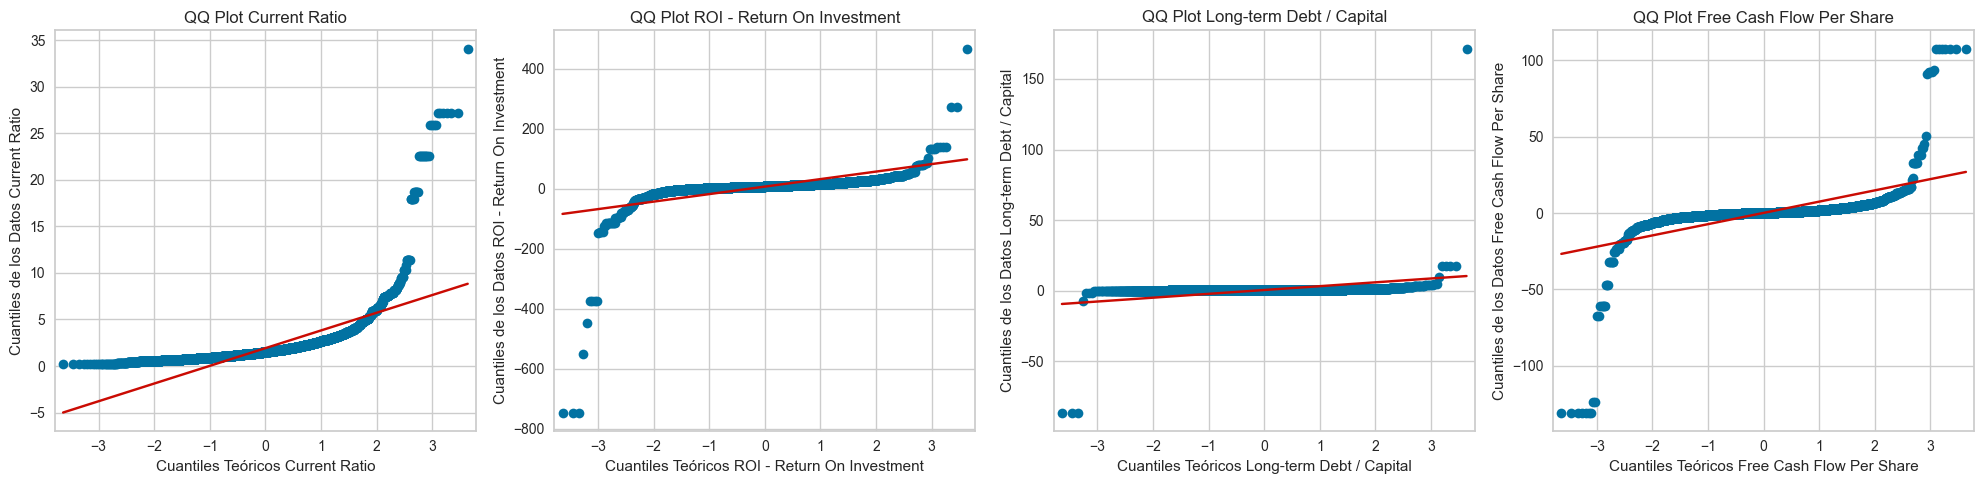

In [84]:
# QQ Plot
num_columns = len(df_var_selecc.columns)
fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 5))

for i, column in enumerate(df_var_selecc.columns):
    sm.qqplot(df_var_selecc[column], line='s', ax=axes[i])
    axes[i].set_xlabel(f'Cuantiles Teóricos {column}')
    axes[i].set_ylabel(f'Cuantiles de los Datos {column}')
    axes[i].set_title(f'QQ Plot {column}')

plt.tight_layout()
plt.show()

Contrastando los Resultados de los Tests y Analizando los Gráficos de Histograma, se concluye lo siguiente:
1. Current Ratio: Los Datos poseen una Distribución Normal.
2. ROI - Return On Investment: Los Datos poseen una Distribución Normal.
3. Long-term Debt / Capital: Los Datos NO poseen una Distribución Normal.
4. Free Cash Flow Per Share: Los Datos poseen una Distribución Normal.

5.5.4 Identificación y Tratamiento de Valores Atípicos (Outliers) - Univariado
https://repository.javeriana.edu.co/bitstream/handle/10554/10347/MorenoCastellanosJuanGabriel2012.pdf

(0.0, 35.0)

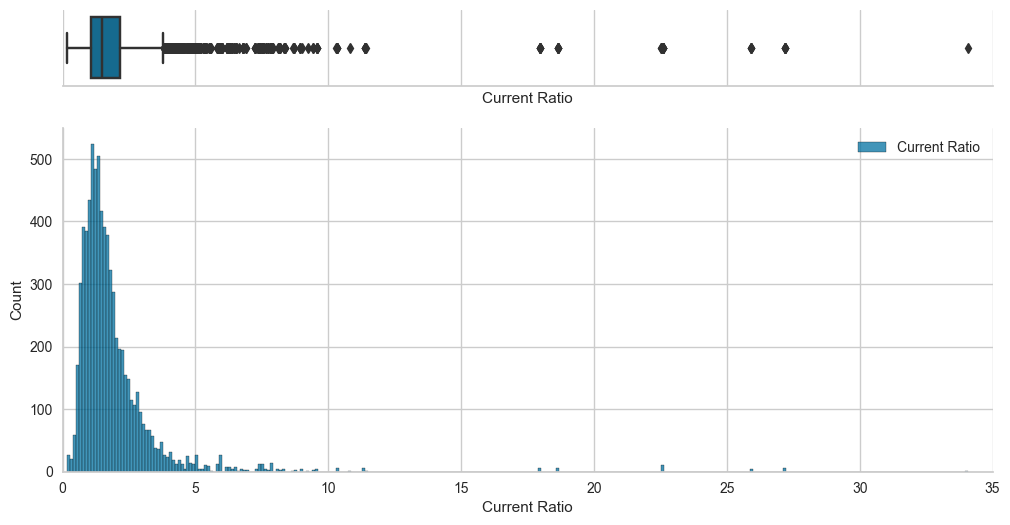

In [85]:
# Box Plot 1: Current Ratio
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Current Ratio'], ax=ax_box, orient="h") 
sns.histplot(df['Current Ratio'], ax=ax_hist, label='Current Ratio')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
ax_hist.set_xlim(0,35)

Se identifican Outliers Leves y Extremos sobre el Tercer Cuartil (Q3).

(-200.0, 200.0)

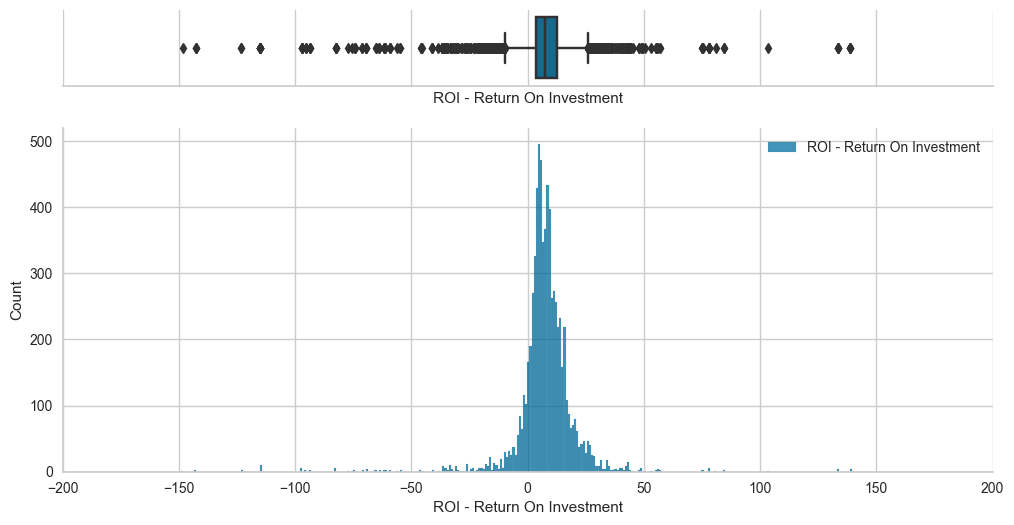

In [86]:
# Box Plot 2: ROI - Return On Investment
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['ROI - Return On Investment'], ax=ax_box, orient="h") 
sns.histplot(df['ROI - Return On Investment'], ax=ax_hist, label='ROI - Return On Investment')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
ax_hist.set_xlim(-200,200)

Se identifican Outliers Leves y Extremos bajo el primer (Q1) y sobre el Tercer Cuartil (Q3).

(-5.0, 5.0)

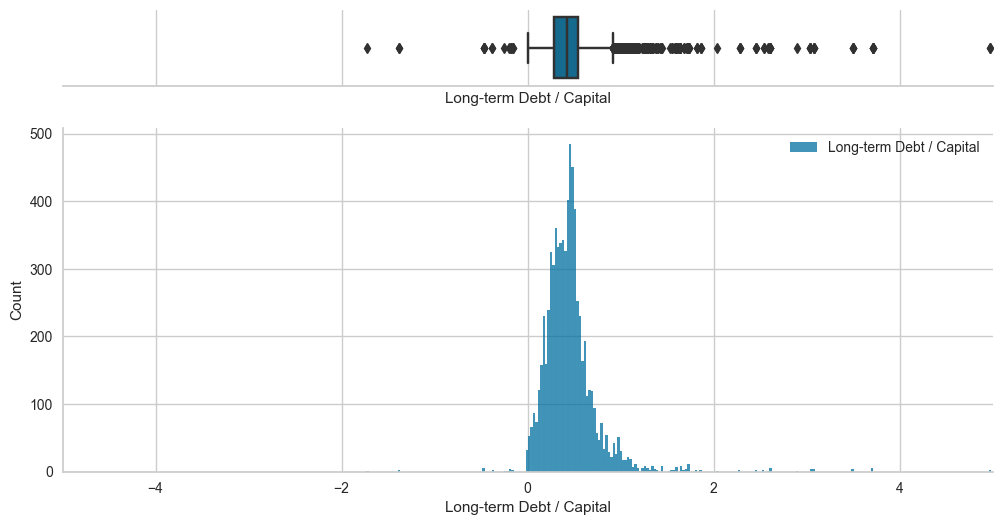

In [87]:
# Box Plot 3: Long-term Debt / Capital
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Long-term Debt / Capital'], ax=ax_box, orient="h") 
sns.histplot(df['Long-term Debt / Capital'], ax=ax_hist, label='Long-term Debt / Capital')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
ax_hist.set_xlim(-5,5)

Se identifican Outliers Leves bajo el Primer Cuartil (Q1) y Outliers Leves y Extremos sobre el Tercer Cuartil (Q3).

(-50.0, 50.0)

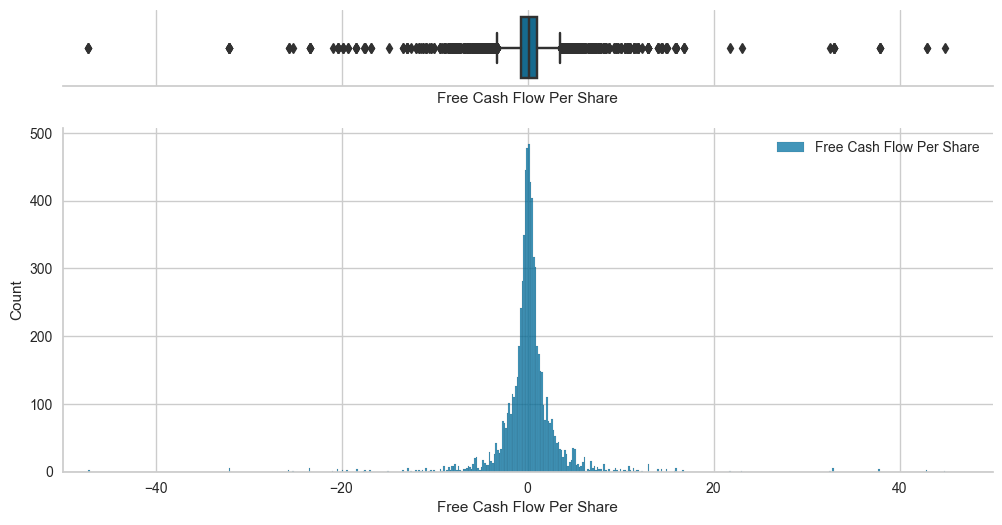

In [88]:
# Box Plot 4: Free Cash Flow Per Share
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Free Cash Flow Per Share'], ax=ax_box, orient="h") 
sns.histplot(df['Free Cash Flow Per Share'], ax=ax_hist, label='Free Cash Flow Per Share')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()
ax_hist.set_xlim(-50,50)

Se identifican Outliers Leves y Extremos bajo el Primer Cuartil (Q1) y Outliers Leves y Extremos sobre el Tercer Cuartil (Q3).

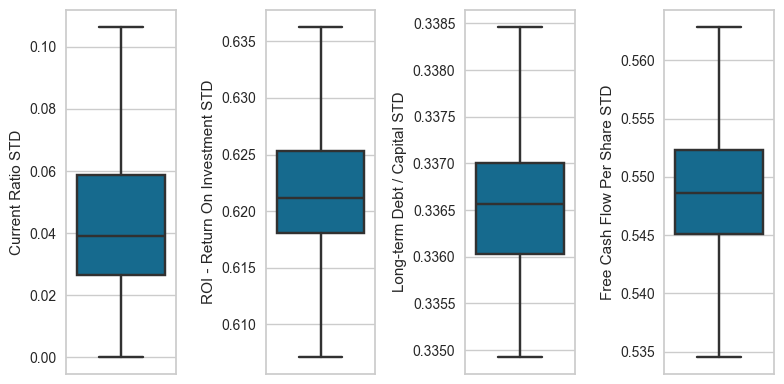

In [89]:
# Box Plot 5
# Estandarizamos las variables para no desvirtuar el gráfico, considerando los diferentes órdenes de magnitud.
# Dejamos los valores atípicos fuera del gráfico para mejorar la visualización.

from sklearn.preprocessing import MinMaxScaler

df['Current Ratio STD'] = df['Current Ratio']
df['ROI - Return On Investment STD'] = df['ROI - Return On Investment']
df['Long-term Debt / Capital STD'] = df['Long-term Debt / Capital']
df['Free Cash Flow Per Share STD'] = df['Free Cash Flow Per Share']

variables = ['Current Ratio STD', 'ROI - Return On Investment STD', 'Long-term Debt / Capital STD', 'Free Cash Flow Per Share STD']

scaler = MinMaxScaler()
df[variables] = scaler.fit_transform(df[variables])

fig, axes = plt.subplots(1, len(variables), figsize=(8,4))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax, showfliers=False)
plt.tight_layout()
plt.show()

Ratios Financieros por Industria https://www.cubesoftware.com/blog/financial-ratios

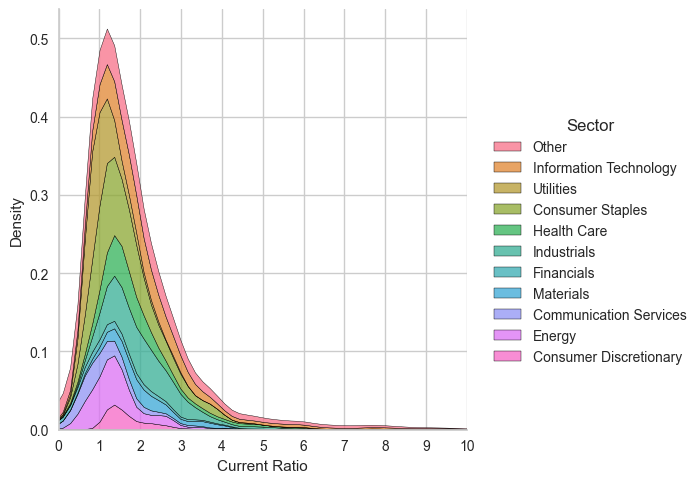

In [90]:
sns.displot(df, x='Current Ratio', hue='Sector', kind="kde", multiple='stack')
plt.xlim(0,10)
plt.xticks(range(0, 11))
plt.show()

Rangos de Current Ratio: Fluctuan entre 0 y 4 generalmente. Valores mayores a 4 podrían ser considerados como valores atípicos, dependiendo de las circunstancias, por lo cual, deben ser evaluados en mayor profundidad.

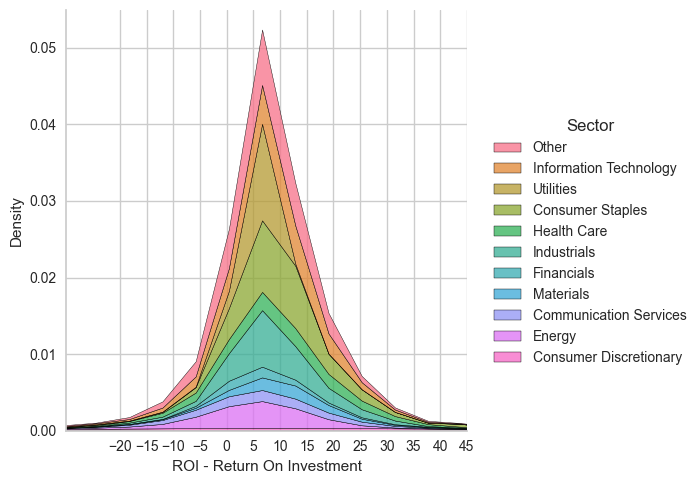

In [91]:
sns.displot(df, x='ROI - Return On Investment', hue='Sector', kind="kde", multiple='stack')
plt.xlim(-30,30)
plt.xticks(range(-20, 50, 5))
plt.show()

Rangos de ROI - Return On Investment: Fluctuan entre -100% y 200% generalmente. Valores mayores a 2 podrían ser considerados como valores atípicos, por lo cual, se debe utilizar como punto de referencia otras empresas de la misma Industria para analizarlos.

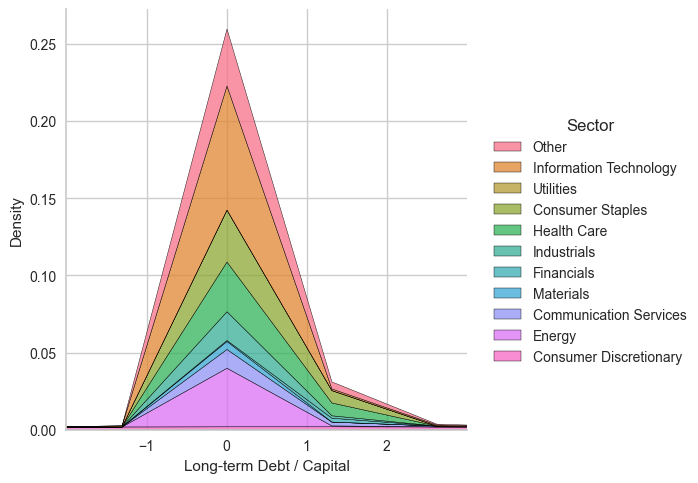

In [92]:
sns.displot(df, x='Long-term Debt / Capital', hue='Sector', kind="kde", multiple='stack')
plt.xlim(-2,3)
plt.xticks(range(-1, 3, 1))
plt.show()

Rangos de Long-Term Debt / Capital: Los Coeficientes de Endeudamiento dependen directamente de la etapa de creciemiento de la empresa y de la Industria a la cual pertenecen. En general, empresas de crecimiento rápido como las startups poseen altos coeficientes de endeudamiento a diferencia de empresas más maduras, por otro lado, se conoce que empresas del mundo financiero y de retail, suelen tener mayores coeficientes de endeudamiento, llegando algunas veces a alcanzar relaciones de endeudamiento sobre capital de 2:1. Finalmente, los ratios de endeudamiento negativos, indican que la empresa no dispone de ningún recurso propio para financiarse.

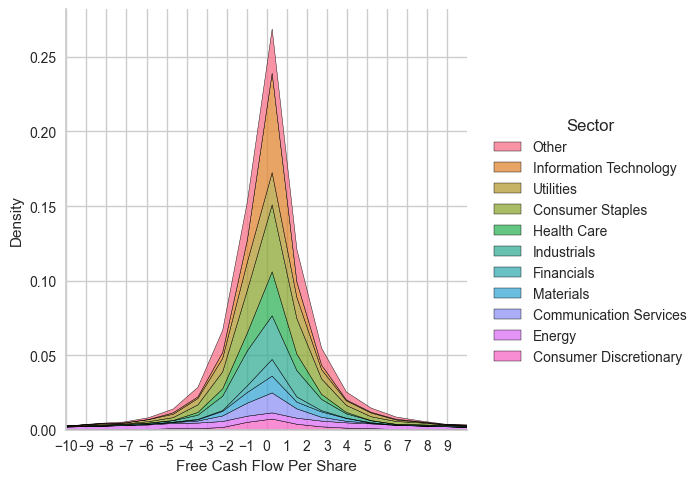

In [93]:
sns.displot(df, x='Free Cash Flow Per Share', hue='Sector', kind="kde", multiple='stack')
plt.xlim(-10,10)
plt.xticks(range(-10, 10, 1))
plt.show()

Rangos de Free Cash Flow Per Share: Es difícil definir un rango de valores aceptables, ya que este valor depende directamente del número de acciones que posee la empresa en circulación, por lo tanto puede variar significativamente entre una empresa y otra con flujos de caja similares.

TRATAMIENTO DE OUTLIERS

Distribuciones NO Normales.
1. Long-term Debt / Capital

In [94]:
# Método de las Desviaciones Absolutas Medianas (MAD)
median = np.median(df['Long-term Debt / Capital'])
mad = np.median(np.abs(df['Long-term Debt / Capital'] - median))

# Definir umbral para los outliers por lo general se usa desde 2,5 hasta 3,5
threshold = 3.5

# Detección de outliers
outliers = df['Long-term Debt / Capital'][np.abs(df['Long-term Debt / Capital'] - median) / mad > threshold]

print("Outliers detectados por el Método de las Desviaciones Absolutas Medianas (MAD):")
print(outliers)

Outliers detectados por el Método de las Desviaciones Absolutas Medianas (MAD):
40        1.0097
101       0.9006
222     171.5000
139       9.9583
308       1.1522
          ...   
7707      1.0701
7353      0.9151
7539      0.9743
7675      0.9361
7746      1.1391
Name: Long-term Debt / Capital, Length: 443, dtype: float64


El método MAD, identifica muchos valores atípicos que NO necesariamente lo son, de acuerdo al conocimiento Financiero de los Ratios.

In [95]:
df['Long-term Debt / Capital'].describe()

count    7285.000000
mean        0.451092
std         2.719571
min       -86.363600
25%         0.286500
50%         0.424900
75%         0.537900
max       171.500000
Name: Long-term Debt / Capital, dtype: float64

Se procede a definir como Outliers, todos aquellos valores de 'Long-term Debt / Capital' > 2 y -1 > 'Long-term Debt / Capital'.

In [96]:
# Detección de Outliers y Valores Imposibles
df['Long-term Debt / Capital Outliers'] = 0
col1 = 'Long-term Debt / Capital'

def filtro_outliers(df, col1):
    Q1 = df[col1].quantile(0.25)
    Q3 = df[col1].quantile(0.75)
    IQR = Q3 - Q1
    df.loc[( (df[col1] > 2) | (df[col1] < -1)), 'Long-term Debt / Capital Outliers'] = 1

filtro_outliers(df,col1)
df[['Long-term Debt / Capital','Long-term Debt / Capital Outliers']][df['Long-term Debt / Capital Outliers'] == 1]

Long-term Debt / Capital  Long-term Debt / Capital Outliers
222                   171.5000                                  1
139                     9.9583                                  1
112                     2.4553                                  1
346                    -7.4430                                  1
114                     2.4553                                  1
235                     4.9714                                  1
115                     2.4553                                  1
236                     4.9714                                  1
712                    -1.3810                                  1
1000                  -86.3636                                  1
397                     2.9006                                  1
713                    -1.3810                                  1
848                     2.2879                                  1
1003                  -86.3636                                  1
846                     2.2879                                  1
849                     2.2879                                  1
1001                  -86.3636                                  1
398                     2.0358                                  1
1002                   17.3667                                  1
1740                   -1.7228                                  1
2226                   17.3667                                  1
2613                    3.5028                                  1
2227                   17.3667                                  1
2614                    3.5028                                  1
2615                    3.5028                                  1
2179                   17.3667                                  1
2616                    3.5028                                  1
2181                    3.7129                                  1
3935                    3.7129                                  1
4001                    3.7129                                  1
4044                    3.0837                                  1
3936                    3.7129                                  1
4002                    3.7129                                  1
4045                    3.0837                                  1
3939                    3.7129                                  1
4046                    3.0837                                  1
4003                    2.6116                                  1
4047                    3.0837                                  1
5939                    2.6116                                  1
5284                    2.5879                                  1
6010                    2.6116                                  1
5940                    2.6116                                  1
6011                    2.6116                                  1
5941                    2.6116                                  1
6870                    2.5387                                  1
7061                    3.0406                                  1
7062                    3.0406                                  1
7063                    3.0406                                  1
6869                    2.5387                                  1
7064                    3.0406                                  1

In [97]:
df['Long-term Debt / Capital Outliers'].value_counts()

Long-term Debt / Capital Outliers
0    7235
1      50
Name: count, dtype: int64

In [98]:
df['Long-term Debt / Capital'][df['Long-term Debt / Capital Outliers'] == 1].describe()

count     50.000000
mean       1.862720
std       32.995248
min      -86.363600
25%        2.455300
50%        3.040600
75%        3.712900
max      171.500000
Name: Long-term Debt / Capital, dtype: float64

In [99]:
# Agrupaciones de Años y Meses son Poco Representativas para el Reemplazo de Outliers, 
df.groupby(['Rating','Sector','Year','Month'])['Long-term Debt / Capital'].describe().round(1)

count  mean  std  min  \
Rating            Sector                 Year Month                          
Alta              Communication Services 2013 9        1.0   0.5  NaN  0.5   
                                         2014 7        1.0   0.1  NaN  0.1   
                                              9        1.0   0.1  NaN  0.1   
                  Consumer Discretionary 2013 11       1.0   0.6  NaN  0.6   
                                         2014 5        1.0   0.6  NaN  0.6   
...                                                    ...   ...  ...  ...   
Riesgo Sustancial Utilities              2015 1        1.0   0.7  NaN  0.7   
                                              3        1.0   0.6  NaN  0.6   
                                              5        1.0   0.7  NaN  0.7   
                                              6        2.0   0.5  0.1  0.5   
                                              9        2.0   0.5  0.1  0.5   

                                                     25%  50%  75%  max  
Rating            Sector                 Year Month                      
Alta              Communication Services 2013 9      0.5  0.5  0.5  0.5  
                                         2014 7      0.1  0.1  0.1  0.1  
                                              9      0.1  0.1  0.1  0.1  
                  Consumer Discretionary 2013 11     0.6  0.6  0.6  0.6  
                                         2014 5      0.6  0.6  0.6  0.6  
...                                                  ...  ...  ...  ...  
Riesgo Sustancial Utilities              2015 1      0.7  0.7  0.7  0.7  
                                              3      0.6  0.6  0.6  0.6  
                                              5      0.7  0.7  0.7  0.7  
                                              6      0.5  0.5  0.6  0.6  
                                              9      0.5  0.5  0.6  0.6  

[3015 rows x 8 columns]

In [100]:
# Considerando ahora solo el Año, es posible realizar reemplazos con promedios de muestras más variadas.
df.groupby(['Rating','Sector','Year'])['Long-term Debt / Capital'].describe().round(1)

count  mean  std  min  25%  \
Rating            Sector                 Year                               
Alta              Communication Services 2013    1.0   0.5  NaN  0.5  0.5   
                                         2014    2.0   0.1  0.0  0.1  0.1   
                  Consumer Discretionary 2013    1.0   0.6  NaN  0.6  0.6   
                                         2014    3.0   0.6  0.0  0.6  0.6   
                                         2015    2.0   0.5  0.0  0.5  0.5   
...                                              ...   ...  ...  ...  ...   
Riesgo Sustancial Other                  2016   22.0   1.0  0.9  0.1  0.4   
                  Utilities              2012    3.0   0.3  0.3  0.1  0.1   
                                         2013    4.0   0.5  0.2  0.1  0.5   
                                         2014    6.0   0.5  0.2  0.2  0.5   
                                         2015    7.0   0.6  0.1  0.5  0.5   

                                               50%  75%  max  
Rating            Sector                 Year                 
Alta              Communication Services 2013  0.5  0.5  0.5  
                                         2014  0.1  0.1  0.1  
                  Consumer Discretionary 2013  0.6  0.6  0.6  
                                         2014  0.6  0.6  0.6  
                                         2015  0.5  0.5  0.5  
...                                            ...  ...  ...  
Riesgo Sustancial Other                  2016  0.7  0.9  3.0  
                  Utilities              2012  0.1  0.3  0.6  
                                         2013  0.6  0.6  0.6  
                                         2014  0.6  0.6  0.6  
                                         2015  0.6  0.6  0.7  

[456 rows x 8 columns]

In [101]:
# Creamos un diccionario con la agrupación de las categorías 'Rating','Sector', 'Year'. 
mapping_dict_1 = df.set_index(['Rating','Sector','Year'])['Long-term Debt / Capital'].to_dict()

In [102]:
# Valores promedio por agrupación:
average_ltd_cap_dict = df.groupby(['Rating','Sector','Year'])['Long-term Debt / Capital'].mean().to_dict()

In [103]:
# Utilizamos una función para reemplazar los valores promedios de las categorías, siempre y cuando el valor sea un Outlier.
def replace_with_average(row, average_ltd_cap_dict):
    if row['Long-term Debt / Capital Outliers'] == 1:
        return average_ltd_cap_dict.get((row['Rating'], row['Sector'], row['Year']), row['Long-term Debt / Capital'])
    return row['Long-term Debt / Capital']

# Reemplazamos el Precio por el Promedio en la misma columna.
df['Long-term Debt / Capital'] = df.apply(replace_with_average, axis=1, args=(average_ltd_cap_dict,))

df_ltd_cap_updated = df[df['Long-term Debt / Capital Outliers'] == 1]

In [104]:
df_ltd_cap_updated.groupby(['Rating','Sector','Year'])['Long-term Debt / Capital'].describe().round(1)

count  mean  std   min  \
Rating                 Sector                 Year                           
Altamente Especulativa Communication Services 2013    2.0   1.1  0.0   1.1   
                       Consumer Discretionary 2013    2.0   3.4  0.0   3.4   
                                              2014    4.0   1.9  0.0   1.9   
                                              2015    5.0   1.4  0.0   1.4   
                       Energy                 2012    2.0   0.9  0.0   0.9   
                       Information Technology 2011    1.0  -1.3  NaN  -1.3   
                       Other                  2016    1.0   0.6  NaN   0.6   
Especulativa           Communication Services 2013    2.0   1.3  0.0   1.3   
                       Information Technology 2012    1.0   0.2  NaN   0.2   
Media                  Other                  2011    2.0   1.4  0.0   1.4   
Media Inferior         Other                  2013    1.0   0.3  NaN   0.3   
Media Superior         Information Technology 2016    2.0   0.6  0.0   0.6   
Riesgo Sustancial      Communication Services 2011    3.0   2.5  0.0   2.5   
                       Consumer Discretionary 2011    1.0  44.1  NaN  44.1   
                                              2012    4.0 -40.0  0.0 -40.0   
                                              2013    2.0   6.3  0.0   6.3   
                                              2014    2.0   2.7  0.0   2.7   
                       Health Care            2014    4.0   1.2  0.0   1.2   
                       Information Technology 2011    1.0   5.4  NaN   5.4   
                                              2012    1.0  -0.4  NaN  -0.4   
                       Other                  2012    3.0   0.9  0.0   0.9   
                                              2015    1.0   0.8  NaN   0.8   
                                              2016    3.0   1.0  0.0   1.0   

                                                     25%   50%   75%   max  
Rating                 Sector                 Year                          
Altamente Especulativa Communication Services 2013   1.1   1.1   1.1   1.1  
                       Consumer Discretionary 2013   3.4   3.4   3.4   3.4  
                                              2014   1.9   1.9   1.9   1.9  
                                              2015   1.4   1.4   1.4   1.4  
                       Energy                 2012   0.9   0.9   0.9   0.9  
                       Information Technology 2011  -1.3  -1.3  -1.3  -1.3  
                       Other                  2016   0.6   0.6   0.6   0.6  
Especulativa           Communication Services 2013   1.3   1.3   1.3   1.3  
                       Information Technology 2012   0.2   0.2   0.2   0.2  
Media                  Other                  2011   1.4   1.4   1.4   1.4  
Media Inferior         Other                  2013   0.3   0.3   0.3   0.3  
Media Superior         Information Technology 2016   0.6   0.6   0.6   0.6  
Riesgo Sustancial      Communication Services 2011   2.5   2.5   2.5   2.5  
                       Consumer Discretionary 2011  44.1  44.1  44.1  44.1  
                                              2012 -40.0 -40.0 -40.0 -40.0  
                                              2013   6.3   6.3   6.3   6.3  
                                              2014   2.7   2.7   2.7   2.7  
                       Health Care            2014   1.2   1.2   1.2   1.2  
                       Information Technology 2011   5.4   5.4   5.4   5.4  
                                              2012  -0.4  -0.4  -0.4  -0.4  
                       Other                  2012   0.9   0.9   0.9   0.9  
                                              2015   0.8   0.8   0.8   0.8  
                                              2016   1.0   1.0   1.0   1.0

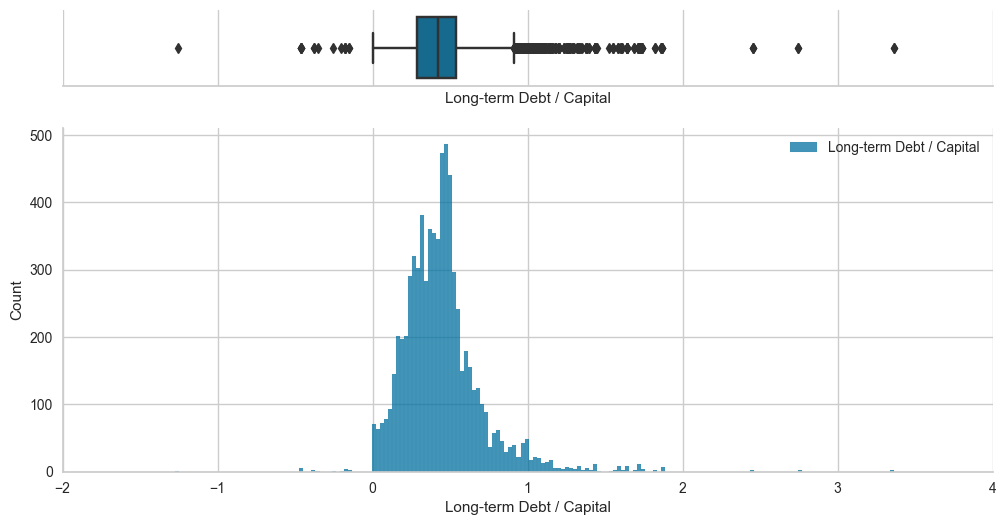

In [105]:
# Box Plot 6: Long-term Debt / Capital - Outliers Tratados.
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Long-term Debt / Capital'], ax=ax_box, orient="h") 
sns.histplot(df['Long-term Debt / Capital'], ax=ax_hist, label='Long-term Debt / Capital')
ax_box.set(yticks=[])
ax_box.set_xlim(-2,4)
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

In [106]:
df.drop(columns='Long-term Debt / Capital Outliers', inplace=True)

Distribuciones Normales.
1. Current Ratio
2. ROI - Return On Investment
3. Free Cash Flow Per Share

In [107]:
# Variable Dependiente: 'Current Ratio'
# Identificamos los valores atípicos de acuerdo al modelo Z-Score (Estandarización). 
# Estandarizamos los valores de la variable, para poder comparar todos los valores bajo una misma regla, haciendo más fácil la identificación de valores atípicos.

df['Current Ratio Z'] = (df['Current Ratio'] - df['Current Ratio'].mean())/df['Current Ratio'].std()
df['Current Ratio Outliers'] = 0
df.loc[(df['Current Ratio Z']>3)|(df['Current Ratio Z']<-3) , 'Current Ratio Outliers'] = 1
df[['Current Ratio', 'Current Ratio Z','Current Ratio Outliers']]

Current Ratio  Current Ratio Z  Current Ratio Outliers
33           2.9659         0.550136                       0
8            1.0668        -0.449686                       0
3            0.8358        -0.571301                       0
16           2.5430         0.327491                       0
29           0.8361        -0.571143                       0
...             ...              ...                     ...
7299         1.9068        -0.007450                       0
7434         2.8042         0.465005                       0
7506         1.4496        -0.248153                       0
7585         2.8601         0.494435                       0
7666         1.5115        -0.215565                       0

[7285 rows x 3 columns]

In [108]:
df['Current Ratio Outliers'].value_counts()

Current Ratio Outliers
0    7188
1      97
Name: count, dtype: int64

In [109]:
print(df.loc[df['Current Ratio Outliers']== 1, 'Current Ratio'])

24       7.9206
73      34.0768
209      8.3246
210      8.3246
60       8.3549
         ...   
6942    17.9751
7364     7.8572
7309     8.1941
7721     8.6590
7310     8.1941
Name: Current Ratio, Length: 97, dtype: float64


In [110]:
print(df.loc[df['Current Ratio Outliers'] == 1, 'Current Ratio'].max())
print(df.loc[df['Current Ratio Outliers'] == 1, 'Current Ratio'].min())

34.0768
7.6585


In [111]:
# Agrupaciones de Clasificación, Sector y Año si son Representativas para el Reemplazo de Outliers.
df.groupby(['Rating','Sector','Year'])[['Current Ratio','ROI - Return On Investment','Free Cash Flow Per Share']].describe().round(1)

Current Ratio                 \
                                                      count mean  std  min   
Rating            Sector                 Year                                
Alta              Communication Services 2013           1.0  1.3  NaN  1.3   
                                         2014           2.0  3.2  0.0  3.2   
                  Consumer Discretionary 2013           1.0  1.7  NaN  1.7   
                                         2014           3.0  2.7  0.0  2.7   
                                         2015           2.0  1.6  0.0  1.6   
...                                                     ...  ...  ...  ...   
Riesgo Sustancial Other                  2016          22.0  5.3  7.1  0.5   
                  Utilities              2012           3.0  1.4  0.1  1.3   
                                         2013           4.0  1.7  0.1  1.6   
                                         2014           6.0  1.7  0.2  1.3   
                                         2015           7.0  1.2  0.5  0.8   

                                                                    \
                                               25%  50%  75%   max   
Rating            Sector                 Year                        
Alta              Communication Services 2013  1.3  1.3  1.3   1.3   
                                         2014  3.2  3.2  3.2   3.2   
                  Consumer Discretionary 2013  1.7  1.7  1.7   1.7   
                                         2014  2.7  2.7  2.7   2.7   
                                         2015  1.6  1.6  1.6   1.6   
...                                            ...  ...  ...   ...   
Riesgo Sustancial Other                  2016  1.3  1.7  2.8  18.0   
                  Utilities              2012  1.4  1.5  1.5   1.5   
                                         2013  1.7  1.7  1.7   1.7   
                                         2014  1.6  1.8  1.8   1.8   
                                         2015  0.8  1.0  1.7   1.7   

                                              ROI - Return On Investment  \
                                                                   count   
Rating            Sector                 Year                              
Alta              Communication Services 2013                        1.0   
                                         2014                        2.0   
                  Consumer Discretionary 2013                        1.0   
                                         2014                        3.0   
                                         2015                        2.0   
...                                                                  ...   
Riesgo Sustancial Other                  2016                       22.0   
                  Utilities              2012                        3.0   
                                         2013                        4.0   
                                         2014                        6.0   
                                         2015                        7.0   

                                                      ...                \
                                                mean  ...    75%    max   
Rating            Sector                 Year         ...                 
Alta              Communication Services 2013 -552.1  ... -552.1 -552.1   
                                         2014 -123.3  ... -123.3 -123.3   
                  Consumer Discretionary 2013    8.7  ...    8.7    8.7   
                                         2014    9.0  ...    9.0    9.0   
                                         2015   11.4  ...   11.4   11.4   
...                                              ...  ...    ...    ...   
Riesgo Sustancial Other                  2016    4.2  ...   16.1   16.2   
                  Utilities              2012    6.3  ...    8.9    8.9   
                                         2013    3.5  ...    3.5   10.4   
       

In [112]:
# Creamos un diccionario con la agrupación de las categorías 'Rating','Sector','Year'.
mapping_dict_2 = df.set_index(['Rating','Sector','Year'])['Current Ratio'].to_dict()

In [113]:
# Valores promedio por agrupación:
average_cr_dict = df.groupby(['Rating','Sector','Year'])['Current Ratio'].mean().to_dict()

In [114]:
# Utilizamos una función para reemplazar los valores promedios de las categorías, siempre y cuando el valor sea un Outlier.
def replace_with_average(row, average_cr_dict):
    if row['Current Ratio Outliers'] == 1:
        return average_cr_dict.get((row['Rating'], row['Sector'], row['Year']), row['Current Ratio'])
    return row['Current Ratio']

# Reemplazamos el Precio por el Promedio en la misma columna.
df['Current Ratio'] = df.apply(replace_with_average, axis=1, args=(average_cr_dict,))

df_cr_updated = df[df['Current Ratio Outliers'] == 1]

In [115]:
df_cr_updated.groupby(['Rating','Sector','Year'])['Current Ratio'].describe().round(1)

count  mean  std  min  \
Rating                 Sector                 Year                          
Altamente Especulativa Communication Services 2014    2.0   2.0  0.0  2.0   
                       Information Technology 2010    1.0   7.9  NaN  7.9   
                                              2012    3.0   2.6  0.0  2.6   
                                              2013    1.0   2.6  NaN  2.6   
                                              2014    1.0   3.3  NaN  3.3   
                                              2015    1.0   2.9  NaN  2.9   
                                              2016    1.0   2.9  NaN  2.9   
                       Other                  2012    1.0   2.7  NaN  2.7   
                                              2014    5.0   4.3  0.0  4.3   
                                              2015    5.0   3.7  0.0  3.7   
                                              2016    3.0   2.3  0.0  2.3   
Especulativa           Financials             2012    1.0   5.6  NaN  5.6   
                       Industrials            2015    5.0   2.6  0.0  2.6   
                       Other                  2013    3.0   3.4  0.0  3.4   
                                              2014    5.0   3.7  0.0  3.7   
                                              2015    7.0   3.3  0.0  3.3   
                                              2016    2.0   2.4  0.0  2.4   
Media                  Financials             2012    1.0   4.4  NaN  4.4   
                       Information Technology 2011    1.0   3.0  NaN  3.0   
                                              2012    3.0   2.8  0.0  2.8   
                                              2013    2.0   2.6  0.0  2.6   
                                              2014    1.0   2.2  NaN  2.2   
                       Other                  2015    7.0   2.4  0.0  2.4   
Media Inferior         Information Technology 2016    1.0   2.2  NaN  2.2   
                       Other                  2012    1.0   2.1  NaN  2.1   
                                              2013    3.0   2.5  0.0  2.5   
                                              2014    1.0   2.5  NaN  2.5   
                                              2015    1.0   2.1  NaN  2.1   
Media Superior         Information Technology 2013    2.0   2.8  0.0  2.8   
                                              2014    3.0   2.6  0.0  2.6   
Riesgo Sustancial      Other                  2011    3.0   8.2  0.0  8.2   
                                              2012    3.0   5.4  0.0  5.4   
                                              2013    6.0   9.6  0.0  9.6   
                                              2014    4.0   4.5  0.0  4.5   
                                              2015    2.0   3.6  0.0  3.6   
                                              2016    5.0   5.3  0.0  5.3   

                                                    25%  50%  75%  max  
Rating                 Sector                 Year                      
Altamente Especulativa Communication Services 2014  2.0  2.0  2.0  2.0  
                       Information Technology 2010  7.9  7.9  7.9  7.9  
                                              2012  2.6  2.6  2.6  2.6  
                                              2013  2.6  2.6  2.6  2.6  
                                              2014  3.3  3.3  3.3  3.3  
                                              2015  2.9  2.9  2.9  2.9  
                                              2016  2.9  2.9  2.9  2.9  
                       Other                  2012  2.7  2.7  2.7  2.7  
                                              2014  4.3  4.3  4.3  4.3  
                                              2015  3.7  3.7  3.7  3.7  
                                              2016  2.3  2.3  2.3  2.3  
Especulativa           Financials             2012  5.6  5.6  5.6  5.6  
                       Industrials            2015  2.6  2.6  2.6  2.6  
                       Other  

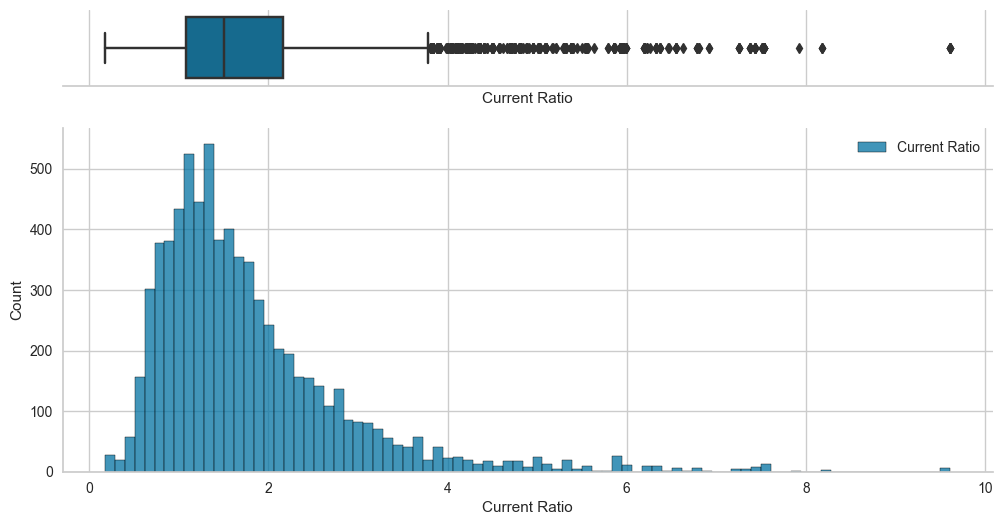

In [116]:
# Box Plot 7: Current Ratio - Outliers Tratados.
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Current Ratio'], ax=ax_box, orient="h") 
sns.histplot(df['Current Ratio'], ax=ax_hist, label='Current Ratio')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

In [117]:
df.drop(columns='Current Ratio Outliers', inplace=True)

In [118]:
# Variable Dependiente: 'ROI - Return On Investment'
# Identificamos los valores atípicos de acuerdo al modelo Z-Score (Estandarización). 
# Estandarizamos los valores de la variable, para poder comparar todos los valores bajo una misma regla, haciendo más fácil la identificación de valores atípicos.

df['ROI - Return On Investment Z'] = (df['ROI - Return On Investment'] - df['ROI - Return On Investment'].mean())/df['ROI - Return On Investment'].std()
df['ROI - Return On Investment Outliers'] = 0
df.loc[(df['ROI - Return On Investment Z']>3)|(df['ROI - Return On Investment Z']<-3) , 'ROI - Return On Investment Outliers'] = 1
df[['ROI - Return On Investment', 'ROI - Return On Investment Z','ROI - Return On Investment Outliers']]

ROI - Return On Investment  ROI - Return On Investment Z  \
33                       18.0982                      0.442755   
8                        11.8033                      0.190940   
3                         5.1018                     -0.077140   
16                        7.1744                      0.005770   
29                        5.9535                     -0.043070   
...                          ...                           ...   
7299                      5.1347                     -0.075824   
7434                     26.3841                      0.774215   
7506                     -0.1661                     -0.287872   
7585                      1.9387                     -0.203674   
7666                      8.9262                      0.075847   

      ROI - Return On Investment Outliers  
33                                      0  
8                                       0  
3                                       0  
16                                      0  
29                                      0  
...                                   ...  
7299                                    0  
7434                                    0  
7506                                    0  
7585                                    0  
7666                                    0  

[7285 rows x 3 columns]

In [119]:
df['ROI - Return On Investment Outliers'].value_counts()

ROI - Return On Investment Outliers
0    7220
1      65
Name: count, dtype: int64

In [120]:
print(df.loc[df['ROI - Return On Investment Outliers']== 1, 'ROI - Return On Investment'])

222     466.6667
139    -445.8333
346    -148.3726
352      84.4000
235     271.2191
          ...   
7089    -97.1279
7090    -97.1279
7091    -97.1279
7353   -142.7909
7566    -71.1889
Name: ROI - Return On Investment, Length: 65, dtype: float64


In [121]:
print(df.loc[df['ROI - Return On Investment Outliers'] == 1, 'ROI - Return On Investment'].max())
print(df.loc[df['ROI - Return On Investment Outliers'] == 1, 'ROI - Return On Investment'].min())

466.6667
-745.4545


In [122]:
# Creamos un diccionario con la agrupación de las categorías 'Rating','Sector','Year'.
mapping_dict_3 = df.set_index(['Rating','Sector','Year'])['ROI - Return On Investment'].to_dict()

In [123]:
# Valores promedio por agrupación:
average_ROI_dict = df.groupby(['Rating','Sector','Year'])['ROI - Return On Investment'].mean().to_dict()

In [124]:
# Utilizamos una función para reemplazar los valores promedios de las categorías, siempre y cuando el valor sea un Outlier.
def replace_with_average(row, average_ROI_dict):
    if row['ROI - Return On Investment Outliers'] == 1:
        return average_cr_dict.get((row['Rating'], row['Sector'], row['Year']), row['ROI - Return On Investment'])
    return row['ROI - Return On Investment']

# Reemplazamos el Precio por el Promedio en la misma columna.
df['ROI - Return On Investment'] = df.apply(replace_with_average, axis=1, args=(average_ROI_dict,))

df_ROI_updated = df[df['ROI - Return On Investment Outliers'] == 1]

In [125]:
df_ROI_updated.groupby(['Rating','Sector','Year'])['ROI - Return On Investment'].describe().round(1)

count  mean  std  min  \
Rating                 Sector                 Year                          
Alta                   Communication Services 2013    1.0   1.3  NaN  1.3   
                                              2014    2.0   3.2  0.0  3.2   
Altamente Especulativa Communication Services 2014    2.0   2.0  0.0  2.0   
                       Consumer Discretionary 2013    1.0   1.4  NaN  1.4   
                       Consumer Staples       2012    1.0   1.8  NaN  1.8   
                       Energy                 2012    1.0   1.7  NaN  1.7   
                                              2016    6.0   1.1  0.0  1.1   
                       Industrials            2012    1.0   2.2  NaN  2.2   
                       Information Technology 2011    1.0   3.1  NaN  3.1   
                       Materials              2013    2.0   2.5  0.0  2.5   
                       Other                  2016    2.0   2.3  0.0  2.3   
Especulativa           Communication Services 2014    2.0   1.4  0.0  1.4   
                       Consumer Staples       2012    1.0   2.0  NaN  2.0   
Media                  Other                  2011    2.0   1.8  0.0  1.8   
Media Inferior         Financials             2011    2.0   0.3  0.0  0.3   
Riesgo Sustancial      Consumer Discretionary 2011    1.0   1.4  NaN  1.4   
                                              2012    4.0   1.4  0.0  1.4   
                                              2013    2.0   2.3  0.0  2.3   
                       Energy                 2016   12.0   1.1  0.0  1.1   
                       Health Care            2013    3.0   2.3  0.0  2.3   
                                              2014    4.0   2.0  0.0  2.0   
                       Information Technology 2011    1.0   2.2  NaN  2.2   
                       Materials              2013    3.0   1.6  0.0  1.6   
                       Other                  2012    3.0   5.4  0.0  5.4   
                                              2015    5.0   3.6  0.0  3.6   

                                                    25%  50%  75%  max  
Rating                 Sector                 Year                      
Alta                   Communication Services 2013  1.3  1.3  1.3  1.3  
                                              2014  3.2  3.2  3.2  3.2  
Altamente Especulativa Communication Services 2014  2.0  2.0  2.0  2.0  
                       Consumer Discretionary 2013  1.4  1.4  1.4  1.4  
                       Consumer Staples       2012  1.8  1.8  1.8  1.8  
                       Energy                 2012  1.7  1.7  1.7  1.7  
                                              2016  1.1  1.1  1.1  1.1  
                       Industrials            2012  2.2  2.2  2.2  2.2  
                       Information Technology 2011  3.1  3.1  3.1  3.1  
                       Materials              2013  2.5  2.5  2.5  2.5  
                       Other                  2016  2.3  2.3  2.3  2.3  
Especulativa           Communication Services 2014  1.4  1.4  1.4  1.4  
                       Consumer Staples       2012  2.0  2.0  2.0  2.0  
Media                  Other                  2011  1.8  1.8  1.8  1.8  
Media Inferior         Financials             2011  0.3  0.3  0.3  0.3  
Riesgo Sustancial      Consumer Discretionary 2011  1.4  1.4  1.4  1.4  
                                              2012  1.4  1.4  1.4  1.4  
                                              2013  2.3  2.3  2.3  2.3  
                       Energy                 2016  1.1  1.1  1.1  1.1  
                       Health Care            2013  2.3  2.3  2.3  2.3  
                                              2014  2.0  2.0  2.0  2.0  
                       Information Technology 2011  2.2  2.2  2.2  2.2  
                       Materials              2013  1.6  1.6  1.6  1.6  
                       Other                  2012  5.4  5.4  5.4  5.4  
                                              2015  3.6  3.6  3.6  3.6

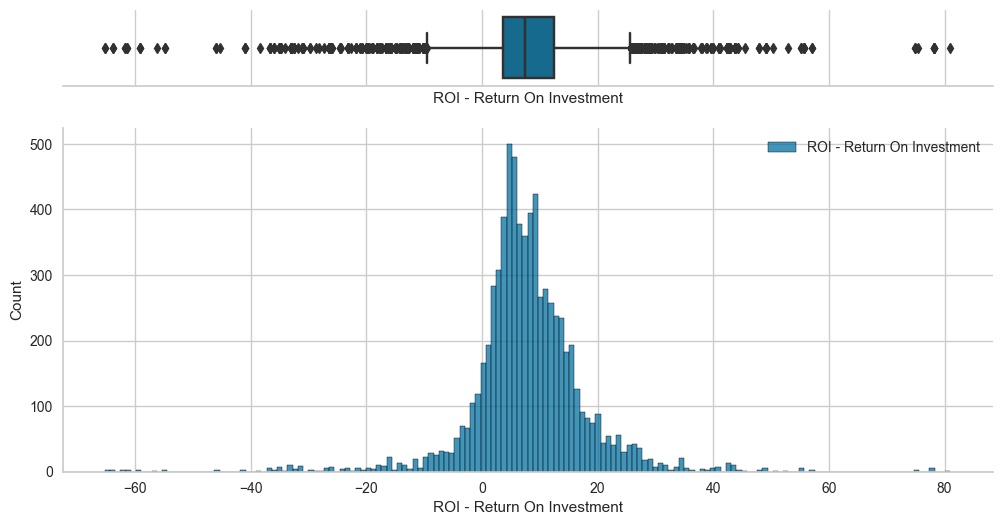

In [126]:
# Box Plot 8: ROI - Return On Investment - Outliers Tratados.
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['ROI - Return On Investment'], ax=ax_box, orient="h") 
sns.histplot(df['ROI - Return On Investment'], ax=ax_hist, label='ROI - Return On Investment')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

In [127]:
df.drop(columns='ROI - Return On Investment Outliers', inplace=True)

In [128]:
# Variable Dependiente: 'Free Cash Flow Per Share'
# Identificamos los valores atípicos de acuerdo al modelo Z-Score (Estandarización). 
# Estandarizamos los valores de la variable, para poder comparar todos los valores bajo una misma regla, haciendo más fácil la identificación de valores atípicos.

df['Free Cash Flow Per Share Z'] = (df['Free Cash Flow Per Share'] - df['Free Cash Flow Per Share'].mean())/df['Free Cash Flow Per Share'].std()
df['Free Cash Flow Per Share Outliers'] = 0
df.loc[(df['Free Cash Flow Per Share Z']>3)|(df['Free Cash Flow Per Share Z']<-3) , 'Free Cash Flow Per Share Outliers'] = 1
df[['Free Cash Flow Per Share', 'Free Cash Flow Per Share Z','Free Cash Flow Per Share Outliers']]

Free Cash Flow Per Share  Free Cash Flow Per Share Z  \
33                      0.6584                    0.073703   
8                       0.9432                    0.112300   
3                      -0.8999                   -0.137481   
16                      2.9936                    0.390174   
29                      3.9589                    0.520993   
...                        ...                         ...   
7299                   -0.6212                   -0.099711   
7434                   -0.8027                   -0.124308   
7506                   14.4425                    1.941750   
7585                    0.4316                    0.042967   
7666                    0.2438                    0.017516   

      Free Cash Flow Per Share Outliers  
33                                    0  
8                                     0  
3                                     0  
16                                    0  
29                                    0  
...                                 ...  
7299                                  0  
7434                                  0  
7506                                  0  
7585                                  0  
7666                                  0  

[7285 rows x 3 columns]

In [129]:
df['Free Cash Flow Per Share Outliers'].value_counts()

Free Cash Flow Per Share Outliers
0    7225
1      60
Name: count, dtype: int64

In [130]:
print(df.loc[df['Free Cash Flow Per Share Outliers']== 1, 'Free Cash Flow Per Share'])

342     -25.6930
242      91.3671
343     -25.6930
288      23.0554
622     -23.3665
623     -23.3665
923     -67.1072
625     -23.3665
626     -23.3665
627     -23.3665
848     -61.0671
924     -67.1072
1048    -60.8999
1212     44.9226
1049    -60.8999
846     -61.0671
849     -61.0671
847      37.8733
1767     42.9103
1768     42.9103
2296   -130.6658
2034     37.8733
2299   -130.6658
2258   -130.6658
2051     37.8733
2297   -130.6658
2300   -130.6658
2035     37.8733
2259   -130.6658
2298   -130.6658
3873     93.6788
4030    107.7377
4092     50.7553
4094    107.7377
4031    107.7377
4096    107.7377
4032    107.7377
4033    107.7377
3711    -32.1013
3712    -32.1013
4095    107.7377
5670    -32.1013
5874   -123.5703
5250    -25.1774
5875   -123.5703
5671    -32.1013
5744     32.4954
6043     32.9236
6112     32.9236
5672    -32.1013
6044     32.9236
5674    -32.1013
6045     32.9236
6113     32.9236
7352     92.6181
7448    -47.2403
7354     92.6181
7446    -47.2403
7447    -47.24

In [131]:
print(df.loc[df['Free Cash Flow Per Share Outliers'] == 1, 'Free Cash Flow Per Share'].max())
print(df.loc[df['Free Cash Flow Per Share Outliers'] == 1, 'Free Cash Flow Per Share'].min())

107.7377
-130.6658


In [132]:
# Creamos un diccionario con la agrupación de las categorías 'Rating','Sector','Year'.
mapping_dict_4 = df.set_index(['Rating','Sector','Year'])['Free Cash Flow Per Share'].to_dict()

In [133]:
# Valores promedio por agrupación:
average_fcf_s_dict = df.groupby(['Rating','Sector','Year'])['Free Cash Flow Per Share'].mean().to_dict()

In [134]:
# Utilizamos una función para reemplazar los valores promedios de las categorías, siempre y cuando el valor sea un Outlier.
def replace_with_average(row, average_fcf_s_dict):
    if row['Free Cash Flow Per Share Outliers'] == 1:
        return average_cr_dict.get((row['Rating'], row['Sector'], row['Year']), row['Free Cash Flow Per Share'])
    return row['Free Cash Flow Per Share']

# Reemplazamos el Precio por el Promedio en la misma columna.
df['Free Cash Flow Per Share'] = df.apply(replace_with_average, axis=1, args=(average_fcf_s_dict,))

df_fcf_s_updated = df[df['Free Cash Flow Per Share Outliers'] == 1]

In [135]:
df_fcf_s_updated.groupby(['Rating','Sector','Year'])['Free Cash Flow Per Share'].describe().round(1)

count  mean  std  min  25%  50%  \
Rating                 Sector           Year                                    
Altamente Especulativa Energy           2012    1.0   1.7  NaN  1.7  1.7  1.7   
                                        2014    1.0   1.5  NaN  1.5  1.5  1.5   
                                        2015    2.0   1.1  0.0  1.1  1.1  1.1   
                                        2016    1.0   1.1  NaN  1.1  1.1  1.1   
                       Other            2015    1.0   3.7  NaN  3.7  3.7  3.7   
Especulativa           Energy           2011    1.0   2.3  NaN  2.3  2.3  2.3   
                                        2015    2.0   1.3  0.0  1.3  1.3  1.3   
                                        2016    1.0   1.5  NaN  1.5  1.5  1.5   
Media                  Energy           2014    1.0   1.1  NaN  1.1  1.1  1.1   
Media Inferior         Energy           2011    1.0   1.3  NaN  1.3  1.3  1.3   
                                        2012    2.0   1.2  0.0  1.2  1.2  1.2   
                                        2013    6.0   1.6  0.0  1.6  1.6  1.6   
                                        2014    6.0   1.8  0.0  1.8  1.8  1.8   
                                        2015    2.0   1.5  0.0  1.5  1.5  1.5   
                                        2016    2.0   1.9  0.0  1.9  1.9  1.9   
                       Other            2011    2.0   1.6  0.0  1.6  1.6  1.6   
                                        2014    1.0   2.5  NaN  2.5  2.5  2.5   
                                        2015    1.0   2.1  NaN  2.1  2.1  2.1   
Media Superior         Energy           2013    1.0   1.4  NaN  1.4  1.4  1.4   
                                        2015    1.0   2.1  NaN  2.1  2.1  2.1   
Riesgo Sustancial      Consumer Staples 2012    1.0   2.0  NaN  2.0  2.0  2.0   
                       Energy           2012    6.0   1.2  0.0  1.2  1.2  1.2   
                                        2013    2.0   1.2  0.0  1.2  1.2  1.2   
                                        2016    2.0   1.1  0.0  1.1  1.1  1.1   
                       Other            2012    4.0   5.4  0.0  5.4  5.4  5.4   
                                        2013    3.0   9.6  0.0  9.6  9.6  9.6   
                                        2014    2.0   4.5  0.0  4.5  4.5  4.5   
                                        2015    4.0   3.6  0.0  3.6  3.6  3.6   

                                              75%  max  
Rating                 Sector           Year            
Altamente Especulativa Energy           2012  1.7  1.7  
                                        2014  1.5  1.5  
                                        2015  1.1  1.1  
                                        2016  1.1  1.1  
                       Other            2015  3.7  3.7  
Especulativa           Energy           2011  2.3  2.3  
                                        2015  1.3  1.3  
                                        2016  1.5  1.5  
Media                  Energy           2014  1.1  1.1  
Media Inferior         Energy           2011  1.3  1.3  
                                        2012  1.2  1.2  
                                        2013  1.6  1.6  
                                        2014  1.8  1.8  
                                        2015  1.5  1.5  
                                        2016  1.9  1.9  
                       Other            2011  1.6  1.6  
                                        2014  2.5  2.5  
                                        2015  2.1  2.1  
Media Superior         Energy           2013  1.4  1.4  
                                        2015  2.1  2.1  
Riesgo Sustancial      Consumer Staples 2012  2.0  2.0  
                       Energy           2012  1.2  1.2  
                                        2013  1.2  1.2  
                                        2016  1.1  1.1  
                       Other            2012  5.4  5.4  
                                        2013  9.6  9.6  
                   

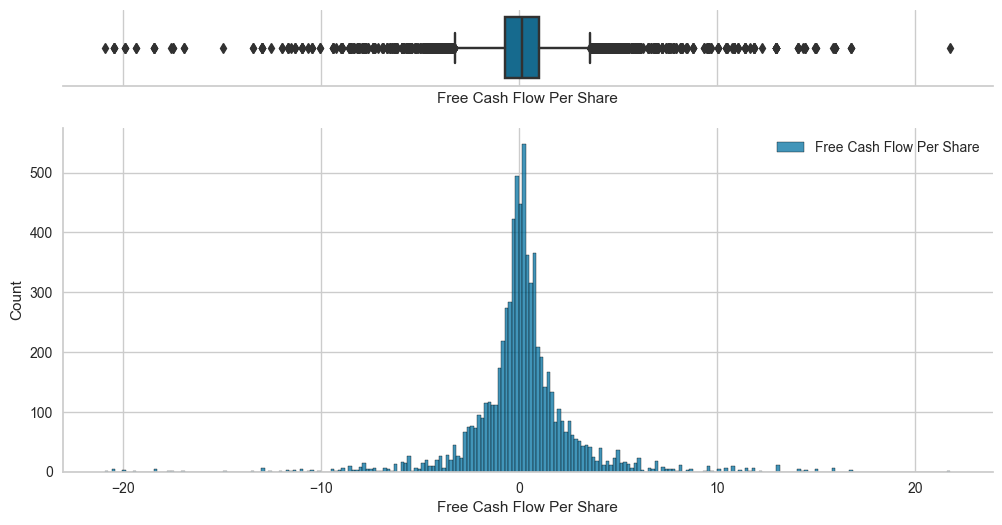

In [136]:
# Box Plot 9: Free Cash Flow Per Share - Outliers Tratados.
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(12,6), gridspec_kw={"height_ratios": (.2, .9)})
sns.boxplot(df['Free Cash Flow Per Share'], ax=ax_box, orient="h") 
sns.histplot(df['Free Cash Flow Per Share'], ax=ax_hist, label='Free Cash Flow Per Share')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

In [137]:
df.drop(columns= ['Free Cash Flow Per Share Outliers', 'Current Ratio STD', 'ROI - Return On Investment STD', 'Long-term Debt / Capital STD', 
                  'Free Cash Flow Per Share STD', 'Current Ratio Z', 'ROI - Return On Investment Z', 'Free Cash Flow Per Share Z'], inplace=True)

5.5.5 Identificación y Tratamiento de Valores Atípicos (Outliers) - Multivariado - Isolation Forest

In [138]:
df_if = df[['Binary Rating','Current Ratio', 'Long-term Debt / Capital',
            'ROI - Return On Investment', 'Free Cash Flow Per Share', 
            'Rating_OE','Sector_LE']]

In [139]:
# Isolation Forest
# Para tratamiento NO Supervisado de Outliers Multivariado, posterior al Manual Univariado.
# Se recomienda un nivel de contaminación de un 10% (proporción esperada de Anomalías).
# 1: Valores Normales, -1: Atípicos.
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=500, contamination=0.10)

isolation_forest.fit(df_if)

predictions = isolation_forest.predict(df_if)

predictions

array([ 1,  1,  1, ..., -1,  1,  1])

In [140]:
df_if['Predicciones'] = predictions
df['Prediciones'] = predictions

In [141]:
df[df['Prediciones']==-1][['Binary Rating', 'Rating_OE', 'Sector_LE',
                           'Current Ratio', 'Long-term Debt / Capital', 
                           'ROI - Return On Investment', 
                           'Free Cash Flow Per Share']]

Binary Rating  Rating_OE  Sector_LE  Current Ratio  \
24                0          2          7       7.920600   
27                1          6         10       0.772200   
101               0          1          7       3.067500   
222               0          1          1       1.238100   
139               0          1          7       1.342600   
...             ...        ...        ...            ...   
7098              0          2          3       0.513500   
7310              0          2          9       2.329813   
7482              1          5          3       1.374200   
7586              0          1          2       3.377500   
7506              1          7          6       1.449600   

      Long-term Debt / Capital  ROI - Return On Investment  \
24                    0.181800                   11.579500   
27                    0.841600                    4.944500   
101                   0.900600                  -20.818600   
222                  44.057075                    1.392875   
139                   5.429450                    2.205050   
...                        ...                         ...   
7098                  0.212500                   23.541200   
7310                  0.298500                    8.778200   
7482                  0.219700                  -26.104800   
7586                  0.607200                   -4.488700   
7506                  0.221800                   -0.166100   

      Free Cash Flow Per Share  
24                      0.5272  
27                      5.0787  
101                    -2.8267  
222                     6.9808  
139                    -0.1768  
...                        ...  
7098                    5.7716  
7310                   14.9246  
7482                   -5.2463  
7586                   -0.5535  
7506                   14.4425  

[729 rows x 7 columns]

Al verificar el Análisis Multivariado de Outliers, nos damos cuenta que muchas clasificaciones Binarias y Ordinales No coinciden con los ratios Financieros estipulados.

In [142]:
df['Binary_Rating_1'] = -1
df['Rating_OE_1'] = -1

#Filtramos el Data Frame por Tipo de Predicción.
df_neg= df[df['Prediciones'] == -1]
df_pos = df[df['Prediciones'] == 1]

# Columnas a Comparar (Comparar el Valor más cercano No Outlier, para reemplazar el Outlier)
columns_to_compare = ['Current Ratio', 'Long-term Debt / Capital', 'ROI - Return On Investment', 'Free Cash Flow Per Share', 'Sector_LE']

# Distancia Euclideana entre los Registros
from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(df_neg[columns_to_compare], df_pos[columns_to_compare])

# Indices Más Cercanos
most_similar_indices = distances.argmin(axis=1)

# Reemplazar los valores de las columnas comparadas en df_neg con los valores correspondientes de df_pos
for i, idx in enumerate(most_similar_indices):
    df_neg.iloc[i, df_neg.columns.get_loc('Current Ratio')] = df_pos.iloc[idx]['Current Ratio']
    df_neg.iloc[i, df_neg.columns.get_loc('Long-term Debt / Capital')] = df_pos.iloc[idx]['Long-term Debt / Capital']
    df_neg.iloc[i, df_neg.columns.get_loc('ROI - Return On Investment')] = df_pos.iloc[idx]['ROI - Return On Investment']
    df_neg.iloc[i, df_neg.columns.get_loc('Free Cash Flow Per Share')] = df_pos.iloc[idx]['Free Cash Flow Per Share']
    df_neg.iloc[i, df_neg.columns.get_loc('Sector_LE')] = df_pos.iloc[idx]['Sector_LE']

# Añadir las columnas 'Binary Rating' y 'Rating_OE' con los valores de 'Current Ratio', 'Long-term Debt / Capital', 'ROI - Return On Investment', 'Free Cash Flow Per Share', 'Sector_LE' más similares.
df.loc[df['Prediciones'] == -1, 'Binary_Rating_1'] = df_pos.iloc[most_similar_indices]['Binary Rating'].values
df.loc[df['Prediciones'] == -1, 'Rating_OE_1'] = df_pos.iloc[most_similar_indices]['Rating_OE'].values

In [143]:
df[df['Prediciones']==-1][['Binary Rating', 'Rating_OE', 
                           'Binary_Rating_1', 'Rating_OE_1', 'Sector_LE',
                           'Current Ratio', 'Long-term Debt / Capital', 
                           'ROI - Return On Investment', 
                           'Free Cash Flow Per Share']]

Binary Rating  Rating_OE  Binary_Rating_1  Rating_OE_1  Sector_LE  \
24                0          2                1            4          7   
27                1          6                1            5         10   
101               0          1                0            2          7   
222               0          1                0            2          1   
139               0          1                0            1          7   
...             ...        ...              ...          ...        ...   
7098              0          2                1            7          3   
7310              0          2                1            5          9   
7482              1          5                1            6          3   
7586              0          1                1            4          2   
7506              1          7                1            5          6   

      Current Ratio  Long-term Debt / Capital  ROI - Return On Investment  \
24         7.920600                  0.181800                   11.579500   
27         0.772200                  0.841600                    4.944500   
101        3.067500                  0.900600                  -20.818600   
222        1.238100                 44.057075                    1.392875   
139        1.342600                  5.429450                    2.205050   
...             ...                       ...                         ...   
7098       0.513500                  0.212500                   23.541200   
7310       2.329813                  0.298500                    8.778200   
7482       1.374200                  0.219700                  -26.104800   
7586       3.377500                  0.607200                   -4.488700   
7506       1.449600                  0.221800                   -0.166100   

      Free Cash Flow Per Share  
24                      0.5272  
27                      5.0787  
101                    -2.8267  
222                     6.9808  
139                    -0.1768  
...                        ...  
7098                    5.7716  
7310                   14.9246  
7482                   -5.2463  
7586                   -0.5535  
7506                   14.4425  

[729 rows x 9 columns]

In [144]:
# Reemplazar los valores de 'Binary Rating' y 'Rating_OE' para Outliers con los valores más cercanos NO Atípcos.
df.loc[df['Prediciones'] == -1, 'Binary Rating'] = df['Binary_Rating_1']
df.loc[df['Prediciones'] == -1, 'Rating_OE'] = df['Rating_OE_1']

In [145]:
df[df['Prediciones']==-1][['Binary Rating', 'Rating_OE', 
                           'Binary_Rating_1', 'Rating_OE_1', 'Sector_LE',
                           'Current Ratio', 'Long-term Debt / Capital', 
                           'ROI - Return On Investment', 
                           'Free Cash Flow Per Share']]

Binary Rating  Rating_OE  Binary_Rating_1  Rating_OE_1  Sector_LE  \
24                1          4                1            4          7   
27                1          5                1            5         10   
101               0          2                0            2          7   
222               0          2                0            2          1   
139               0          1                0            1          7   
...             ...        ...              ...          ...        ...   
7098              1          7                1            7          3   
7310              1          5                1            5          9   
7482              1          6                1            6          3   
7586              1          4                1            4          2   
7506              1          5                1            5          6   

      Current Ratio  Long-term Debt / Capital  ROI - Return On Investment  \
24         7.920600                  0.181800                   11.579500   
27         0.772200                  0.841600                    4.944500   
101        3.067500                  0.900600                  -20.818600   
222        1.238100                 44.057075                    1.392875   
139        1.342600                  5.429450                    2.205050   
...             ...                       ...                         ...   
7098       0.513500                  0.212500                   23.541200   
7310       2.329813                  0.298500                    8.778200   
7482       1.374200                  0.219700                  -26.104800   
7586       3.377500                  0.607200                   -4.488700   
7506       1.449600                  0.221800                   -0.166100   

      Free Cash Flow Per Share  
24                      0.5272  
27                      5.0787  
101                    -2.8267  
222                     6.9808  
139                    -0.1768  
...                        ...  
7098                    5.7716  
7310                   14.9246  
7482                   -5.2463  
7586                   -0.5535  
7506                   14.4425  

[729 rows x 9 columns]

In [146]:
df.drop(columns=['Binary_Rating_1', 'Rating_OE_1', 'Predicciones'], inplace=True)

GRÁFICOS DE DISPERSIÓN ENTRE VARIABLES

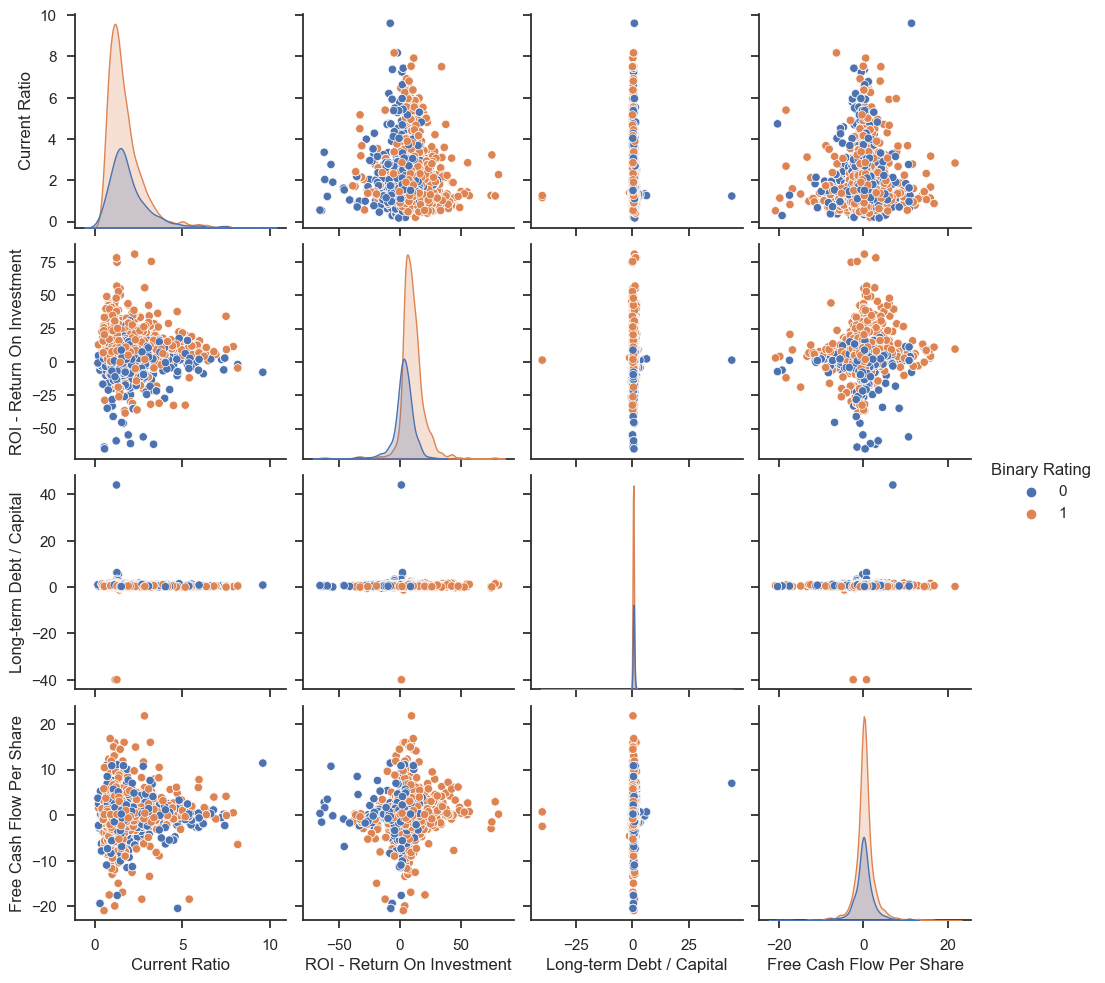

In [147]:
df1 = df[['Binary Rating', 'Current Ratio', 'ROI - Return On Investment','Long-term Debt / Capital', 'Free Cash Flow Per Share']]
sns.set_theme(style="ticks")

sns.pairplot(df1, hue='Binary Rating')

Conclusiones Analíticas Visiblemente Evidentes.
1. Relación 'Current Ratio' vs 'ROI - Return On Investment': Los Valores de ROI > 0 suelen identificar Empresas con Calificación de Inversión, mientras que Los Valores de ROI < 0 suelen identificar Empresas con Calificación de Desinversión, independiente del Valor de Current Ratio.
2. 'ROI - Return On Investment' vs 'Long-term Debt / Capital': Los Valores de ROI > 0 para Long-term Debt / Capital > 0, suelen identificar Empresas con Calificación de Inversión, mientras que Los Valores de ROI < 0 suelen identificar Empresas con Calificación de Desinversión, independiente del Valor de Long-term Debt / Capital.
3. 'ROI - Return On Investment' vs 'Free Cash Flow Per Share': Los Valores de ROI > 0 suelen identificar Empresas con Calificación de Inversión, mientras que Los Valores de ROI < 0 suelen identificar Empresas con Calificación de Desinversión, independiente del Valor de Free Cash Flow Per Share.
4. Relación 'Free Cash Flow Per Share' vs 'Long-term Debt / Capital': En general, la mayoría de las empresas suelen tener Long-term Debt / Capital > 0 independiente del valor de Free Cash Flow Per Share.

Conclusiones Conceptuales.
1. Los Ratios de Rentabilidad sobre la Inversión, generalmente permiten identificar si es recomendable o no invertir en una empresa, independiente del valor de otras variables como Ratios de Liquidez, Ratios de Endeudamiento y Ratios de Flujo de Caja.
2. En General, las empresas suelen tener Ratios de Endeudamiento mayores a Cero, por lo cual, destinan parte de sus recursos como pasivos y su nivel de endeudamiento, no guarda relación con la liquidez que generan sus acciones. En otras palabras, las empresas que generan mayor liquidez, no necesariamente la utilizan para paagr sus deudas.

GRÁFICOS DE DENSIDAD POR INDUSTRIA.

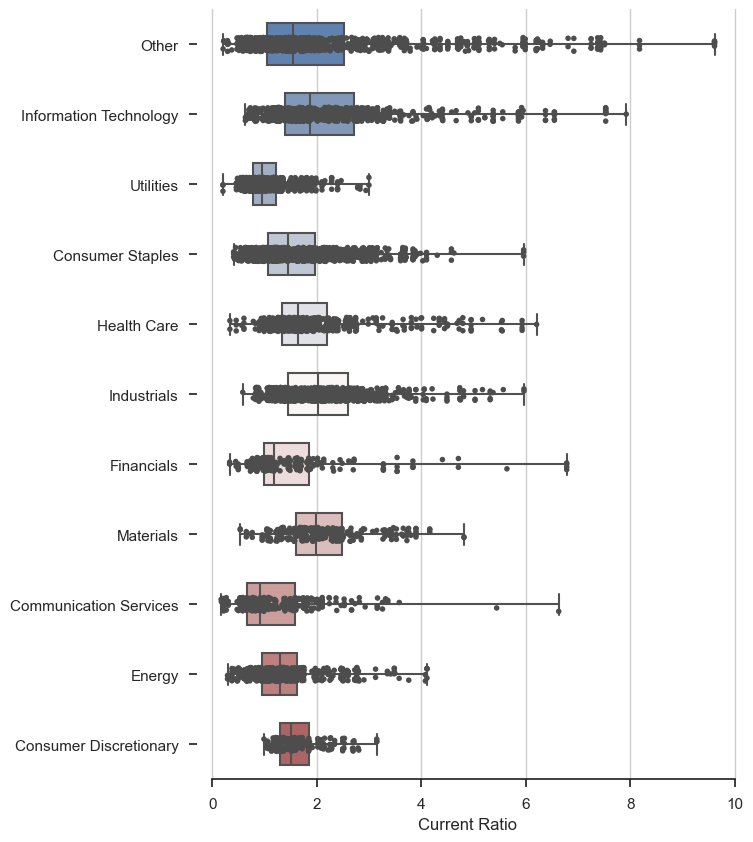

In [148]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 10))
ax.set_xscale("linear")

df2 = df[['Sector', 'Current Ratio']]

# Plot the orbital period with horizontal boxes
sns.boxplot(
    x="Current Ratio", y="Sector", data=df2,
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(x="Current Ratio", y="Sector", data=df2, size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Conclusiones:
1. Las Empresas de los Rubros de Información & Tecnología, Industrial, Fabricación de Materiales y Otros, poseen altos niveles de Liquidez, en comparación a los otros rubros, con una alta Variabilidad y frecuencia de registro dentro de los Rangos Intercuartílicos .
2. Las Empresas de los Rubros mencionados previamente, podrían ser una buena oportunidad de Inversión, siempre y cuando sus ratios de rentabilidad sean estables en el tiempo y se privilegie la Entrega de Dividendos a sus Accionistas, por sobre la Reinversión o Pago de Deuda.

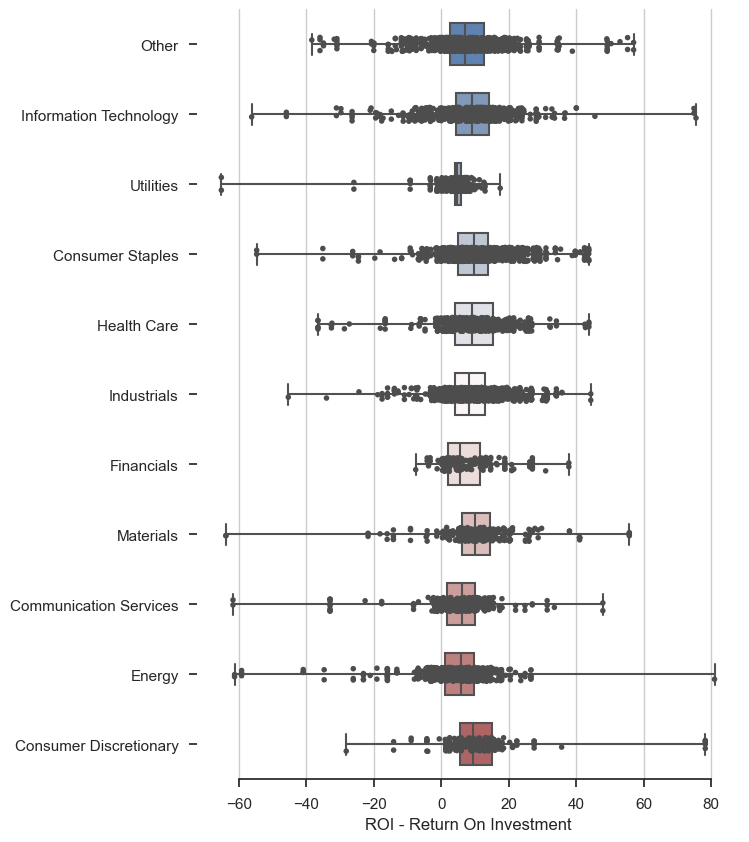

In [149]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 10))
ax.set_xscale("linear")

df3 = df[['Sector', 'ROI - Return On Investment']]

# Plot the orbital period with horizontal boxes
sns.boxplot(
    x='ROI - Return On Investment', y="Sector", data=df3,
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(x='ROI - Return On Investment', y="Sector", data=df3, size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Conclusiones:
1. Las Empresas de los Rubros de Información & Tecnología, Productos Básicos, Salud, Fabricación de Materiales y Bienes Durables poseen altos niveles de Rentabilidad sobre la Inversión, en comparación a los otros rubros, con una alta Variabilidad y frecuencia de registro dentro de los Rangos Intercuartílicos. 
2. Las Empresas de los rubros antes mencionados podrían ser una buena oportunidad de Inversión, siempre y cuando la empresa destine constantemente parte de su liquidez en reinversión para proyectos futuros.

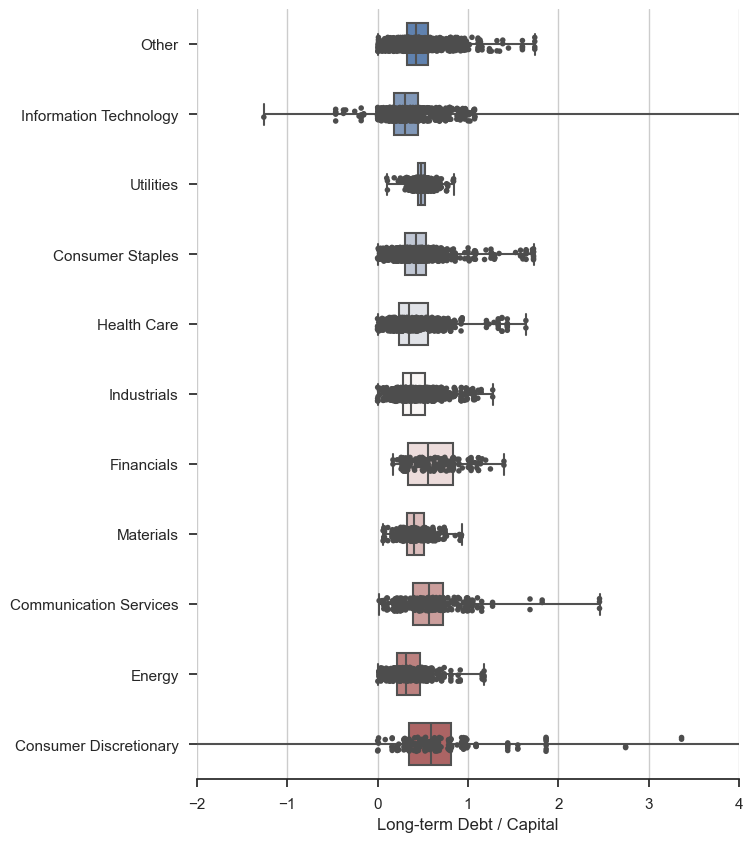

In [150]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 10))
ax.set_xscale("linear")

df4 = df[['Sector', 'Long-term Debt / Capital']]

# Plot the orbital period with horizontal boxes
sns.boxplot(
    x='Long-term Debt / Capital', y="Sector", data=df4,
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(x='Long-term Debt / Capital', y="Sector", data=df4, size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set_xlim(-2,4)
sns.despine(trim=True, left=True)

Conclusiones:
1. Las Empresas de los Rubros de Bienes Durables, Servicios de Telecomunicaciones y Financieros poseen altos niveles de Endeudamiento lo cual hace sentido, de acuerdo al modelo de Negocio del Rubro al cual pertencen.
2. Se podría Invertir en Empresas de otros Rubros, diferentes a los mencionados, siempre y cuando sus niveles de endeudamiento no sean muy grandes (> 1.5) o muy pequeños (< -0.5), no disponiendo recursos propios para endeudamiento. 

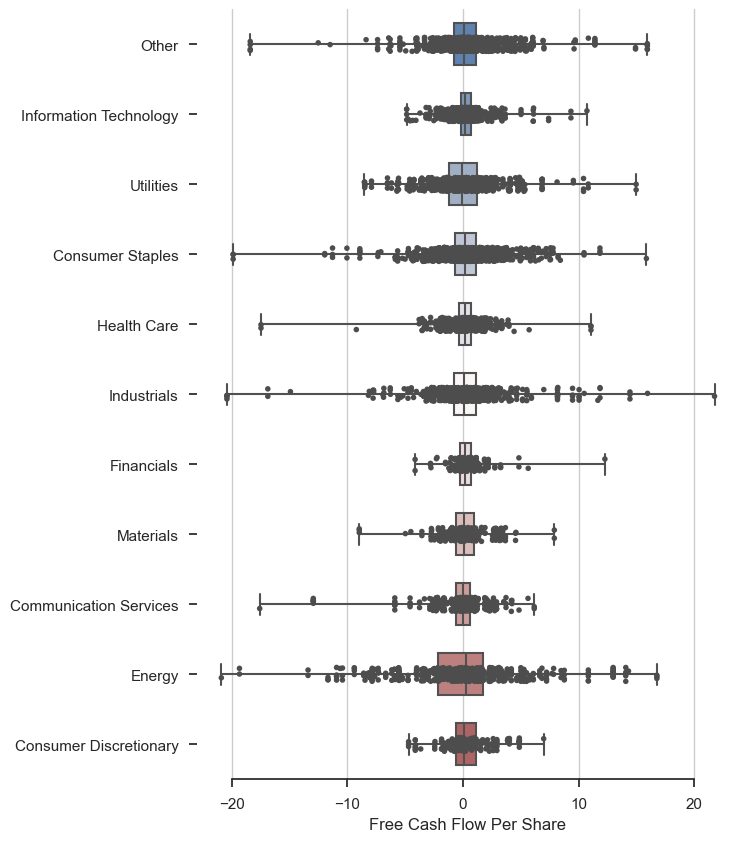

In [151]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 10))
ax.set_xscale("linear")

df5 = df[['Sector', 'Free Cash Flow Per Share']]

# Plot the orbital period with horizontal boxes
sns.boxplot(
    x='Free Cash Flow Per Share', y="Sector", data=df5,
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(x='Free Cash Flow Per Share', y="Sector", data=df5, size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Conclusiones:
1. En general, los diferentes Rubros presentan ratios de Liquidez similares en órdenes de magnitud, de acuerdo a los datos proporcionados por la muestra.
2. Se podría invertir en cualquier empresa con un buen flujo de caja, siempre y cuando esta tenga una Rentabilidad sobre la Inversión Alta y Ratios de Endeudamiento aceptables para la Industria a la cual pertenece. 

GRÁFICOS DE ESTACIONALIDAD POR PERIODO E INDUSTRIA.

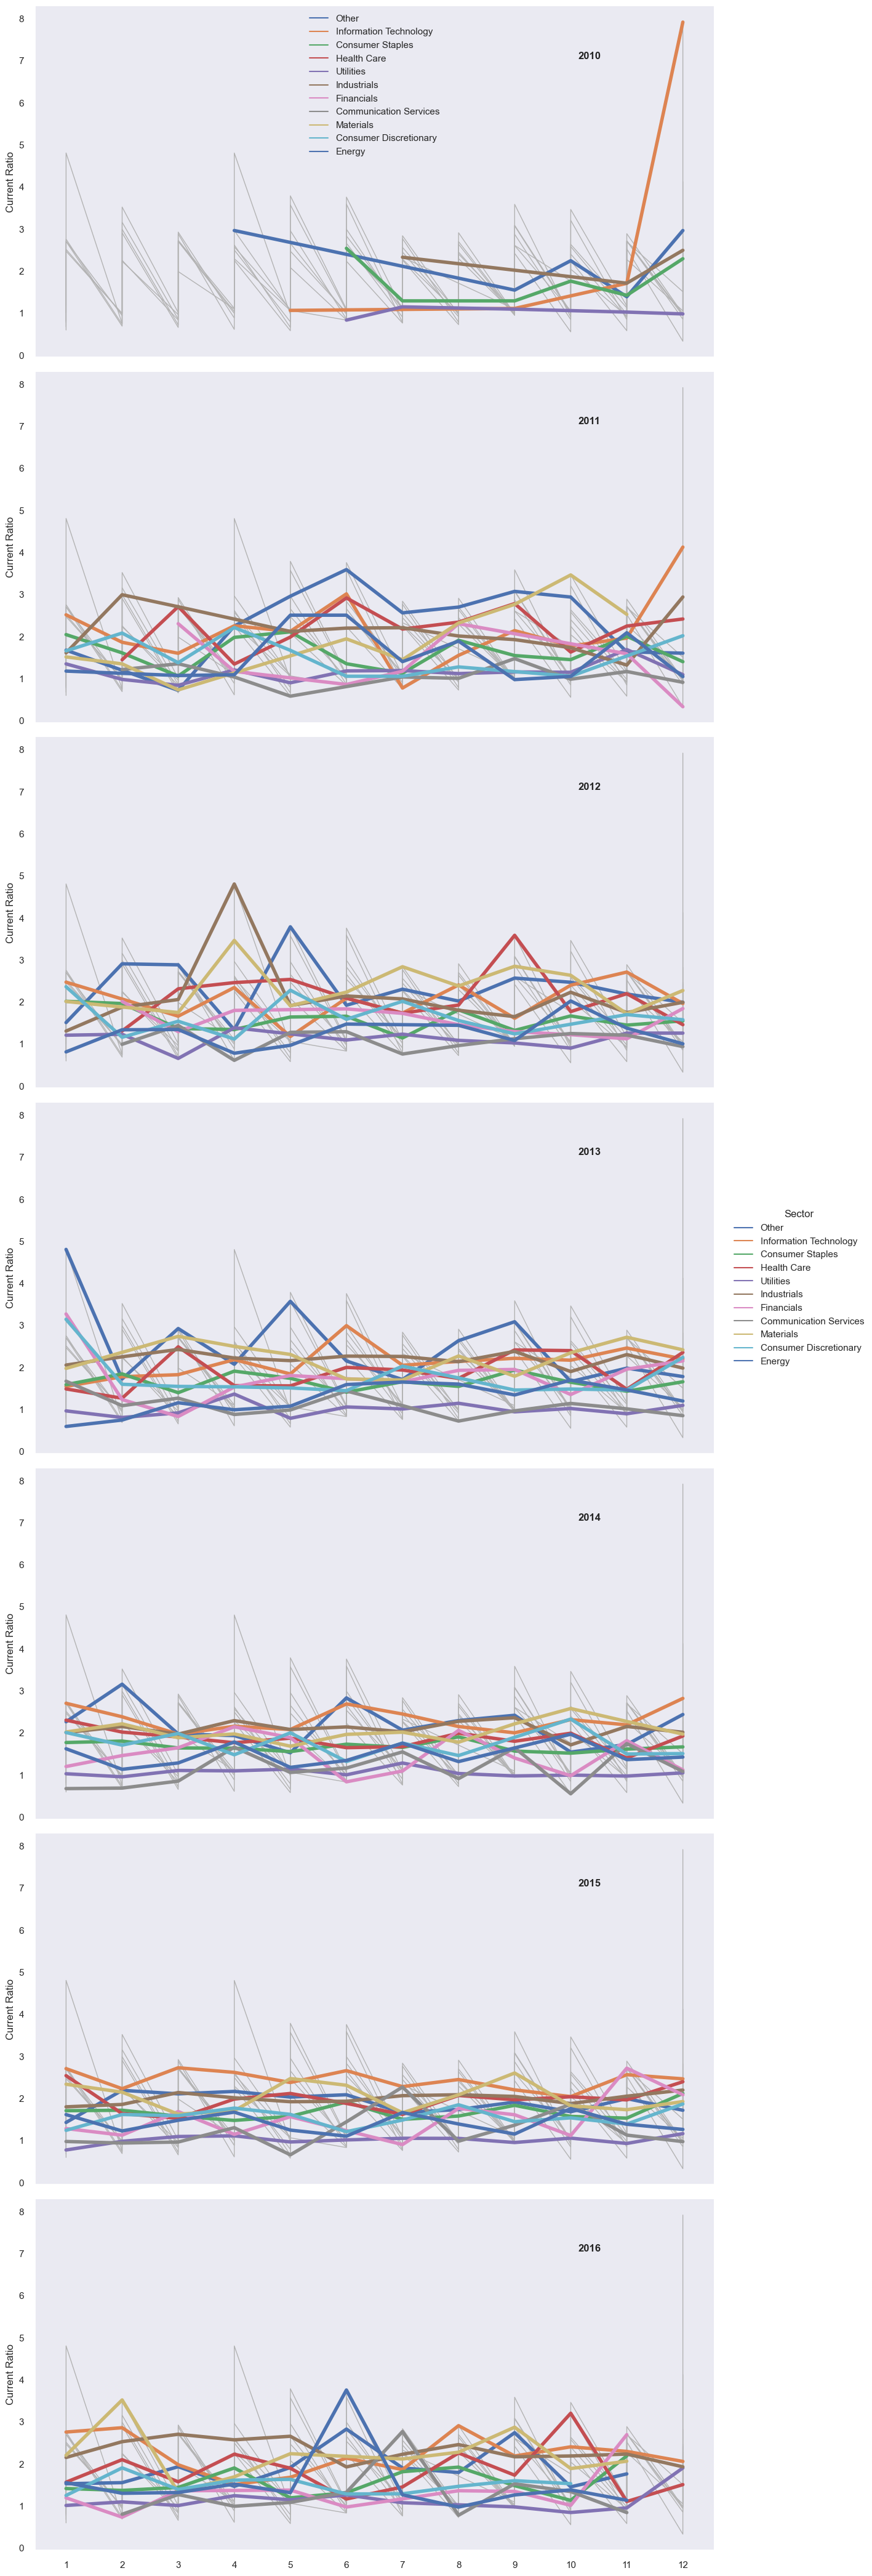

In [152]:
# Grafico Estacionalidad 1: 'Current Ratio'
sns.set_theme(style="dark")
df_avg = df.groupby(['Year', 'Month', 'Sector'])['Current Ratio'].mean().reset_index()

# Grafico Series de Tiempo por Año.
g = sns.relplot(
    data=df_avg,
    x="Month", y="Current Ratio", col="Year", hue="Sector",
    kind="line", palette="deep", linewidth=4, zorder=5,
    col_wrap=1, height=6, aspect=2,
)

# Iteración sobre subgráficos.
for year, ax in g.axes_dict.items():

    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")
    ax.set_xticks(np.arange(1, 13))

    # Graficar cada Serie de Tiempo en el Fondo.
    sns.lineplot(
        data=df_avg, x="Month", y="Current Ratio", units="Year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Titulo y Etiquetas.
g.set_titles("")
g.set_axis_labels("", "Current Ratio")
g.tight_layout()

Estacionalidad Liquidez
1. 2010: Aumento Exponencial rubro Tecnologías de la Información (Noviembre Diciembre).
2. 2011: Crecimiento Sostenido rubro Otros (Marzo a Junio) y rubro Materiales (Julio a Octubre), Aumento Exponencial rubro Tecnologías de la Información (Noviembre Diciembre).
3. 2012: Peaks Rubros Industrial, Otros y Medicina en los meses de Abril, Mayo y Septiembre Respectivamente.
4. 2013: Aumento Exponencial Rurbo otros (Diciembre 2012 a Enero 2013), peeaks en Agosto y Septiembre del mismo Rubro.
5. 2014: Sin Mayores Desviaciones / Estacionalidad.
6. 2015: Sin Mayores Desviaciones / Estacionalidad.
7. 2016: Peaks Rubros de Materiales, Otros y Medicina en los meses de Febrero, Junio y Octubre respectivamente.

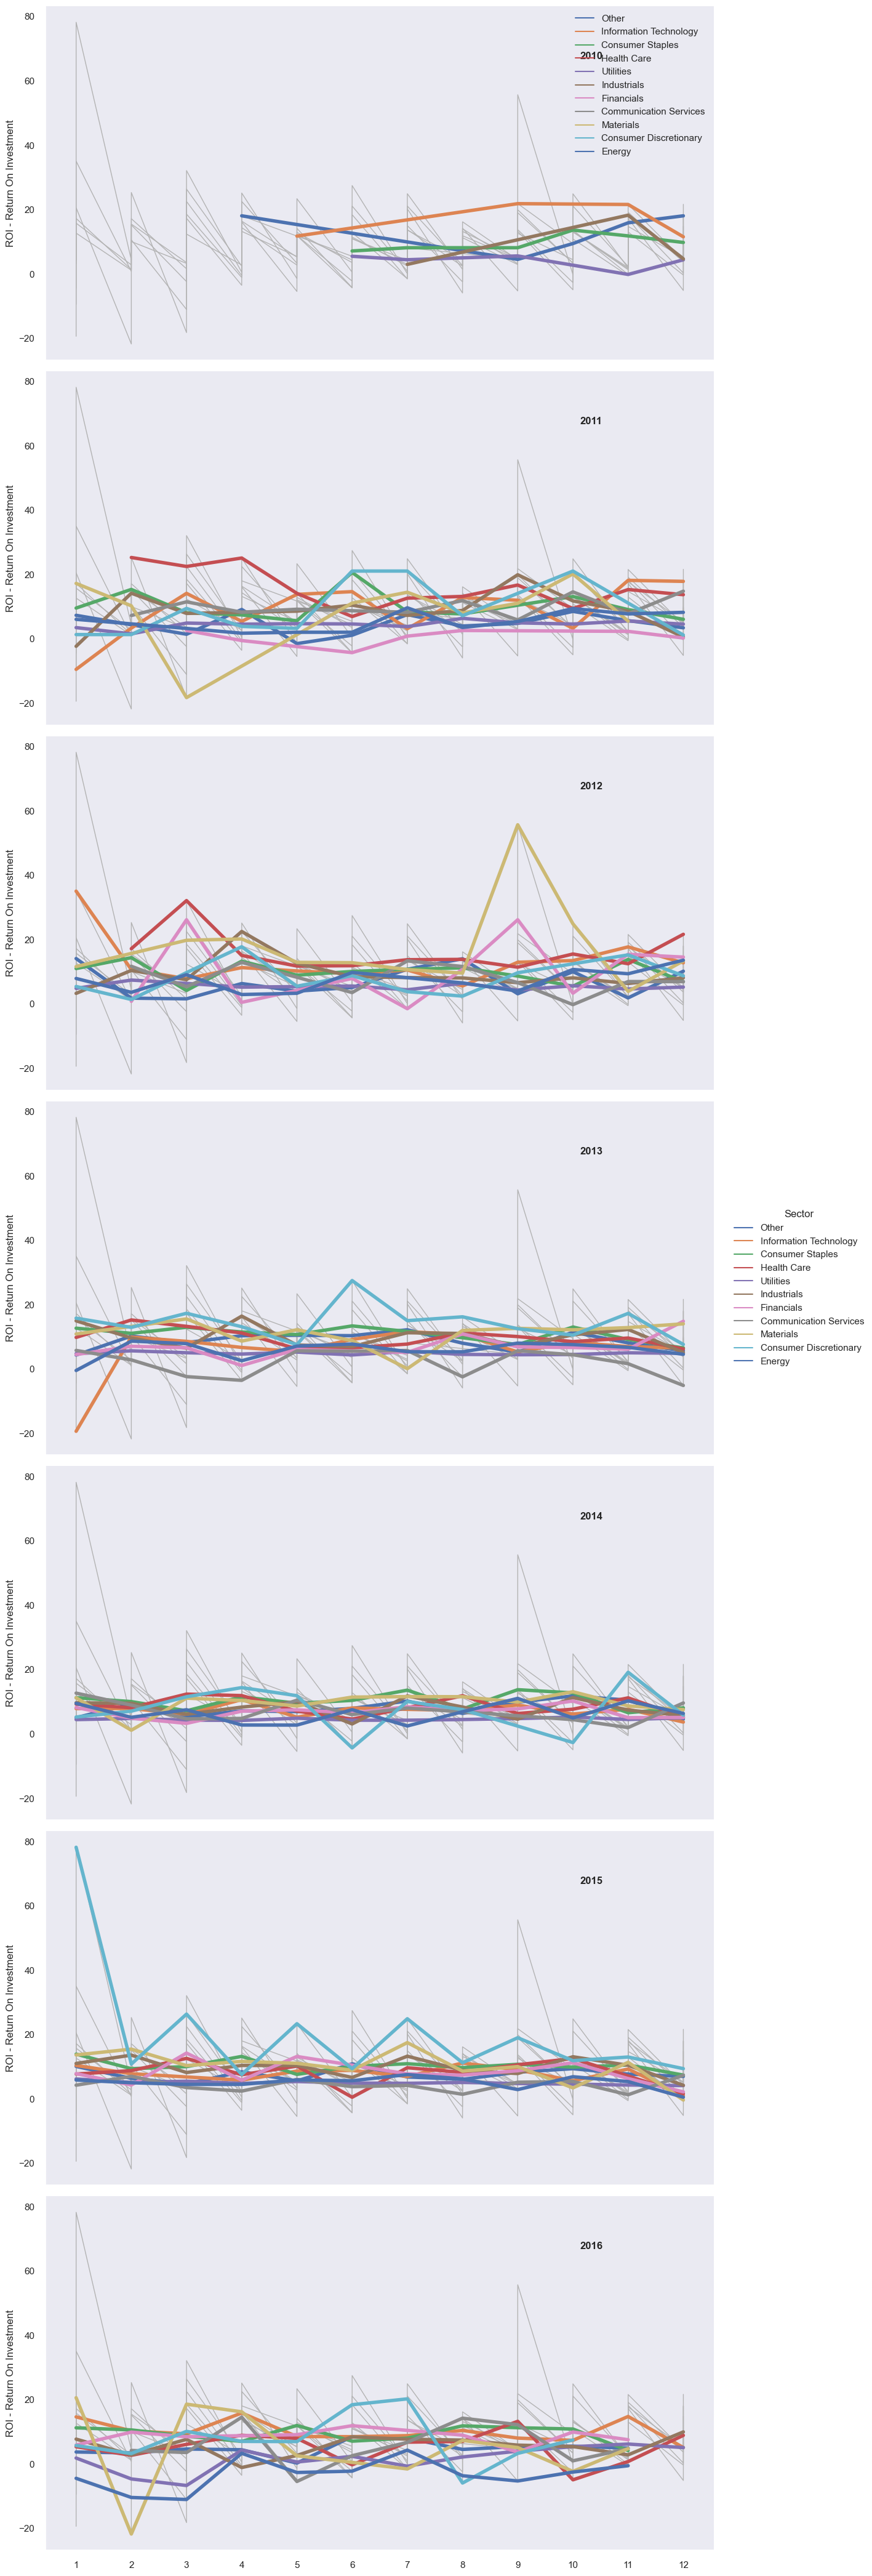

In [153]:
# Grafico Estacionalidad 2: 'ROI - Return On Investment'
sns.set_theme(style="dark")
df_avg_2 = df.groupby(['Year', 'Month', 'Sector'])['ROI - Return On Investment'].mean().reset_index()

# Grafico Series de Tiempo por Año.
g = sns.relplot(
    data=df_avg_2,
    x="Month", y="ROI - Return On Investment", col="Year", hue="Sector",
    kind="line", palette="deep", linewidth=4, zorder=5,
    col_wrap=1, height=6, aspect=2,
)

# Iteración sobre subgráficos.
for year, ax in g.axes_dict.items():

    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")
    ax.set_xticks(np.arange(1, 13))

    # Graficar cada Serie de Tiempo en el Fondo.
    sns.lineplot(
        data=df_avg_2, x="Month", y="ROI - Return On Investment", units="Year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Titulo y Etiquetas.
g.set_titles("")
g.set_axis_labels("", "ROI - Return On Investment")
g.tight_layout()

Estacionalidad Rentabilidad sobre la Inversión.
1. 2010: Sin Mayores Desviaciones / Estacionalidad.
2. 2011: Valores altos para Rubro de Medicina entre Febrero y Abril. Caída grave rubro Materiales entre Febrero y Marzo, posteriormente recuperado Entre Marzo y Julio. Buen incremento Rubro Tecnologías de la Información Entre Enero y Marzo.
3. 2012: Peak Muy Alto Rubro Materiales entre Agosto y Septiembre con posterior caída. Peaks de Rubro Financiero en Marzo y Septiembre. Peak Rubro Medicina en Marzo, con valores estables para el resto del año.
4. 2013: Aumento Exponencial Rubro Tecnologías de la Información entre Enero y Febrero. Peak Bienes Durables mes de Julio.
5. 2014: Sin Mayores Desviaciones / Estacionalidad.
6. 2015: Fuerte caída Rubro Bienes Durables entre Enero y Febrero, consecuentes Peaks menores en Marzo, Mayo, Julio Septiembre. 
7. 2016: Fuerte Caída Rubro Materiales entre Enero y Febrero, recuperada posteriormente. 

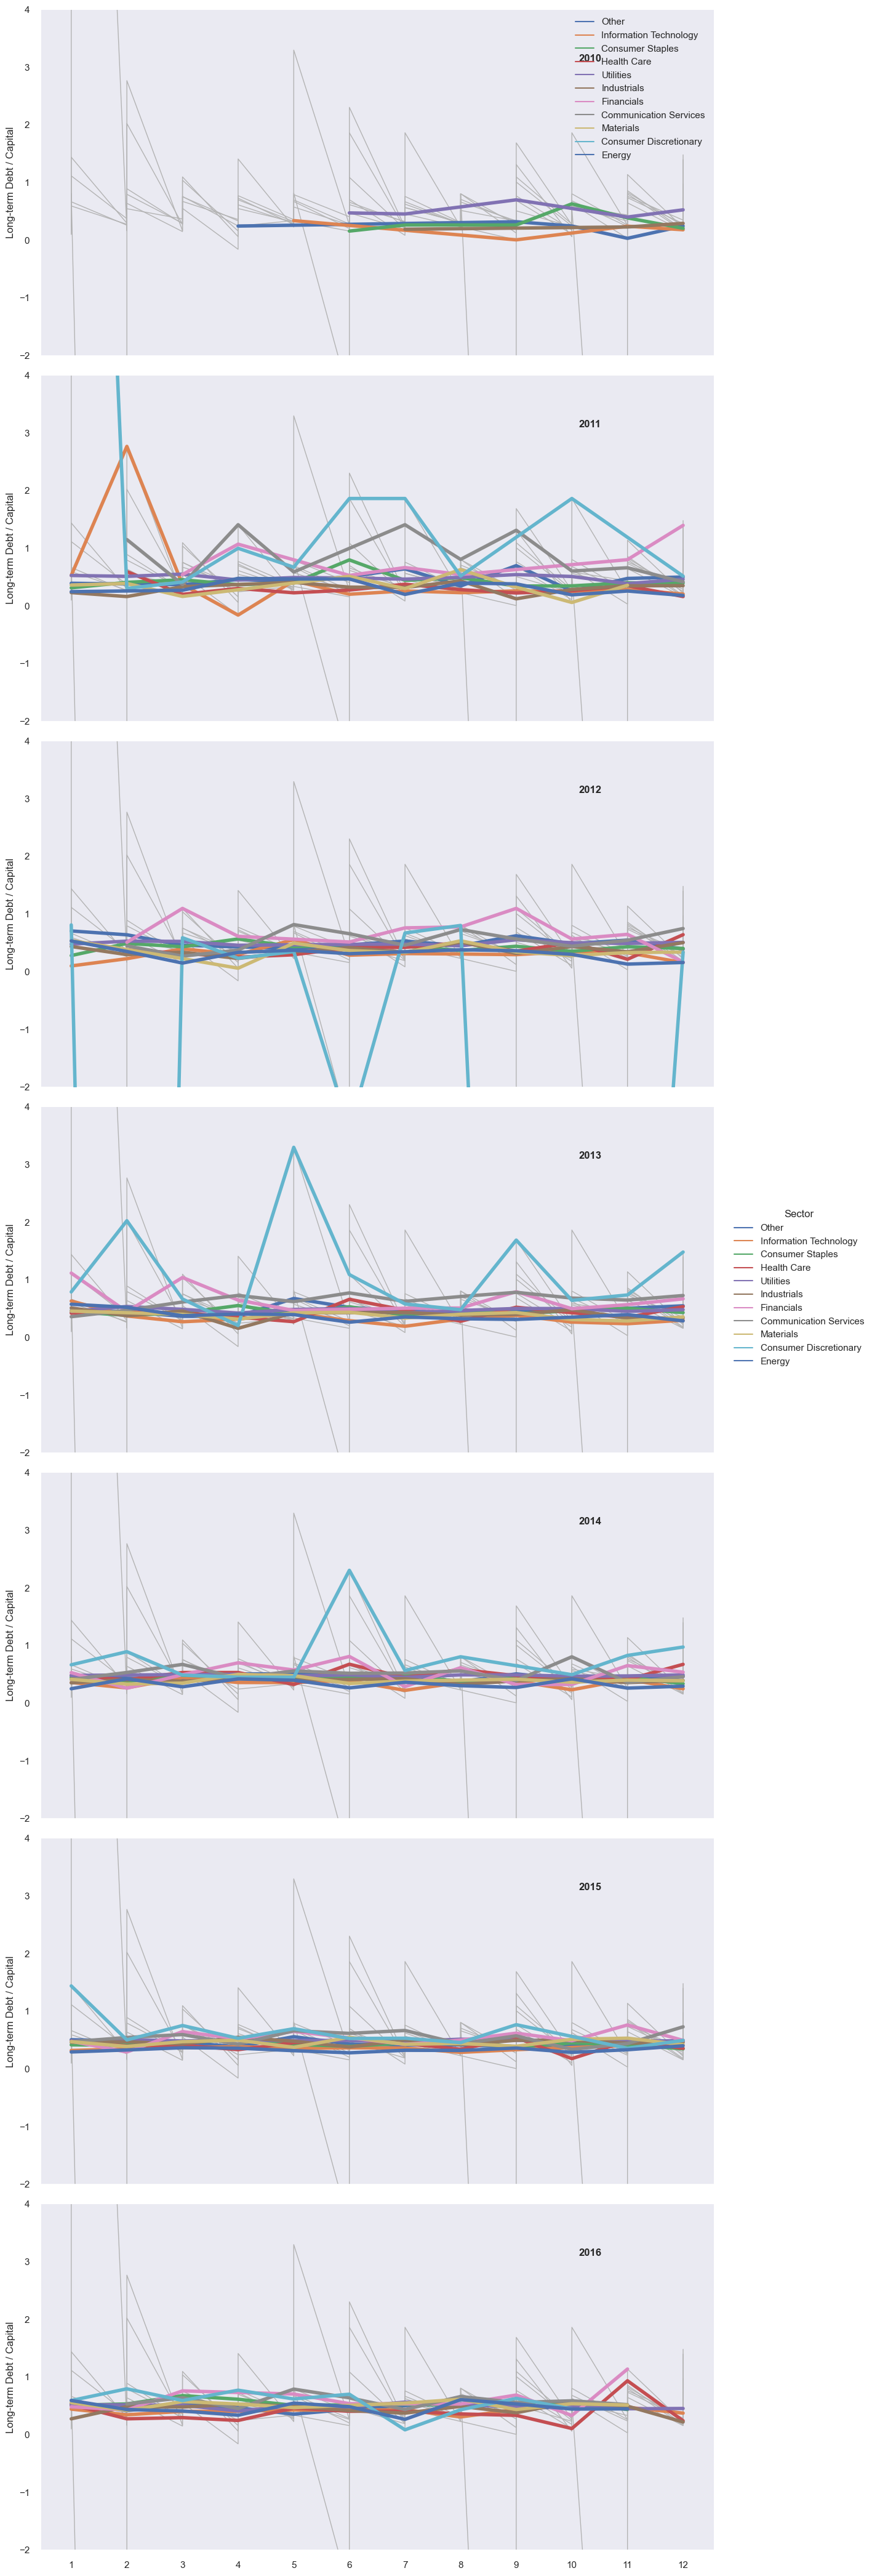

In [182]:
# Grafico Estacionalidad 3: 'Long-term Debt / Capital'
sns.set_theme(style="dark")
df_avg_3 = df.groupby(['Year', 'Month', 'Sector'])['Long-term Debt / Capital'].mean().reset_index()

# Grafico Series de Tiempo por Año.
g = sns.relplot(
    data=df_avg_3,
    x="Month", y='Long-term Debt / Capital', col="Year", hue="Sector",
    kind="line", palette="deep", linewidth=4, zorder=5,
    col_wrap=1, height=6, aspect=2,
)

# Iteración sobre subgráficos.
for year, ax in g.axes_dict.items():

    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")
    ax.set_xticks(np.arange(1, 13))
    ax.set_ylim(-2,4)

    # Graficar cada Serie de Tiempo en el Fondo.
    sns.lineplot(
        data=df_avg_3, x="Month", y='Long-term Debt / Capital', units="Year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Titulo y Etiquetas.
g.set_titles("")
g.set_axis_labels("", 'Long-term Debt / Capital')
g.tight_layout()

Estacionalidad Deuda sobre Capital.
1. 2010: Sin Mayores Desviaciones / Estacionalidad.
2. 2011: Aumento Exponencial Rubro Bienes Durables entre Enero y Febrero, con consecuentes Peaks en los Meses de Junio, Julio, Octubre.
3. 2012: Fuerte Caída Rubro Bienes Durables entre Enero y Febrero, con posterior recuperación y estabilidad entre Marzo y Agosto, para volver a caer y recuperarse entre Septiembre y Diciembre.
4. 2013: Caídas significativas Rubro Bienes Durables en los Meses de Febrero y Mayo, con posterior recuperación y estabilidad.
5. 2014: Caída significativa Rubro Bienes Durables entre Mayo y Junio.
6. 2015: Sin Mayores Desviaciones / Estacionalidad.
7. 2016: Sin Mayores Desviaciones / Estacionalidad.

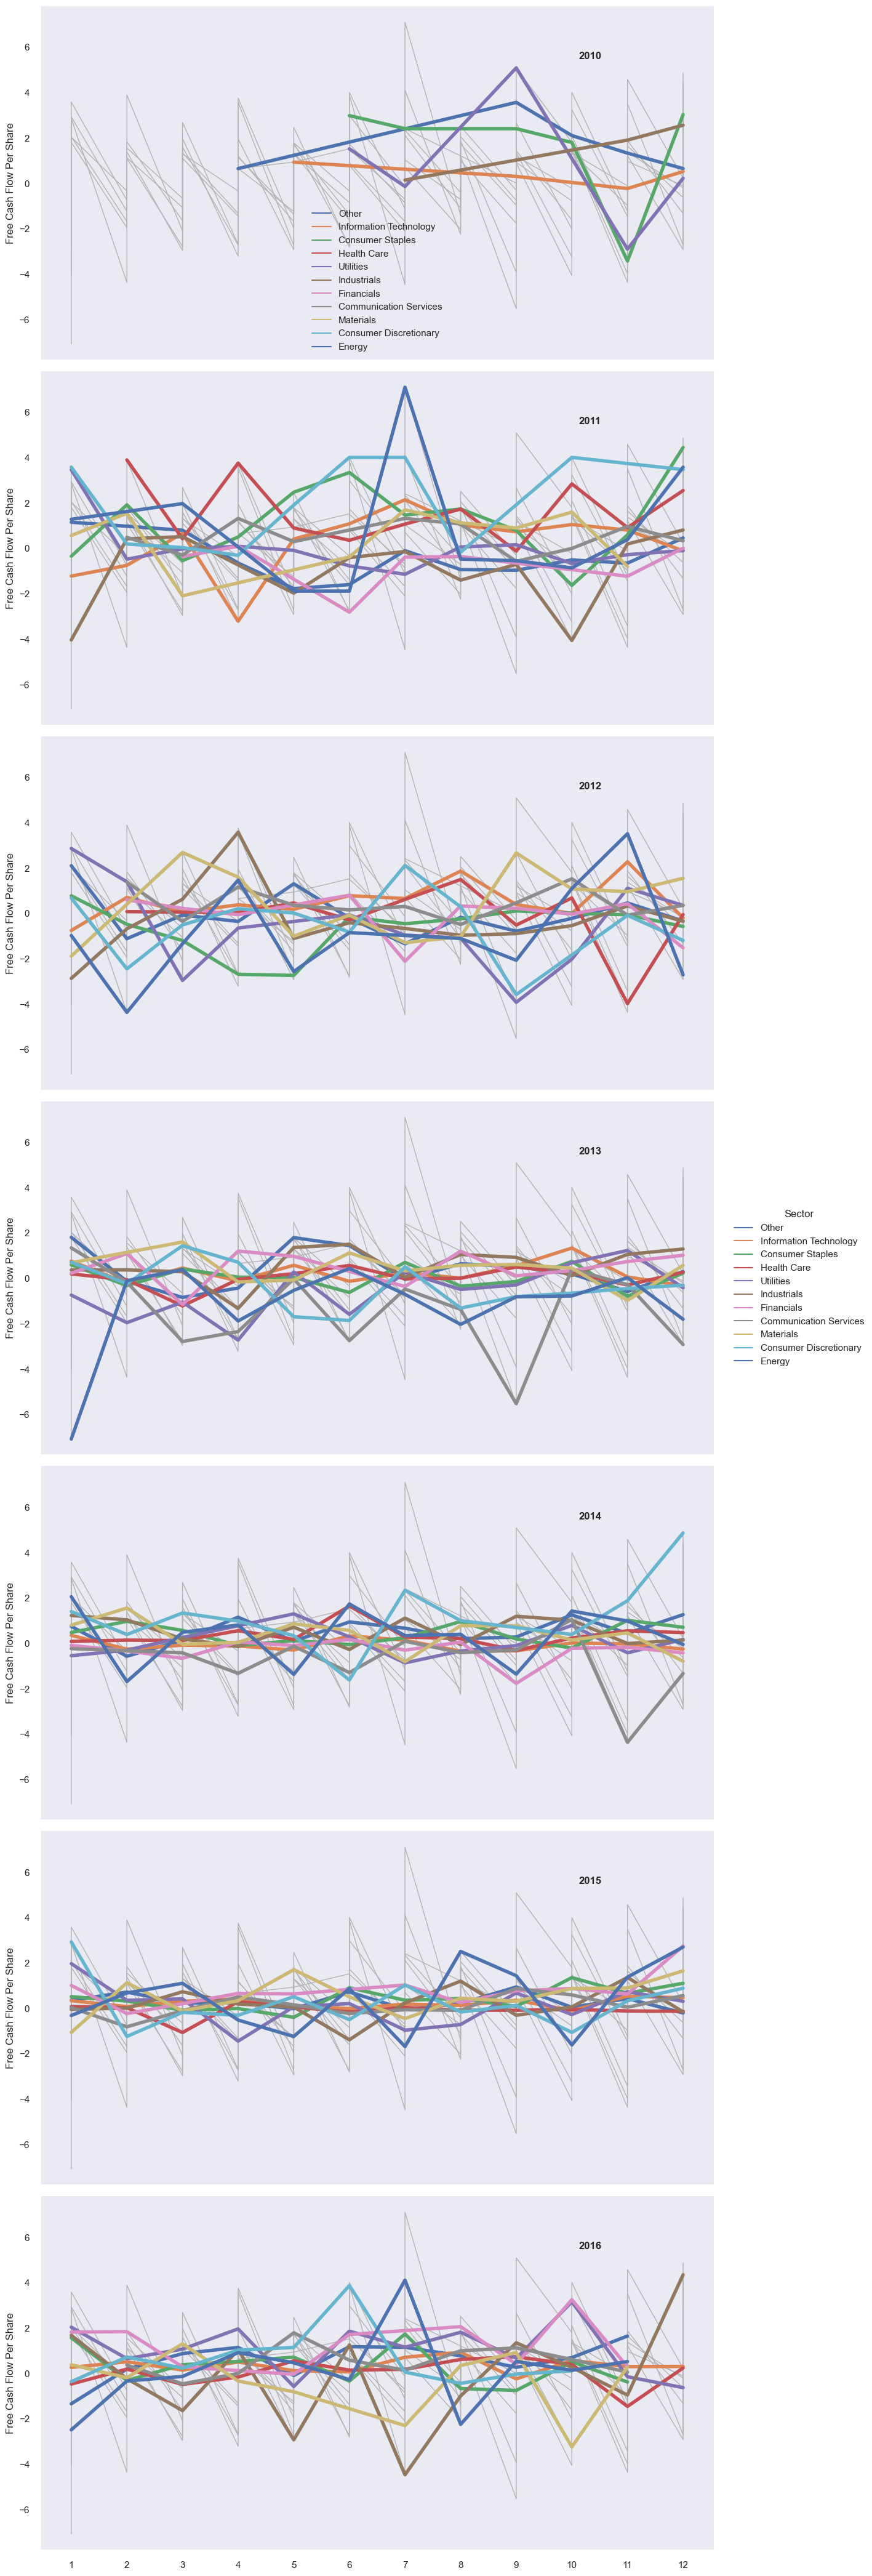

In [155]:
# Grafico Estacionalidad 4: 'Free Cash Flow Per Share'
sns.set_theme(style="dark")
df_avg_4 = df.groupby(['Year', 'Month', 'Sector'])['Free Cash Flow Per Share'].mean().reset_index()

# Grafico Series de Tiempo por Año.
g = sns.relplot(
    data=df_avg_4,
    x="Month", y='Free Cash Flow Per Share', col="Year", hue="Sector",
    kind="line", palette="deep", linewidth=4, zorder=5,
    col_wrap=1, height=6, aspect=2,
)

# Iteración sobre subgráficos.
for year, ax in g.axes_dict.items():

    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")
    ax.set_xticks(np.arange(1, 13))

    # Graficar cada Serie de Tiempo en el Fondo.
    sns.lineplot(
        data=df_avg_4, x="Month", y='Free Cash Flow Per Share', units="Year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Titulo y Etiquetas.
g.set_titles("")
g.set_axis_labels("", 'Free Cash Flow Per Share')
g.tight_layout()

Estacionalidad Flujo de Caja por Acción.
1. Alta Variabilidad y Dispersión de los Datos a lo largo de todos los periodos y rubros anzalizados. No es posible obtener conclusiones al respecto.

6. Conclusiones Recomendaciones y Respuestas

3.1  ¿Cuantas Clasificaciones nos permiten obtener un Resultado de Inversión Asertivo para los Clientes?

3.1.A: Para lograr un equilibro estable de la muestra en función de la cantidad de registros por clasificación y así evitar sobreajuste de los datos en el modelo preditivo, se recomienda clasificar las empresas en 7 niveles jeráquicos, los cuales posteriormente indicará la recomendación de Invertir o no hacerlo.

3.2  ¿De qué manera influye la estacionalidad en los Ratios Financieros Analizados?

3.2.A Si bien se realiza un análisis de los ratios para los diferentes periodos, no existe un patrón de estacionalidad clara para la evolución de una variable a lo largo del tiempo para un rubro en Particular. Se recomienda ampliar la muestra y/o utilizar parámetros de medición diferentes al promedio, los cuales pueden no ser lo suficientemente representativos.

3.3  ¿Es posible que las Variables Predictoras tengan cierto grado de Correlación, sesgando el Modelo Predictivo?

3.3.A Queda en evidencia el alto grado de Correlación y Colinealidad entre las variables Predictoras, es por esta razón que gran parte de ellas es descartada, dejando únicamente 4 variables para predecir la Variable de Respuesta.

3.4  ¿Cual es la incidencia del Know How Financiero para el Tratamiento de Valores Atípicos? 

3.4.A El conocimiento Financiero es fundamental para el Análisis y Tratamiento de Outliers, ya que valores extremos que en cualquier otro contexto pueden ser considerados como atípicos (a ser tratados o eliminados posteriormente), en el mundo financiero pueden ser perfectamente posibles, siempre y cuando sean contrastados y analizados en detalle. 

3.5  ¿Que tanto influye el Rubro o Industria a la cual pertence la empresa en la decisión de Inversión?

3.5.A Queda en Evidencia que el Rubro al cual pertenece una Empresa influye directamente en los Valores de las Variables Predictoras (Ratios Financieros), las cuales posteriormente incidirán en la clasificación final, por lo cual, se recomienda de sobremanera identificar las Industrias a las cuales pertenece la empresa y contrastar el cómo los ratios financieros pueden cambiar significativamente entre una y otra.

7. Feature Engineering - Creación de Nuevas Variables

7.1 Reduccción de Dimensionalidad.
# MCA - Analisis de correspondencias Multiples (PCA para variables Categóricas)
# https://maxhalford.github.io/prince/mca/

MCA se utiliza principalmente para analizar variables categóricas, mientras que PCA se utiliza principalmente para analizar variables continuas

MCA se basa en tablas de contingencia y en la distancia chi-cuadrado, mientras que PCA se basa en la matriz de covarianza o de correlación

MCA no impone restricciones en las categorías de las variables, mientras que PCA asume que las variables son linealmente independientes

In [214]:
# PCA - Principal Component Analysis
from prince import PCA
pca = prince.PCA(
    n_components=4,
    n_iter=64,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
pca = pca.fit(df[[
    'Current Ratio', 'ROI - Return On Investment',
    'Long-term Debt / Capital', 'Free Cash Flow Per Share']])

In [215]:
# Eigen Values - La Importancia de un Componente tiene que ver con la proporción de Inercia del Dataset que Explica.
pca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              1.095        27.37%                     27.37%
1              1.015        25.38%                     52.76%
2              0.988        24.70%                     77.45%
3              0.902        22.55%                    100.00%

De esta manera, el componente 0 explica el 27%, los primeros 2 componentes explican el 53%, los primeros 3 componentes explican el 77% y los 4 componentes explican el 100% de la inercia del Dataset, respectivamente.

In [216]:
pca.scree_plot()

alt.Chart(...)

In [218]:
pca.column_contributions_.head(10).style.format('{:.0%}')

7. Selección del Algoritmo
https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html

8. Desarrollo del Algoritmo

8.1 Data Frame Final

In [156]:
df_final = df[['Corporation', 'Rating_OE', 'Binary Rating', 'Sector', 'Current Ratio', 'Long-term Debt / Capital', 'ROI - Return On Investment', 'Free Cash Flow Per Share', 'Rating_OE']]

In [157]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7285 entries, 33 to 7666
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Corporation                 7285 non-null   string 
 1   Rating_OE                   7285 non-null   int64  
 2   Binary Rating               7285 non-null   int64  
 3   Sector                      7285 non-null   string 
 4   Current Ratio               7285 non-null   float64
 5   Long-term Debt / Capital    7285 non-null   float64
 6   ROI - Return On Investment  7285 non-null   float64
 7   Free Cash Flow Per Share    7285 non-null   float64
 8   Rating_OE                   7285 non-null   int64  
dtypes: float64(4), int64(3), string(2)
memory usage: 827.2 KB


8.2 Arbol de Decisión.

8.2.1 Hiperparámetros

Los hiperparámetros son variables de configuración externa que los científicos de datos utilizan para administrar el entrenamiento de modelos de machine learning. A veces llamados hiperparámetros de modelos, los hiperparámetros se configuran de manera manual antes de entrenar un modelo.

https://aws.amazon.com/es/what-is/hyperparameter-tuning/

Vamos a regularizar el algoritmo. Recuerden que este tiene distintos parametros. En particular, podemos elegir si utiliza Gini o Entropia para calcular la impureza de un splitting. Generalmente no hay diferencia pero por definicion Gini puede favorecer mas la clase mas frecuente. La ventaja es que es mas rapida.

Las opciones que tenemos en sklearn son:

max_depth: por defecto es None, controla la profundidad del arbol.

min_samples_split: establece el minimo numero de muestras que debe tener un nodo para poder seguir partiendolo.

min_samples_leaf: el minimo numero de muestras que debe tener una hoja.

min_impurity_decrease= Si el valor de la impureza disminuida por una división es menor que min_impurity_decrease, entonces la división no se realiza y el nodo se convierte en una hoja final.

max_leaf_nodes: maxima cantidad de hojas.

max_features: maxima cantidad de features evaluados en un splitting.

Si uno sube los valores minimos o baja los maximos, esta restringiendo al arbol y regularizando el modelo.

Existen otros metodos de regularizacion como por ejemplo el pruning o podado de arboles en el que se entrena sin restricciones y luego se eliminan nodos innecesarios

In [158]:
# Dividir el conjunto de datos en Entrenamiento y Prueba
# stratify: permite asegurarse que en entrenamiento y testeo tenga las mismas propociones de datos iniciales.

X= df_final[['Current Ratio', 'Long-term Debt / Capital', 'ROI - Return On Investment', 'Free Cash Flow Per Share']]
y= df_final['Binary Rating']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69, stratify=y)

In [159]:
values_counts_y_train = np.asarray(np.unique(y_train, return_counts=True))
values_counts_y_train

array([[   0,    1],
       [1742, 3721]], dtype=int64)

In [160]:
values_counts_y_test = np.asarray(np.unique(y_test, return_counts=True))
values_counts_y_test

array([[   0,    1],
       [ 581, 1241]], dtype=int64)

8.2 Regresión Logística

In [161]:
# Regresión Logística
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [162]:
# Predicción en Entrenamiento
reg_log_train = classifier.fit(X_train, y_train)

y_train_pred_reg_log = reg_log_train.predict(X_train)

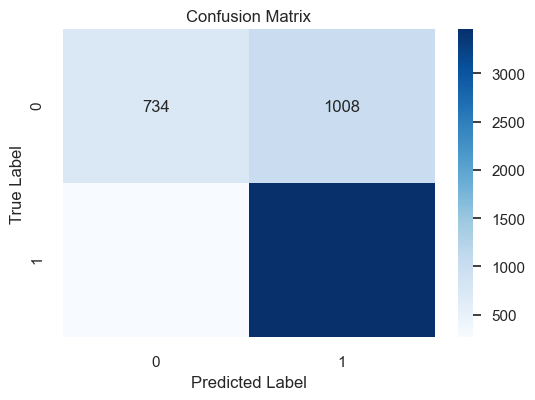

In [163]:
# Matriz de Confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred_reg_log)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [164]:
# Precision por Categoria
from sklearn import metrics

precision_positiva = metrics.precision_score(y_train, y_train_pred_reg_log, pos_label=1)
precision_negativa = metrics.precision_score(y_train, y_train_pred_reg_log, pos_label=0)
precision_positiva, precision_negativa

(0.7742441209406495, 0.7354709418837675)

In [165]:
# Recall - Información sobre la capacidad del modelo para detectar correctamente los casos positivos en una clase específica
metrics.recall_score(y_train, y_train_pred_reg_log, pos_label=1), metrics.recall_score(y_train, y_train_pred_reg_log, pos_label=0)

(0.9290513302875572, 0.4213547646383467)

In [166]:
# Resumen Métricas Train
print(metrics.classification_report(y_train, y_train_pred_reg_log))

              precision    recall  f1-score   support

           0       0.74      0.42      0.54      1742
           1       0.77      0.93      0.84      3721

    accuracy                           0.77      5463
   macro avg       0.75      0.68      0.69      5463
weighted avg       0.76      0.77      0.75      5463



In [167]:
# Predicción en Prueba
reg_log_test = classifier.fit(X_test, y_test)

y_test_pred_reg_log = reg_log_test.predict(X_test)

In [168]:
# Resumen Métricas Test
print(metrics.classification_report(y_test, y_test_pred_reg_log))

              precision    recall  f1-score   support

           0       0.76      0.44      0.56       581
           1       0.78      0.94      0.85      1241

    accuracy                           0.78      1822
   macro avg       0.77      0.69      0.70      1822
weighted avg       0.78      0.78      0.76      1822



In [169]:
# Entrenar el arbol
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=25, min_samples_leaf=10)
clf = clf.fit(X_train, y_train)

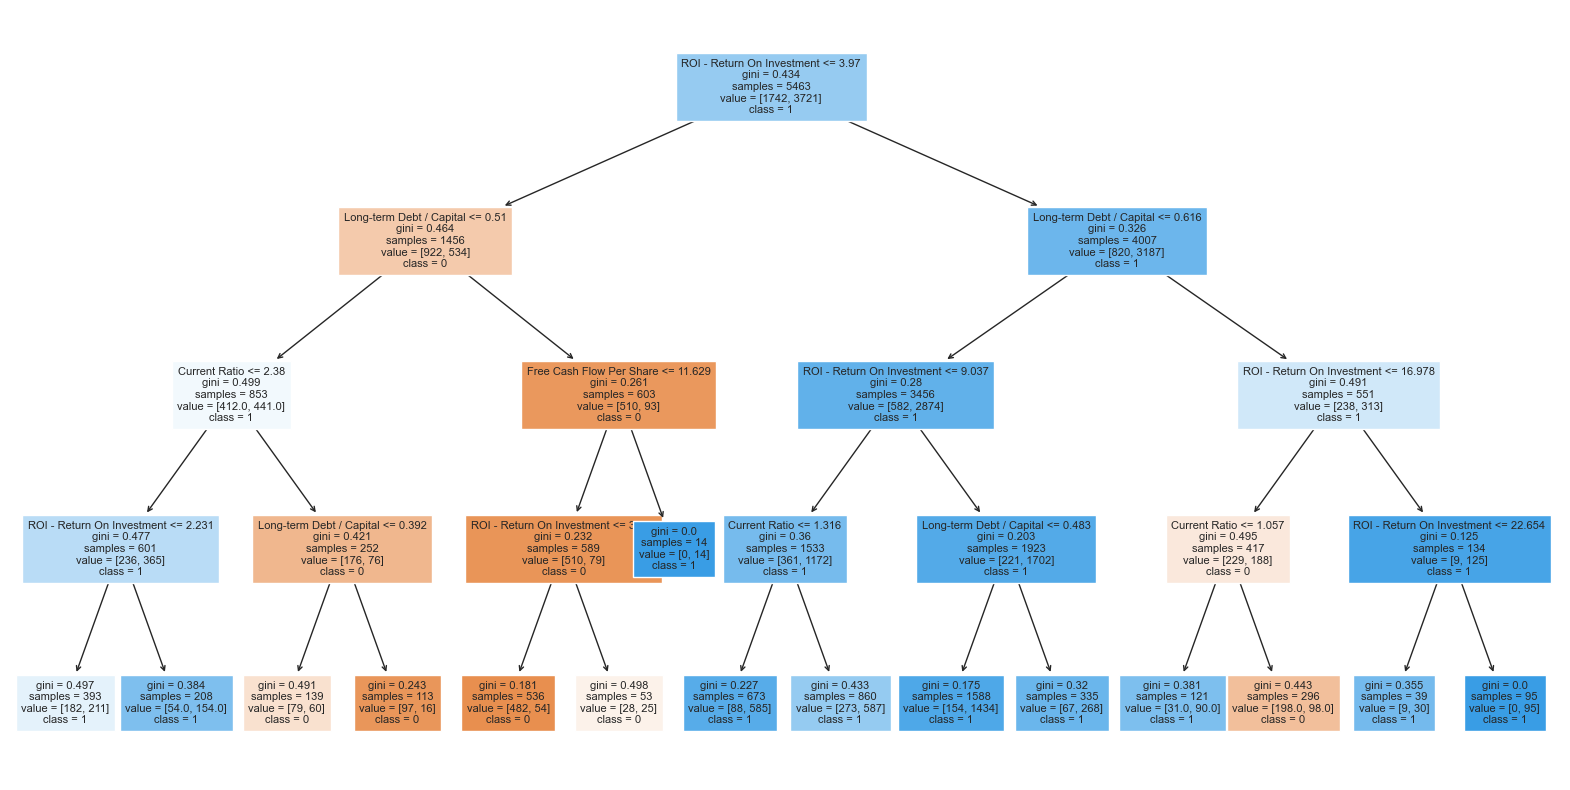

In [170]:
# Graficando
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf,feature_names=X_train.columns,
                   class_names=[str(cls) for cls in y_train.unique()],
                   filled=True, fontsize=8)

8.2.2 Importancia de las Variables.
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [171]:
importances = clf.feature_importances_

# Nombre de las variables
feature_names = X_train.columns

# Crear un DataFrame con las importancias de las variables
importance_dt_df = pd.DataFrame({'Variable': feature_names, 'Importance': importances})
importance_dt_df = importance_dt_df.sort_values('Importance', ascending=False)

importance_dt_df

Variable  Importance
2  ROI - Return On Investment    0.633393
1    Long-term Debt / Capital    0.225860
0               Current Ratio    0.114336
3    Free Cash Flow Per Share    0.026411

In [172]:
# Reporte de Clasificación, Resultados en Testeo
from sklearn.metrics import classification_report
y_pred= clf.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.77      0.48      0.59       581
           1       0.79      0.93      0.86      1241

    accuracy                           0.79      1822
   macro avg       0.78      0.71      0.73      1822
weighted avg       0.79      0.79      0.77      1822



8.3 Random Forest

In [173]:
# Estimadores: N° De Árboles Predictores (Por Defecto 100).

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, n_estimators=50)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=50)

In [174]:
# Predicción en Entrenamiento
y_pred_train = clf.predict(X_train)
y_pred_train

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

8.3.1 Importancia de las Variables.

In [175]:
importances = clf.feature_importances_

feature_names = X_train.columns

# Crear un DataFrame con las importancias de las variables
importance_df = pd.DataFrame({'Variable': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

importance_df

Variable  Importance
2  ROI - Return On Investment    0.569825
1    Long-term Debt / Capital    0.284327
0               Current Ratio    0.111884
3    Free Cash Flow Per Share    0.033963

In [176]:
from sklearn.metrics import classification_report

#resultados en entrenamiento
print(classification_report(y_true=y_train,y_pred=y_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.53      0.64      1742
           1       0.81      0.94      0.87      3721

    accuracy                           0.81      5463
   macro avg       0.81      0.73      0.75      5463
weighted avg       0.81      0.81      0.80      5463



In [177]:
# Predicción en Testeo
y_pred_test = clf.predict(X_test)
y_pred_test

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

9. Guardar y Cargar Moldeo a Futuro

In [178]:
# Guardar Modelo
import pickle

# Supongamos que tienes un modelo entrenado llamado "clf"
modelo = clf

# Guardamos el modelo en un archivo utilizando pickle
with open('modelo_clf.pkl', 'wb') as archivo:
    pickle.dump(modelo, archivo)

In [179]:
# Cargar Modelo para Utilizarlo.
with open('modelo_clf.pkl', 'rb') as archivo:
    modelo_cargado = pickle.load(archivo)

# Utilizar el modelo cargado para hacer predicciones, por ejemplo:
predicciones = modelo_cargado.predict(X_test)
predicciones

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

10. Validación y Despliegue.

10.1 Validación Cruzada
https://scikit-learn.org/stable/modules/model_evaluation.html

Recordar que cuanto menor sea el valor del RMSE, más precisas serán las predicciones del modelo en relación con los valores reales.
El RMSE tiene la misma unidad de medida que la variable objetivo del problema de regresión, lo que lo hace fácilmente interpretable y comparable con el rango de los valores reales.

In [180]:
# Validación Cruzada.
grilla=GridSearchCV(modelo,hiperparametros, cv=5,scoring='neg_root_mean_squared_error')
grilla.fit(x_train,y_train)

NameError: name 'GridSearchCV' is not defined

In [ ]:
print(grilla.best_params_)
#Mejor polinomio es de grado 3

In [ ]:
grilla.cv_results_

In [ ]:
for ni, i in enumerate(grilla.cv_results_['params']):
  print(i['features__degree'],-grilla.cv_results_['mean_test_score'][ni])
plt.errorbar(grilla.cv_results_['param_features__degree'].data,(-grilla.cv_results_['mean_test_score']),yerr=grilla.cv_results_['std_test_score'])
plt.yscale('log')
plt.xlabel('grado')
plt.ylabel('RMSE en validacion')

In [ ]:
# entrenamos con el mejor modelo
modelo_lineal=grilla.best_estimator_
modelo_lineal.fit(x_train, y_train)

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_test = modelo_lineal.predict(x_test)
y_pred_train = modelo_lineal.predict(x_train)

In [ ]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')

score_train_modelo_lineal = mean_squared_error(y_train,y_pred_train,squared=False)
score_test_modelo_lineal = mean_squared_error(y_test,y_pred_test,squared=False)

print ("Train:", score_train_modelo_lineal)
print ("Testeo:", score_test_modelo_lineal)

#Si utilizan squared=True en la función mean_squared_error, obtendrán el MSE

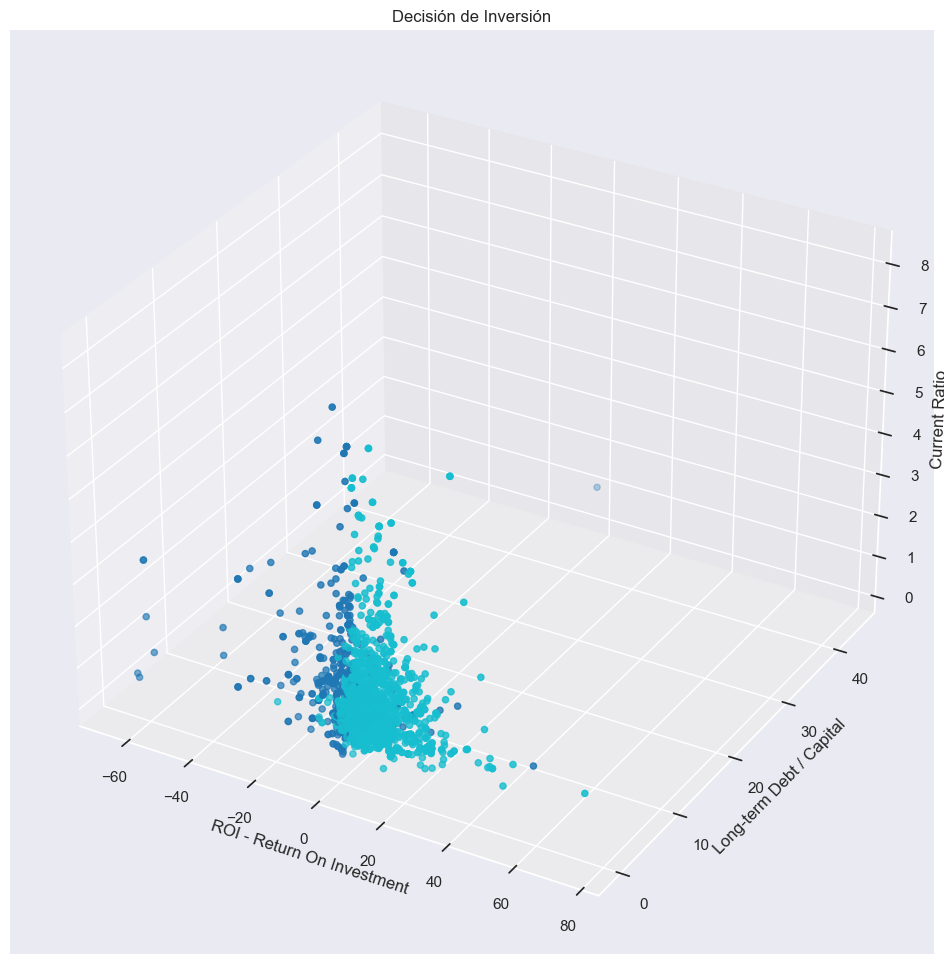

In [ ]:
# Scatter Plot 3D con las Variables más importantes.
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(15,12))
ax = plt.axes(projection="3d")
ax.scatter3D(X_test['ROI - Return On Investment'], X_test['Long-term Debt / Capital'], X_test['Current Ratio'], c=y_pred_test, cmap="tab10")
plt.title('Decisión de Inversión')
ax.set_xlabel('ROI - Return On Investment')
ax.set_ylabel('Long-term Debt / Capital')
ax.set_zlabel('Current Ratio')
plt.show()

10. Conclusiones y Recomendaciones